# Benchmark at the pocket level

In [101]:
from benchmark_lib import *

def plot_precision_data_TUNED(df, figsize=(6, 6), dpi=150, xlim=(-1, 500), ylim=(0, 101), methods="ALL", out=None, error_bar_params=(0, 100, 500)):
    plt.figure(figsize=figsize, dpi=dpi)
    if methods != "ALL":
        df = df.query('origin in @methods')
    
    start, step, end = error_bar_params
    
    for method in methods:
        subset = df.query('origin == @method')
        plt.plot(
            subset['total'], subset['precision'], label=method, color=palette[method], lw=1.5,
            linestyle = linestyles_dict2[method]
        )
        
        error_indices = np.arange(start, min(end, len(subset)), step)
        plt.errorbar(
            subset['total'].iloc[error_indices], 
            subset['precision'].iloc[error_indices], 
            yerr=[subset['precision'].iloc[error_indices] - subset['lower_precision'].iloc[error_indices],
                  subset['upper_precision'].iloc[error_indices] - subset['precision'].iloc[error_indices]],
            fmt=markers_dict[method],#'o',
            capsize=3, color=palette[method], alpha=1
        )

    plt.xlabel('# Predictions')
    plt.ylabel('Precision (%)')
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    if out is not None:
        plt.savefig(out)
    plt.legend().set_visible(False)
    plt.show()

def add_precision_ci(df, conf_level=0.95):
    # Calculate the Wilson score interval
    alpha = 1 - conf_level
    df['lower_ci'], df['upper_ci'] = proportion_confint(df['cumsum_TP'], df['total'], alpha=alpha, method='wilson')
    # Convert CI for precision
    df['lower_precision'] = 100 * df['lower_ci']
    df['upper_precision'] = 100 * df['upper_ci']
    return df

def shuffle_group(df):
    if df['origin'].iloc[0] in origins_to_shuffle:
        return df.sample(frac=1, random_state=seed)
    else:
        return df

## Reading data

In [17]:
combined_df_filt = pd.read_pickle("./results/ALL_PREDS_COMBINED_RIGHT_EXTENDED_DEF.pkl").sort_values(["origin", "rep_chain", "ID"], ascending = [False, True, True]).reset_index(drop = True)

i_cols0 = ["origin", "rep_chain", "ID", "centre", "n_aas", "RoG", "SASA", "VOL", "up_aas", "aas"]
i_cols1 = i_cols0 + ["RANK", "score"]
i_cols2 = i_cols0 + ["RANK", "prob"]
i_cols3 = i_cols0 + ["RANK", "n_points"]
i_cols4 = i_cols0 + ["ion_prop", "cluster_dist", "monomer_prop"]

LIGYSIS = combined_df_filt.query('origin == "LIGYSIS"')[i_cols4].copy().reset_index(drop = True)
VN_EGNN = combined_df_filt.query('origin == "VN-EGNN"')[i_cols1].copy().reset_index(drop = True)
IFSP = combined_df_filt.query('origin == "IF-SitePred"')[i_cols3].copy().reset_index(drop = True)
GrASP = combined_df_filt.query('origin == "GrASP"')[i_cols1].copy().reset_index(drop = True)

PUResNet_prank_cons = combined_df_filt.query('origin == "PUResNet+PRANK+Cons"')[i_cols1].copy().reset_index(drop = True)
PUResNet_prank = combined_df_filt.query('origin == "PUResNet+PRANK"')[i_cols1].copy().reset_index(drop = True)
PUResNet = combined_df_filt.query('origin == "PUResNet"')[i_cols1].copy().reset_index(drop = True)

DeepPocket_segmented = combined_df_filt.query('origin == "DeepPocket-Segmented"')[i_cols1].copy().reset_index(drop = True)
DeepPocket_rescored = combined_df_filt.query('origin == "DeepPocket-Rescored"')[i_cols1].copy().reset_index(drop = True)

P2RANK_cons = combined_df_filt.query('origin == "P2Rank+Cons"')[i_cols2].copy().reset_index(drop = True)
P2RANK = combined_df_filt.query('origin == "P2Rank"')[i_cols2].copy().reset_index(drop = True)

fpocket_prank_cons = combined_df_filt.query('origin == "fpocket+PRANK+Cons"')[i_cols1].copy().reset_index(drop = True)
fpocket_prank = combined_df_filt.query('origin == "fpocket+PRANK"')[i_cols1].copy().reset_index(drop = True)
fpocket = combined_df_filt.query('origin == "fpocket"')[i_cols1].copy().reset_index(drop = True)

PocketFinder_prank_cons = combined_df_filt.query('origin == "PocketFinder+PRANK+Cons"')[i_cols1].copy().reset_index(drop = True)
PocketFinder_prank = combined_df_filt.query('origin == "PocketFinder+PRANK"')[i_cols1].copy().reset_index(drop = True)
PocketFinder = combined_df_filt.query('origin == "PocketFinder"')[i_cols1].copy().reset_index(drop = True)

Ligsite_prank_cons = combined_df_filt.query('origin == "Ligsite+PRANK+Cons"')[i_cols1].copy().reset_index(drop = True)
Ligsite_prank = combined_df_filt.query('origin == "Ligsite+PRANK"')[i_cols1].copy().reset_index(drop = True)
Ligsite = combined_df_filt.query('origin == "Ligsite"')[i_cols1].copy().reset_index(drop = True)

Surfnet_prank_cons = combined_df_filt.query('origin == "Surfnet+PRANK+Cons"')[i_cols1].copy().reset_index(drop = True)
Surfnet_prank = combined_df_filt.query('origin == "Surfnet+PRANK"')[i_cols1].copy().reset_index(drop = True)
Surfnet = combined_df_filt.query('origin == "Surfnet"')[i_cols1].copy().reset_index(drop = True)

VN_EGNN.rename(columns = {"score": "SCORE"}, inplace = True)
#IFSP = IFSP.groupby('rep_chain').apply(normalise_score)
IFSP["SCORE"] = IFSP["n_points"]
GrASP.rename(columns = {"score": "SCORE"}, inplace = True)

PUResNet_prank_cons.rename(columns = {"score": "SCORE"}, inplace = True)
PUResNet_prank.rename(columns = {"score": "SCORE"}, inplace = True)
PUResNet.rename(columns = {"score": "SCORE"}, inplace = True)

DeepPocket_segmented.rename(columns = {"score": "SCORE"}, inplace = True)
DeepPocket_rescored.rename(columns = {"score": "SCORE"}, inplace = True)

P2RANK_cons.rename(columns = {"prob": "SCORE"}, inplace = True)
P2RANK.rename(columns = {"prob": "SCORE"}, inplace = True)

fpocket_prank_cons.rename(columns = {"score": "SCORE"}, inplace = True)
fpocket_prank.rename(columns = {"score": "SCORE"}, inplace = True)
fpocket.rename(columns = {"score": "SCORE"}, inplace = True)

PocketFinder_prank_cons.rename(columns = {"score": "SCORE"}, inplace = True)
PocketFinder_prank.rename(columns = {"score": "SCORE"}, inplace = True)
PocketFinder.rename(columns = {"score": "SCORE"}, inplace = True)

Ligsite_prank_cons.rename(columns = {"score": "SCORE"}, inplace = True)
Ligsite_prank.rename(columns = {"score": "SCORE"}, inplace = True)
Ligsite.rename(columns = {"score": "SCORE"}, inplace = True)

Surfnet_prank_cons.rename(columns = {"score": "SCORE"}, inplace = True)
Surfnet_prank.rename(columns = {"score": "SCORE"}, inplace = True)
Surfnet.rename(columns = {"score": "SCORE"}, inplace = True)

LIGYSIS['N_SITES'] = LIGYSIS.groupby('rep_chain')['rep_chain'].transform('size')

### Creating copies of PUResNet, PocketFinder, Ligsite, Surfnet and ranking them based on N_AAS

In [18]:
PUResNet_AA = PUResNet.copy() # PUResNet where sites will be ranked by n_aas, i.e., number of pocker amino acids
PUResNet_AA["origin"] = "PUResNet-AA"
PUResNet_AA['RANK'] = PUResNet_AA.groupby('rep_chain')['n_aas'].rank(ascending=False, method='first').astype(int)
PUResNet_AA['SCORE'] = PUResNet_AA.n_aas

PocketFinder_AA = PocketFinder.copy() # PocketFinder where sites will be ranked by n_aas, i.e., number of pocker amino acids
PocketFinder_AA["origin"] = "PocketFinder-AA"
PocketFinder_AA['RANK'] = PocketFinder_AA.groupby('rep_chain')['n_aas'].rank(ascending=False, method='first').astype(int)
PocketFinder_AA['SCORE'] = PocketFinder_AA.n_aas

Ligsite_AA = Ligsite.copy() # Ligsite where sites will be ranked by n_aas, i.e., number of pocker amino acids
Ligsite_AA["origin"] = "Ligsite-AA"
Ligsite_AA['RANK'] = Ligsite_AA.groupby('rep_chain')['n_aas'].rank(ascending=False, method='first').astype(int)
Ligsite_AA['SCORE'] = Ligsite_AA.n_aas

Surfnet_AA = Surfnet.copy() # Surfnet where sites will be ranked by n_aas, i.e., number of pocker amino acids
Surfnet_AA["origin"] = "Surfnet-AA"
Surfnet_AA['RANK'] = Surfnet_AA.groupby('rep_chain')['n_aas'].rank(ascending=False, method='first').astype(int)
Surfnet_AA['SCORE'] = Surfnet_AA.n_aas

### Creating copies of PocketFinder, Ligsite, Surfnet and ranking them based on SS score of grid points

In [19]:
PocketFinder_SS = PocketFinder.copy() # PocketFinder where sites will be ranked by SCORE, i.e., SS calculated by JSU
PocketFinder_SS["origin"] = "PocketFinder-SS"
PocketFinder_SS['RANK'] = PocketFinder_SS.groupby('rep_chain')['SCORE'].rank(ascending=False, method='first').astype(int)

Ligsite_SS = Ligsite.copy() # Ligsite where sites will be ranked by SCORE, i.e., SS calculated by JSU
Ligsite_SS["origin"] = "Ligsite-SS"
Ligsite_SS['RANK'] = Ligsite_SS.groupby('rep_chain')['SCORE'].rank(ascending=False, method='first').astype(int)

Surfnet_SS = Surfnet.copy() # Surfnet where sites will be ranked by SCORE, i.e., SS calculated by JSU
Surfnet_SS["origin"] = "Surfnet-SS"
Surfnet_SS['RANK'] = Surfnet_SS.groupby('rep_chain')['SCORE'].rank(ascending=False, method='first').astype(int)

### REPLACING SCORE BY N_AAS ON REGULAR POCKETFINDER, LIGSITE AND SURFNET predictions

PUResNet['SCORE'] = 1/PUResNet["ID"]
PocketFinder['SCORE'] = 1/PocketFinder["ID"]
Ligsite['SCORE'] = 1/Ligsite["ID"]
Surfnet['SCORE'] = 1/Surfnet["ID"]

### Removing redundancy on LIGYSIS (based on distance and residue overlap)

In [20]:
LIGYSIS_NR = filter_redundant_pockets2(LIGYSIS, jaccard_threshold=0.75, distance_threshold=5.0)

In [21]:
LIGYSIS.shape[0] - LIGYSIS_NR.shape[0]

print(round(100*161/LIGYSIS.shape[0], 2)) # redundancy of LIGYSIS

2.34


In [22]:
combined_rescored = pd.concat(
    [
        VN_EGNN, IFSP, GrASP,
        PUResNet, PUResNet_AA, PUResNet_prank, PUResNet_prank_cons,
        DeepPocket_segmented, DeepPocket_rescored, P2RANK_cons, P2RANK,
        fpocket_prank_cons, fpocket_prank, fpocket,
        PocketFinder, PocketFinder_AA, PocketFinder_SS, PocketFinder_prank, PocketFinder_prank_cons,
        Ligsite, Ligsite_AA, Ligsite_SS, Ligsite_prank, Ligsite_prank_cons,
        Surfnet, Surfnet_AA, Surfnet_SS, Surfnet_prank, Surfnet_prank_cons,
    ]).reset_index(drop = True)

## Measuring method redundancy

In [23]:
combined_rescored_NR = filter_redundant_pockets2(combined_rescored, jaccard_threshold=0.75, distance_threshold=5.0)

In [24]:
combined_rescored["NAME"] = combined_rescored.origin + "_" + combined_rescored_NR.rep_chain + "_" + combined_rescored_NR.ID.astype(str)
combined_rescored_NR["NAME"] = combined_rescored_NR.origin + "_" + combined_rescored_NR.rep_chain + "_" + combined_rescored_NR.ID.astype(str)

In [25]:
NR_IFSP_pockets = combined_rescored_NR.query('origin == "IF-SitePred"').NAME.tolist()
R_IFSP_pockets = combined_rescored.query('origin == "IF-SitePred"').NAME.tolist()

In [26]:
redundant_counts = combined_rescored.origin.value_counts()
non_redundant_counts = combined_rescored_NR.origin.value_counts()
for k, v in redundant_counts.items():
    redundant_count = v
    non_redundant_count = non_redundant_counts[k]
    diff = redundant_count - non_redundant_count
    redundancy = round(100*diff/redundant_count, 2)
    if "SS" in k or "PRANK" in k or "Rescored" in k:
        continue
    else:
        print(f"{k:30} {diff}\t {redundancy}%")

fpocket                        376	 0.65%
IF-SitePred                    22232	 49.46%
DeepPocket-Segmented           6744	 31.05%
VN-EGNN                        9066	 66.75%
P2Rank                         71	 0.57%
P2Rank+Cons                    67	 0.66%
Surfnet-AA                     0	 0.0%
Surfnet                        0	 0.0%
PocketFinder-AA                0	 0.0%
PocketFinder                   0	 0.0%
Ligsite                        1	 0.01%
Ligsite-AA                     1	 0.01%
GrASP                          0	 0.0%
PUResNet-AA                    0	 0.0%
PUResNet                       0	 0.0%


## Generating NON-REDUNDANT sets for redundant methods

In [27]:
VN_EGNN_NR = filter_redundant_pockets2(VN_EGNN, jaccard_threshold=0.75, distance_threshold=5.0)
VN_EGNN_NR["origin"] = "VN-EGNN-NR"
VN_EGNN_NR = VN_EGNN_NR.sort_values(["origin", "rep_chain", "SCORE"], ascending = [True, True, False]).reset_index(drop = True)
VN_EGNN_NR['RANK'] = VN_EGNN_NR.groupby(['origin', 'rep_chain']).cumcount() + 1

IFSP_NR = filter_redundant_pockets2(IFSP, jaccard_threshold=0.75, distance_threshold=5.0)
IFSP_NR["origin"] = "IF-SitePred-NR"
IFSP_NR = IFSP_NR.sort_values(["origin", "rep_chain", "SCORE"], ascending = [True, True, False]).reset_index(drop = True)
IFSP_NR['RANK'] = IFSP_NR.groupby(['origin', 'rep_chain']).cumcount() + 1

DeepPocket_segmented_NR = filter_redundant_pockets2(DeepPocket_segmented, jaccard_threshold=0.75, distance_threshold=5.0)
DeepPocket_segmented_NR["origin"] = "DeepPocket-Segmented-NR"
DeepPocket_segmented_NR = DeepPocket_segmented_NR.sort_values(["origin", "rep_chain", "SCORE"], ascending = [True, True, False]).reset_index(drop = True)
DeepPocket_segmented_NR['RANK'] = DeepPocket_segmented_NR.groupby(['origin', 'rep_chain']).cumcount() + 1

In [28]:
print(len(VN_EGNN))
print(len(IFSP))
print(len(DeepPocket_segmented))

13582
44948
21718


In [29]:
print(13582-9066)
print(44948-22232)
print(21718-6744)

4516
22716
14974


In [30]:
print(len(VN_EGNN_NR))
print(len(IFSP_NR))
print(len(DeepPocket_segmented_NR))

4516
22716
14974


## Re-scoring IF-SitePred pockets

In [31]:
IFSP_preds_dir = "./results/IFSP_preds"
IFSP_rescored = recalculate_IFSP_scores(IFSP, IFSP_preds_dir)
IFSP_rescored_NR = filter_redundant_pockets2(IFSP_rescored, jaccard_threshold=0.75, distance_threshold=5.0)
IFSP_rescored_NR["origin"] = "IF-SitePred-rescored-NR"
IFSP_rescored_NR = IFSP_rescored_NR.sort_values(["origin", "rep_chain", "SCORE"], ascending = [True, True, False]).reset_index(drop = True)
IFSP_rescored_NR['RANK'] = IFSP_rescored_NR.groupby(['origin', 'rep_chain']).cumcount() + 1

In [32]:
mets = [
    'VN-EGNN', 'VN-EGNN-NR',
    'IF-SitePred', 'IF-SitePred-NR', 'IF-SitePred-rescored-NR',
    'GrASP',
    'PUResNet', 'PUResNet-AA', 'PUResNet+PRANK', 'PUResNet+PRANK+Cons', 
    'DeepPocket-Rescored', 'DeepPocket-Segmented', 'DeepPocket-Segmented-NR', 
    'P2Rank','P2Rank+Cons', 
    'fpocket', 'fpocket+PRANK', 'fpocket+PRANK+Cons',
    'PocketFinder', 'PocketFinder-AA', 'PocketFinder-SS', 'PocketFinder+PRANK', 'PocketFinder+PRANK+Cons',
    'Ligsite',  'Ligsite-AA', 'Ligsite-SS', 'Ligsite+PRANK', 'Ligsite+PRANK+Cons',
    'Surfnet', 'Surfnet-AA', 'Surfnet-SS', 'Surfnet+PRANK', 'Surfnet+PRANK+Cons',
] # all methods

In [33]:
OG_mets = [
    'VN-EGNN',
    'IF-SitePred',
    'GrASP',
    'PUResNet',
    'DeepPocket-Segmented',
    'DeepPocket-Rescored',
    'P2Rank+Cons',
    'P2Rank',
    'fpocket',
    'PocketFinder',
    'Ligsite',
    'Surfnet',
] # original methods

new_OG_mets = [
    'VN-EGNN',
    'IF-SitePred',
    'GrASP',
    'PUResNet',
    'DeepPocket-Segmented',
    'DeepPocket-Rescored',
    'P2Rank+Cons',
    'P2Rank',
    'fpocket+PRANK',
    'fpocket',
    'PocketFinder',
    'Ligsite',
    'Surfnet',
] # original methods

FINAL_mets = [
    'VN-EGNN-NR',
    'IF-SitePred-rescored-NR',
    'GrASP',
    'PUResNet+PRANK',
    'DeepPocket-Segmented-NR',
    'DeepPocket-Rescored',
    'P2Rank+Cons',
    'P2Rank',
    'fpocket+PRANK',
    'fpocket',
    'PocketFinder-AA',
    'Ligsite-AA',
    'Surfnet-AA',
] # best variants

In [34]:
combined_rescored_DEF = pd.concat(
    [
        VN_EGNN, VN_EGNN_NR, IFSP, IFSP_NR, IFSP_rescored_NR, 
        GrASP, PUResNet, PUResNet_AA, PUResNet_prank, PUResNet_prank_cons,
        DeepPocket_segmented, DeepPocket_segmented_NR, DeepPocket_rescored,
        P2RANK_cons, P2RANK,
        fpocket_prank_cons, fpocket_prank, fpocket,
        PocketFinder, PocketFinder_AA, PocketFinder_SS, PocketFinder_prank, PocketFinder_prank_cons,
        Ligsite, Ligsite_AA, Ligsite_SS, Ligsite_prank, Ligsite_prank_cons,
        Surfnet, Surfnet_AA, Surfnet_SS, Surfnet_prank, Surfnet_prank_cons,
    ]).reset_index(drop = True)

## SCORE vs RANK

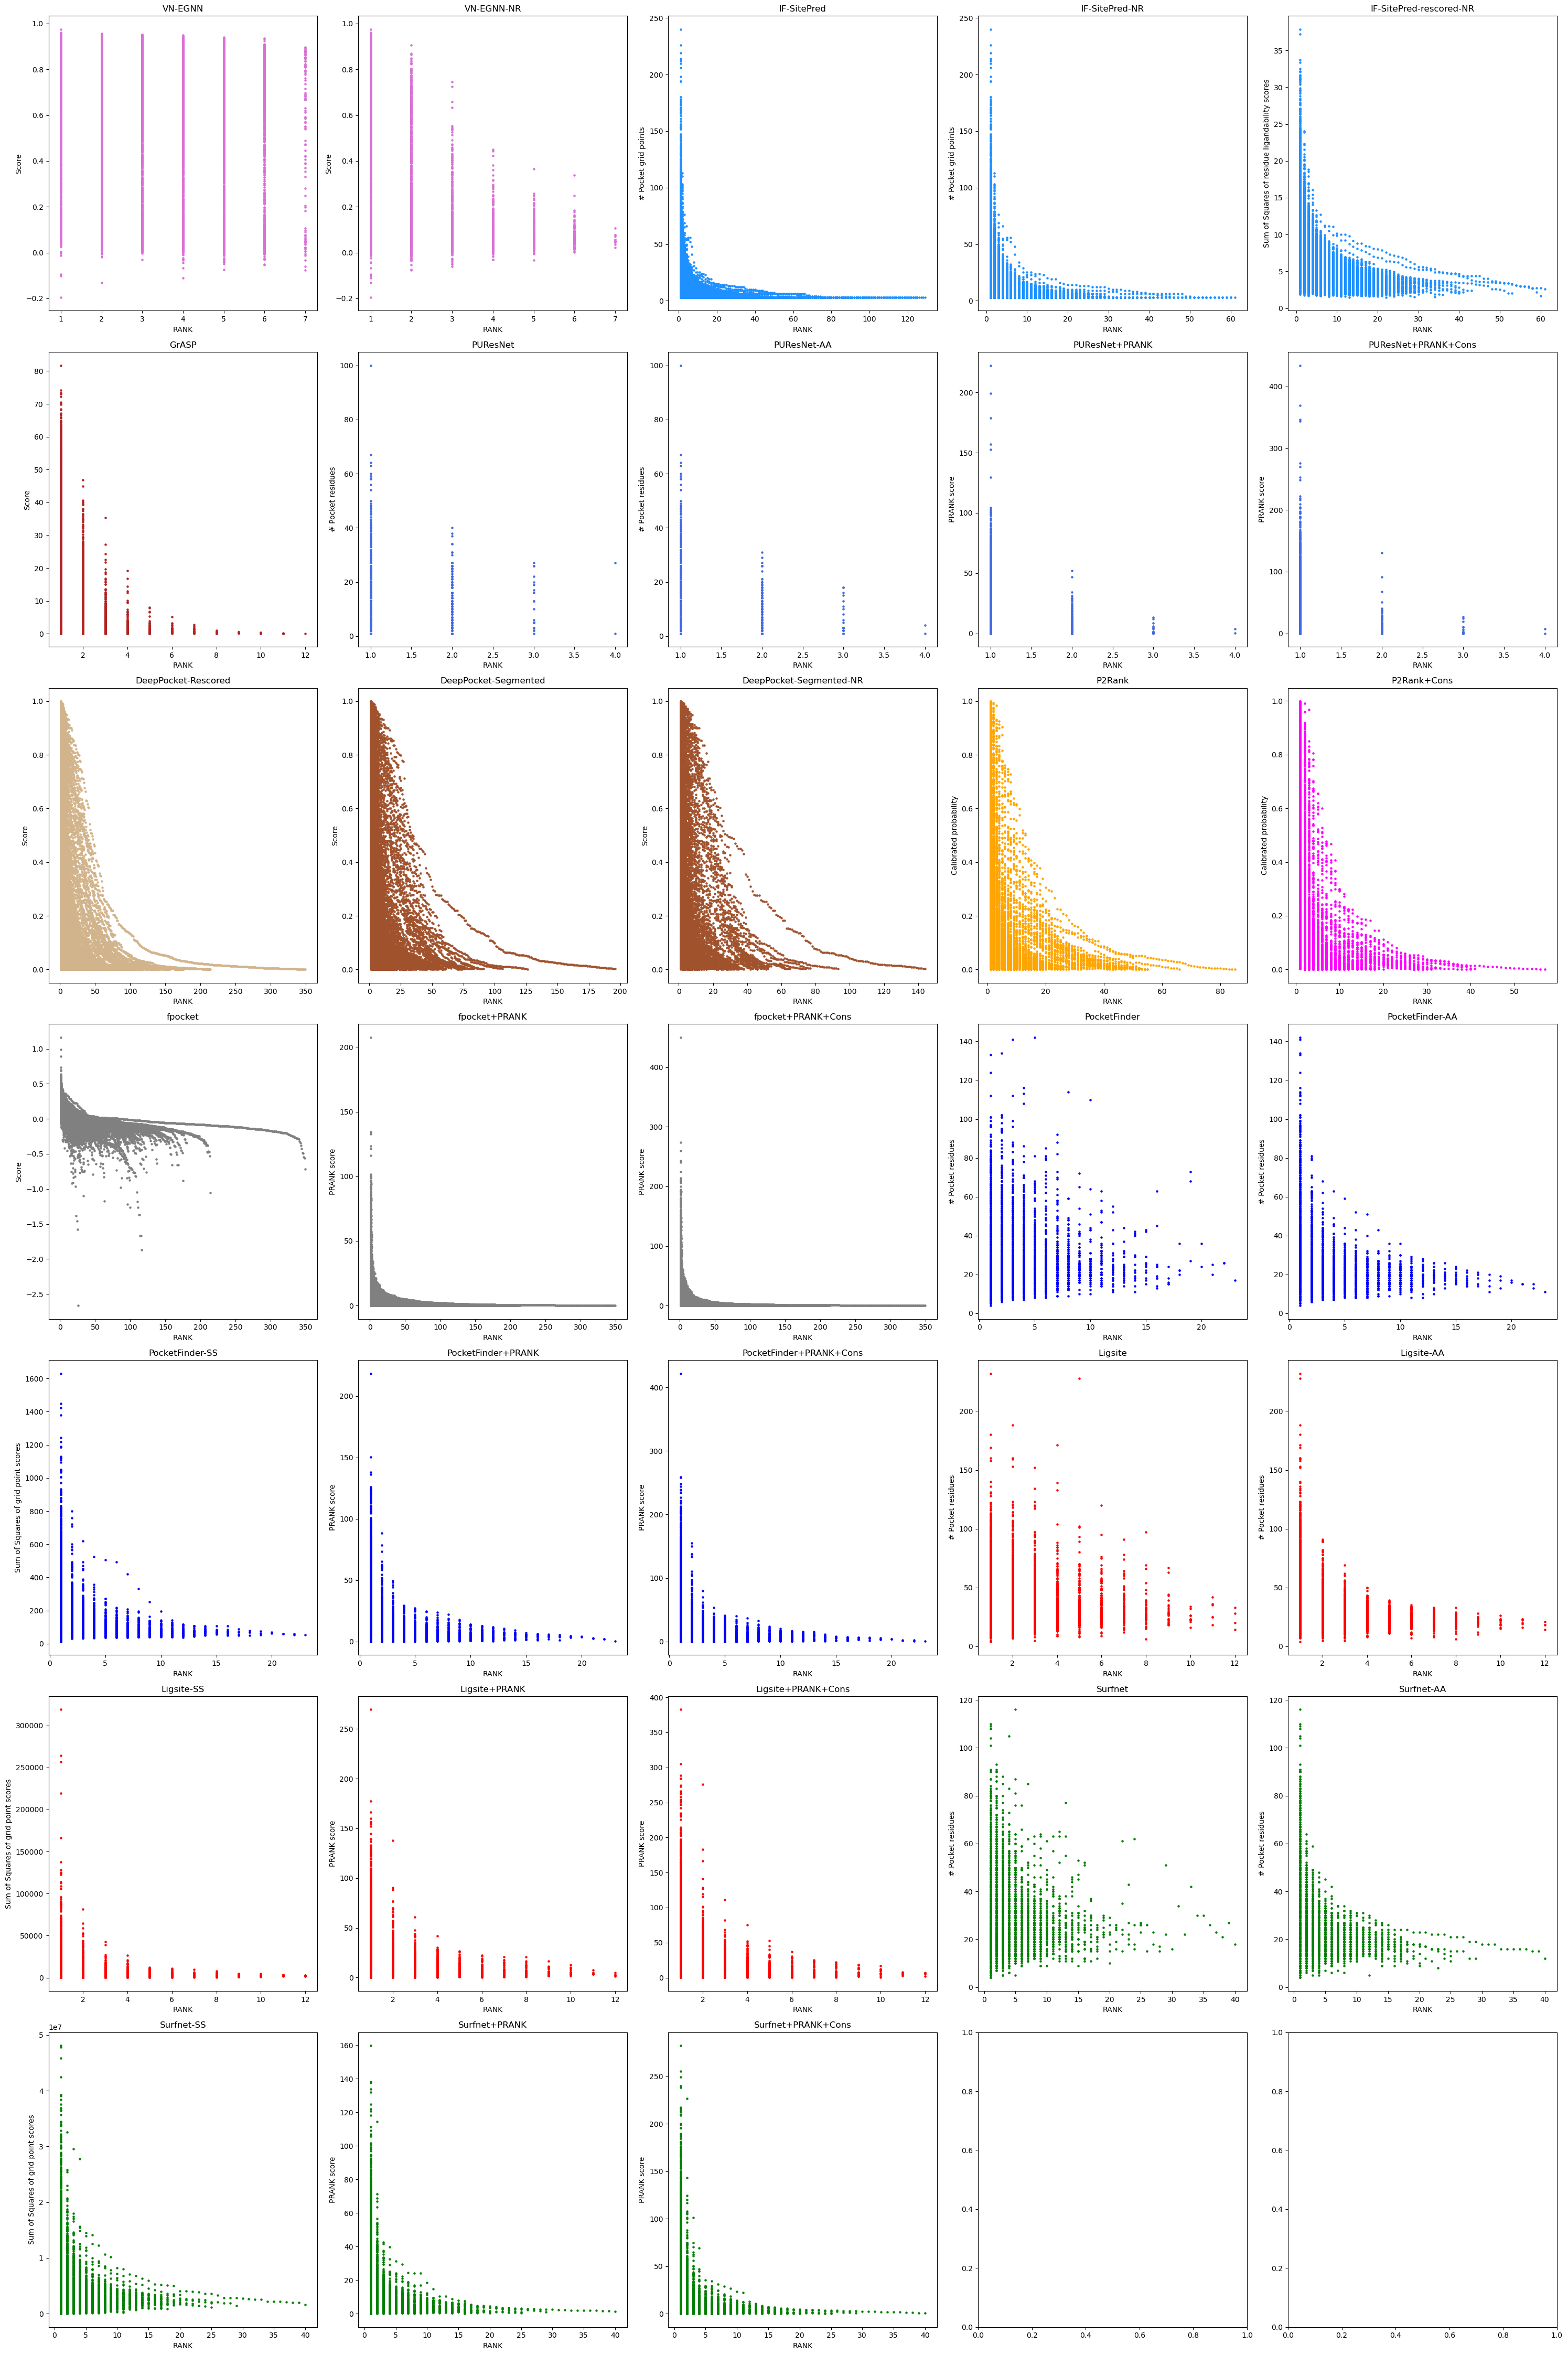

In [23]:
fig, axes = plt.subplots(7, 5, figsize=(30, 45), dpi = 100)  # Adjust the size as needed
axes = axes.flatten()  # Flatten the 2D array of axes to easily loop through it

for i, met in enumerate(mets):
    met_rows = combined_rescored_DEF.query('origin == @met')
    ax = axes[i]
    try:
        if met in ["PocketFinder", "Ligsite", "Surfnet", "PUResNet"]:
            ax.scatter(met_rows.RANK, met_rows.n_aas, color=palette[met], s = 5)
        else:
            ax.scatter(met_rows.RANK, met_rows.SCORE, color=palette[met], s = 5)
    except:
        raise
        #ax.scatter(met_rows.RANK, met_rows.SCORE, color=color)
    ax.set_xlabel("RANK")
    if met in ["IF-SitePred", "IF-SitePred-NR"]:
        ax.set_ylabel("# Pocket grid points")
        
    elif met in ["PUResNet", "PocketFinder", "Ligsite", "Surfnet"] or "-AA" in met:
        ax.set_ylabel("# Pocket residues")
        
    elif met in ["P2Rank", "P2Rank+Cons"]:
        ax.set_ylabel("Calibrated probability")
        
    elif met in ["PocketFinder-SS", "Ligsite-SS", "Surfnet-SS"]:
        ax.set_ylabel("Sum of Squares of grid point scores")
    elif "+PRANK" in met:
        ax.set_ylabel("PRANK score")
    elif met in ["IF-SitePred-rescored-NR"]:
        ax.set_ylabel("Sum of Squares of residue ligandability scores")
    else:  
        ax.set_ylabel("Score")
    ax.set_title(met)

plt.tight_layout()
plt.show()

In [35]:
volumes_dict["PocketFinder-AA"] = volumes_dict["PocketFinder"]
volumes_dict["PocketFinder+PRANK+cons"] = volumes_dict["PocketFinder"]
volumes_dict["Ligsite-AA"] = volumes_dict["Ligsite"]
volumes_dict["Ligsite+PRANK+cons"] = volumes_dict["Ligsite"]
volumes_dict["Surfnet-AA"] = volumes_dict["Surfnet"]
volumes_dict["Surfnet+PRANK+cons"] = volumes_dict["Surfnet"]
volumes_dict["DeepPocket-Rescored"] = volumes_dict["fpocket"]
volumes_dict["fpocket+PRANK"] = volumes_dict["fpocket"]
volumes_dict["fpocket+PRANK+cons"] = volumes_dict["fpocket"]
volumes_dict["PUResNet+PRANK+cons"] = volumes_dict["PUResNet"]

In [36]:
predictors = {
    'VN-EGNN': VN_EGNN, 'VN-EGNN-NR': VN_EGNN_NR,
    'IF-SitePred': IFSP, 'IF-SitePred-NR': IFSP_NR, 'IF-SitePred-rescored-NR': IFSP_rescored_NR,
    'GrASP': GrASP, 'PUResNet': PUResNet, 'PUResNet-AA': PUResNet_AA, 'PUResNet+PRANK': PUResNet_prank, 'PUResNet+PRANK+Cons': PUResNet_prank_cons, 
    'DeepPocket-Segmented': DeepPocket_segmented, 'DeepPocket-Segmented-NR': DeepPocket_segmented_NR,
    'DeepPocket-Rescored': DeepPocket_rescored, 
    'P2Rank+Cons': P2RANK_cons, 'P2Rank': P2RANK,
    'fpocket+PRANK+Cons': fpocket_prank_cons, 'fpocket+PRANK ': fpocket_prank, 'fpocket': fpocket,
    'PocketFinder': PocketFinder, 'PocketFinder-AA': PocketFinder_AA, 'PocketFinder-SS': PocketFinder_SS, 'PocketFinder+PRANK': PocketFinder_prank, 'PocketFinder+PRANK+Cons': PocketFinder_prank_cons,
    'Ligsite': Ligsite, 'Ligsite-AA': Ligsite_AA, 'Ligsite-SS': Ligsite_SS, 'Ligsite+PRANK': Ligsite_prank,  'Ligsite+PRANK+Cons': Ligsite_prank_cons,
    'Surfnet': Surfnet, 'Surfnet-AA': Surfnet_AA, 'Surfnet-SS': Surfnet_SS, 'Surfnet+PRANK': Surfnet_prank, 'Surfnet+PRANK+Cons': Surfnet_prank_cons,
    
}

## Comparing all sets to LIGYSIS

In [37]:
# Process each predictor and collect results
ALL_comparisons = []
for name, predictor in predictors.items():
    print(f"Processing {name}")
    result = compare_ALL_predictions(LIGYSIS_NR, predictor)
    ALL_comparisons.append(result)

Processing VN-EGNN
Processing VN-EGNN-NR
Processing IF-SitePred
Processing IF-SitePred-NR
Processing IF-SitePred-rescored-NR
Processing GrASP
Processing PUResNet
Processing PUResNet-AA
Processing PUResNet+PRANK
Processing PUResNet+PRANK+Cons
Processing DeepPocket-Segmented
Processing DeepPocket-Segmented-NR
Processing DeepPocket-Rescored
Processing P2Rank+Cons
Processing P2Rank
Processing fpocket+PRANK+Cons
Processing fpocket+PRANK 
Processing fpocket
Processing PocketFinder
Processing PocketFinder-AA
Processing PocketFinder-SS
Processing PocketFinder+PRANK
Processing PocketFinder+PRANK+Cons
Processing Ligsite
Processing Ligsite-AA
Processing Ligsite-SS
Processing Ligsite+PRANK
Processing Ligsite+PRANK+Cons
Processing Surfnet
Processing Surfnet-AA
Processing Surfnet-SS
Processing Surfnet+PRANK
Processing Surfnet+PRANK+Cons


In [38]:
interest_cols = ["origin_ref", "rep_chain_ref", "ID_ref", "centre_ref", "up_aas_ref", "aas_ref", "VOL_ref", "N_SITES_ref", "origin_pred", "ID_pred", "centre_pred", "up_aas_pred", "aas_pred", "VOL_pred", "SCORE_pred", "RANK_pred", "distance", "relative_intersection", "volume_overlap"]

ALL_comparisons_df = pd.concat(ALL_comparisons)

In [39]:
ALL_comparisons_df = ALL_comparisons_df.query('RANK_pred == RANK_pred').reset_index(drop = True)

In [40]:
ALL_comparisons_df.ID_pred = ALL_comparisons_df.ID_pred.astype(int)
ALL_comparisons_df.RANK_pred = ALL_comparisons_df.RANK_pred.astype(int)
ALL_comparisons_df.distance = ALL_comparisons_df.distance.round(2)
ALL_comparisons_df.relative_intersection = ALL_comparisons_df.relative_intersection.round(2)
ALL_comparisons_df.volume_overlap = ALL_comparisons_df.volume_overlap.round(2)

In [41]:
ALL_comparisons_df.shape[0] # 472306 --> 814,916 --> 1,166,266 --> 1,246,625 --> 1,409,697 --> 1,483,513

1483513

In [54]:
ALL_comparisons_df.to_pickle("./results/ALL_COMPARISONS_EXTENDED6.pkl")

In [2]:
ALL_comparisons_df = pd.read_pickle("./results/ALL_COMPARISONS_EXTENDED6.pkl") # read comparisons from dataframe

In [16]:
#ALL_comparisons_df.head(10) # 472306

## Selecting BEST predictions (minimum euclidean distance)

In [3]:
BEST_comparisons_df_DIST = ALL_comparisons_df.sort_values(
    ["origin_ref", "rep_chain_ref", "ID_ref", "origin_pred", "distance", "relative_intersection"],
    ascending = [True, True, True, True, True, False]
).drop_duplicates(["origin_ref", "rep_chain_ref", "ID_ref", "origin_pred"], keep = "first")

## Threshold exploration

In [4]:
my_mets = [ # unique methods
    'VN-EGNN', 'IF-SitePred', 'GrASP', 'PUResNet',
    'DeepPocket-Segmented', 'DeepPocket-Rescored',
    'P2Rank+Cons', 'P2Rank', 'fpocket', 'PocketFinder',
    'Ligsite', 'Surfnet',
]

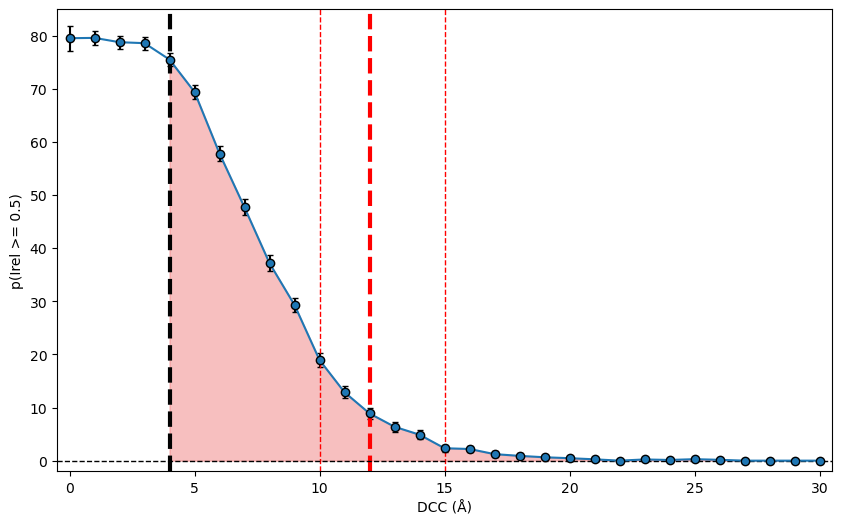

In [32]:
# Calculating the distance intervals (assuming 'distance' is already sorted or doesn't need sorting)
BEST_comparisons_df_DIST['distance_interval'] = BEST_comparisons_df_DIST.query('distance <= 30')['distance'].apply(np.floor)
# Calculating the proportion of rows with relative_intersection >= 0.5 within each distance interval
grouped = BEST_comparisons_df_DIST.query('origin_pred in @my_mets').groupby('distance_interval')
proportion = grouped.apply(lambda x: (x['relative_intersection'] >= 0.5).mean())
count = grouped.size()

# Calculating the 95% CI for the proportion
ci_lower = proportion - 1.96 * np.sqrt((proportion * (1 - proportion)) / count)
ci_upper = proportion + 1.96 * np.sqrt((proportion * (1 - proportion)) / count)

# Plotting the result
plt.figure(figsize=(10, 6), dpi = 100)
plt.errorbar(proportion.index, 100*proportion, yerr=[100*(proportion - ci_lower), 100*(ci_upper - proportion)], fmt='-o', capsize=2, ecolor = "k", mew = 1, mec = "k")
plt.xlabel('DCC (Å)')
plt.ylabel('p(Irel >= 0.5)')
plt.ylim(100*-0.02, 100*0.85)
plt.xlim(-0.5, 30.5)
plt.axvline(x = 4, color = "k", linestyle ="--", linewidth = 3)
plt.axvline(x = 10, color = "red", linestyle ="--", linewidth = 1)
plt.axvline(x = 12, color = "red", linestyle ="--", linewidth = 3)
plt.axvline(x = 15, color = "red", linestyle ="--", linewidth = 1)
plt.axhline(y = 0, color = "k", linestyle ="--", linewidth = 1)
# Define the range to fill
x_range = np.arange(4, 30)  # x values from 4 to 15
y_values = 100*proportion[x_range]  # corresponding y values from the proportion series

# Fill under the line between x=4 and x=15
plt.fill_between(x_range, 0, y_values, color='lightcoral', alpha=0.5)
#plt.savefig("./figs/pct_Irel_vs_DCC.png")

plt.show()

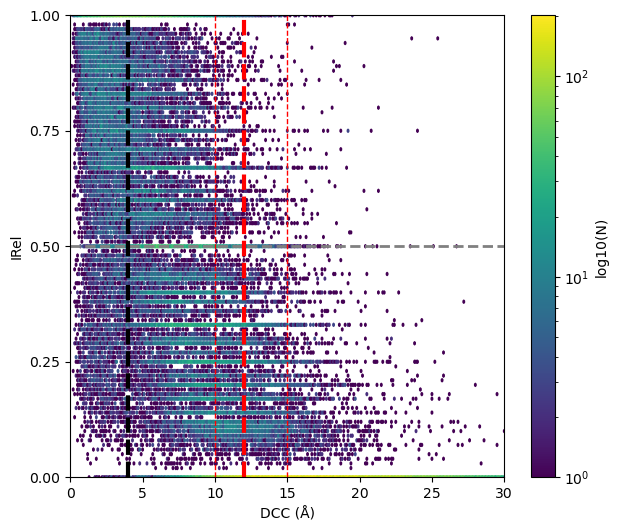

In [31]:
dist_lt_30 = BEST_comparisons_df_DIST.query('distance <= 30').query('origin_pred in @my_mets')
plt.figure(figsize = (7,6), dpi = 100)
plt.hexbin(dist_lt_30.distance, dist_lt_30.relative_intersection, gridsize=[300, 100], cmap='viridis', bins='log')
plt.colorbar(label=r'log10(N)')  # Adds a color bar to indicate the counts on a logarithmic scale

plt.xlim(0, 30)
plt.ylim(0, 1)
plt.xlabel('DCC (Å)')
plt.ylabel('IRel')
plt.yticks([0, 0.25, 0.5, 0.75, 1.0])
#plt.title('Hexbin Plot of Distance and Relative Intersection')
plt.axhline(y = 0.5, color = "gray", linestyle ="--", linewidth = 2)
plt.axvline(x = 4, color = "k", linestyle ="--", linewidth = 3)
plt.axvline(x = 10, color = "red", linestyle ="--", linewidth = 1)
plt.axvline(x = 12, color = "red", linestyle ="--", linewidth = 3)
plt.axvline(x = 15, color = "red", linestyle ="--", linewidth = 1)
#plt.savefig("./figs/Irel_vs_dcc_hexbin.png")
plt.show()

### Other stats

In [5]:
met_subset2 = [
    'VN-EGNN-NR',
    'IF-SitePred-rescored-NR',
    'GrASP',
    'PUResNet+PRANK',
    'DeepPocket-Segmented-NR',
    'P2Rank+Cons',
    'P2Rank',
    'fpocket',
    'PocketFinder-SS',
    'Ligsite-SS',
    'Surfnet-SS'
]

In [42]:
stats = []

for met in  mets:#FINAL_mets + ["Ligsite+PRANK", "Surfnet+PRANK","PocketFinder+PRANK",]:
    met_df = BEST_comparisons_df_DIST.query('origin_pred == @met')
    TOTAL_PREDS = 6721#len(met_df)
    correct_preds = met_df.query('distance <= 12 or relative_intersection >= 1.5')
    recalled_preds = correct_preds.query('(distance <= 12 or relative_intersection >= 1.5) & RANK_pred <= N_SITES_ref + 2')
    met_overlap_df = correct_preds.query('relative_intersection > 0')
    met_adjacent_df = correct_preds.query('relative_intersection == 0')
    met_bang_on_df = correct_preds.query('distance <= 6 & relative_intersection >= 0.5')
    met_vol_df = met_overlap_df.query('VOL_ref == VOL_ref and VOL_pred == VOL_pred and VOL_ref != 0')
    n_met = len(correct_preds)
    n_adjacent = len(met_adjacent_df)
    n_overlap = len(met_overlap_df)
    n_bang_on = len(met_bang_on_df)
    n_recalled_preds = len(recalled_preds)
    p_adjacent = round(100*n_adjacent/n_met, 2)
    p_overlap = round(100*n_overlap/n_met, 2)
    p_bang_on = round(100*n_bang_on/n_met, 2)
    p_recalled_preds = round(100*n_recalled_preds/TOTAL_PREDS, 2)
    median_overlap = round(100*met_overlap_df.relative_intersection.mean(), 2)
    median_volume_overlap = round(100*met_vol_df.volume_overlap.mean(), 2)

 # Append a dictionary with the results for this 'met' to the list
    stats.append({
        'Method': met,
        'Total': n_met,
        'Adjacent': n_adjacent,
        'Overlap': n_overlap,
        'Bang on': n_bang_on,
        'Recalled': n_recalled_preds,
        'Percent Adjacent': p_adjacent,
        'Percent Overlap': p_overlap,
        'Percent Bang on': p_bang_on,
        'Percent Recalled': p_recalled_preds,
        'Median Overlap': median_overlap,
        'Median Volume Overlap': median_volume_overlap
    })

# Convert the list of dictionaries to a DataFrame
stats_df = pd.DataFrame(stats)

In [43]:
stats_df.query('Method in @new_OG_mets')

Method  Total  Adjacent  Overlap  Bang on  Recalled  \
0                VN-EGNN   3314       429     2885      489      2752   
2            IF-SitePred   3505       347     3158     1188      1728   
5                  GrASP   3358       488     2870     1308      3352   
6               PUResNet   2762       249     2513     1416      2762   
10   DeepPocket-Rescored   6001       473     5528     2087      3905   
11  DeepPocket-Segmented   3795       429     3366     1547      2941   
13                P2Rank   3831       401     3430     1535      3491   
14           P2Rank+Cons   3834       345     3489     1641      3622   
15               fpocket   6136       585     5551     2271      3127   
16         fpocket+PRANK   6136       585     5551     2271      4061   
18          PocketFinder   3394        55     3339     1161      3210   
23               Ligsite   3342        36     3306     1265      3255   
28               Surfnet   3288        57     3231     1240      3081   

    Percent Adjacent  Percent Overlap  Percent Bang on  Percent Recalled  \
0              12.95            87.05            14.76             40.95   
2               9.90            90.10            33.89             25.71   
5              14.53            85.47            38.95             49.87   
6               9.02            90.98            51.27             41.10   
10              7.88            92.12            34.78             58.10   
11             11.30            88.70            40.76             43.76   
13             10.47            89.53            40.07             51.94   
14              9.00            91.00            42.80             53.89   
15              9.53            90.47            37.01             46.53   
16              9.53            90.47            37.01             60.42   
18              1.62            98.38            34.21             47.76   
23              1.08            98.92            37.85             48.43   
28              1.73            98.27            37.71             45.84   

    Median Overlap  Median Volume Overlap  
0            32.84                  27.55  
2            46.50                  40.44  
5            54.46                  59.75  
6            61.04                  63.89  
10           53.08                    NaN  
11           57.48                  60.30  
13           54.41                  58.24  
14           56.38                  43.82  
15           52.59                  38.19  
16           52.59                  38.19  
18           72.29                  75.87  
23           77.63                  76.96  
28           71.72                  72.03

In [65]:
stats_df.query('Method in @SELECTED_METHODS').sort_values("Median Volume Overlap", ascending = False)

Method  Total  Adjacent  Overlap  Bang on  Recalled  \
24               Ligsite-AA   3342        36     3306     1265      3295   
19          PocketFinder-AA   3394        55     3339     1161      3285   
29               Surfnet-AA   3288        57     3231     1240      3183   
8            PUResNet+PRANK   2762       249     2513     1416      2762   
12  DeepPocket-Segmented-NR   3726       406     3320     1537      3318   
5                     GrASP   3358       488     2870     1308      3352   
13                   P2Rank   3831       401     3430     1535      3491   
14              P2Rank+Cons   3834       345     3489     1641      3622   
4   IF-SitePred-rescored-NR   3425       322     3103     1295      2629   
15                  fpocket   6136       585     5551     2271      3127   
16            fpocket+PRANK   6136       585     5551     2271      4061   
1                VN-EGNN-NR   3113       415     2698      396      3098   
10      DeepPocket-Rescored   6001       473     5528     2087      3905   

    Percent Adjacent  Percent Overlap  Percent Bang on  Percent Recalled  \
24              1.08            98.92            37.85             49.03   
19              1.62            98.38            34.21             48.88   
29              1.73            98.27            37.71             47.36   
8               9.02            90.98            51.27             41.10   
12             10.90            89.10            41.25             49.37   
5              14.53            85.47            38.95             49.87   
13             10.47            89.53            40.07             51.94   
14              9.00            91.00            42.80             53.89   
4               9.40            90.60            37.81             39.12   
15              9.53            90.47            37.01             46.53   
16              9.53            90.47            37.01             60.42   
1              13.33            86.67            12.72             46.09   
10              7.88            92.12            34.78             58.10   

    Median Overlap  Median Volume Overlap  
24           77.63                  76.96  
19           72.29                  75.87  
29           71.72                  72.03  
8            61.04                  63.89  
12           58.43                  61.26  
5            54.46                  59.75  
13           54.41                  58.24  
14           56.38                  43.82  
4            49.25                  43.65  
15           52.59                  38.19  
16           52.59                  38.19  
1            31.55                  26.73  
10           53.08                    NaN

In [84]:
stats_df.query('Method in @OG_mets')

Method  Total  Adjacent  Overlap  Bang on  Recalled  \
0                VN-EGNN   3314       429     2885      489      2752   
2            IF-SitePred   3505       347     3158     1188      1728   
5                  GrASP   3358       488     2870     1308      3352   
6               PUResNet   2762       249     2513     1416      2762   
10   DeepPocket-Rescored   6001       473     5528     2087      3905   
11  DeepPocket-Segmented   3795       429     3366     1547      2941   
13                P2Rank   3831       401     3430     1535      3491   
14           P2Rank+Cons   3834       345     3489     1641      3622   
15               fpocket   6136       585     5551     2271      3127   
18          PocketFinder   3394        55     3339     1161      3210   
23               Ligsite   3342        36     3306     1265      3255   
28               Surfnet   3288        57     3231     1240      3081   

    Percent Adjacent  Percent Overlap  Percent Bang on  Percent Recalled  \
0              12.95            87.05            14.76             40.95   
2               9.90            90.10            33.89             25.71   
5              14.53            85.47            38.95             49.87   
6               9.02            90.98            51.27             41.10   
10              7.88            92.12            34.78             58.10   
11             11.30            88.70            40.76             43.76   
13             10.47            89.53            40.07             51.94   
14              9.00            91.00            42.80             53.89   
15              9.53            90.47            37.01             46.53   
18              1.62            98.38            34.21             47.76   
23              1.08            98.92            37.85             48.43   
28              1.73            98.27            37.71             45.84   

    Median Overlap  Median Volume Overlap  
0             28.0                   20.0  
2             42.0                   31.0  
5             56.0                   69.0  
6             65.0                   73.0  
10            50.0                    NaN  
11            59.0                   71.0  
13            56.0                   65.5  
14            57.0                   50.0  
15            50.0                   41.0  
18            79.0                   97.0  
23            88.0                   98.0  
28            76.0                   92.0

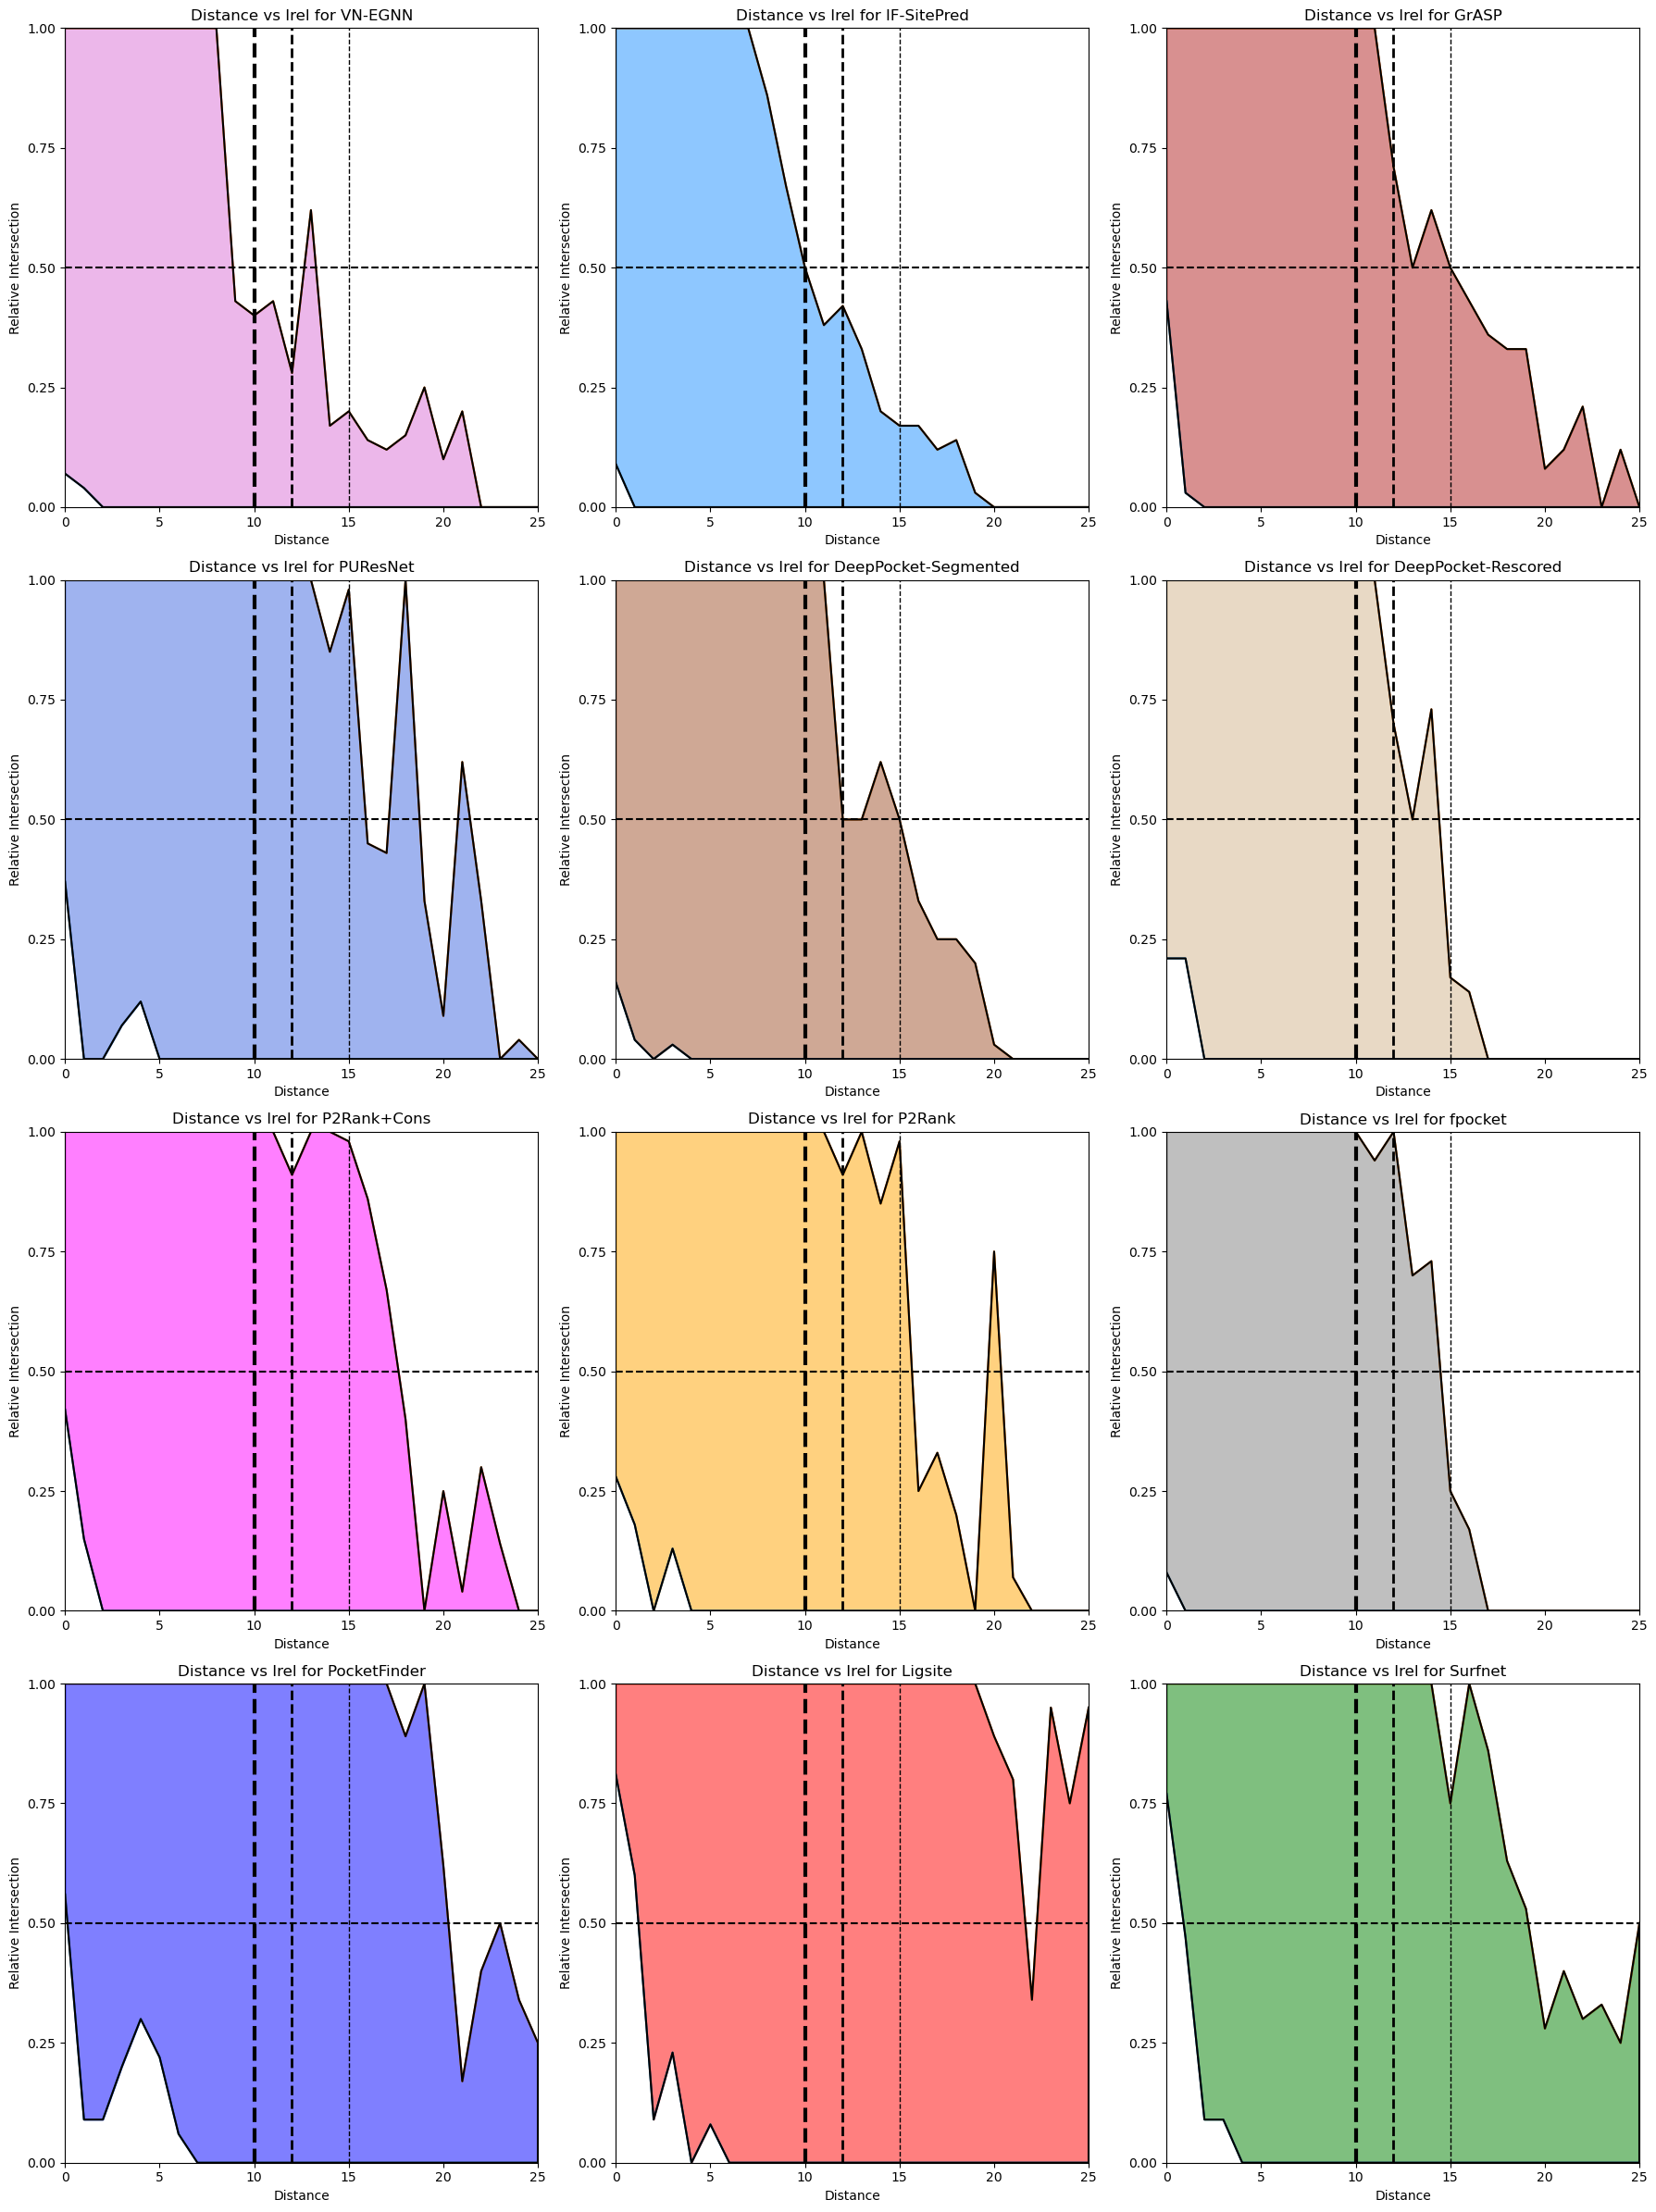

In [36]:
# Number of metrics (subplots needed)
num_mets = len(my_mets)
cols = 3  # Define number of columns in your subplot grid
rows = (num_mets + cols - 1) // cols  # Calculate the required number of rows

# Create a figure with subplots
fig, axs = plt.subplots(rows, cols, figsize=(cols*6, rows*6), squeeze=False)

for index, orig in enumerate(my_mets):
    ax = axs[index // cols, index % cols]  # Locate next subplot
    rows =  BEST_comparisons_df_DIST.query('origin_pred == @orig')
    distances = np.array(rows.distance.tolist())
    relative_intersections = np.array(rows.relative_intersection.tolist())

    bin_edges = np.arange(0, 27, 1)
    bin_indices = np.digitize(distances, bin_edges)

    min_values = []
    max_values = []
    for i in range(1, len(bin_edges)):
        indices = bin_indices == i
        if np.any(indices):
            min_values.append(np.min(relative_intersections[indices]))
            max_values.append(np.max(relative_intersections[indices]))
        else:
            min_values.append(None)
            max_values.append(None)

    # Filter out None values
    filtered_bin_centers = [bin_edges[i] for i in range(len(min_values)) if min_values[i] is not None]
    filtered_min_values = [min for min in min_values if min is not None]
    filtered_max_values = [max for max in max_values if max is not None]

    # Plotting on specific axes
    ax.plot(filtered_bin_centers, filtered_min_values, label='Min Relative Intersection', marker='', linestyle='-')
    ax.plot(filtered_bin_centers, filtered_max_values, label='Max Relative Intersection', marker='', linestyle='-')

    if filtered_min_values and filtered_max_values:
        ax.fill_between(filtered_bin_centers, filtered_min_values, filtered_max_values, color=palette[orig], alpha=0.5)
        ax.plot(filtered_bin_centers, filtered_min_values, color='black')
        ax.plot(filtered_bin_centers, filtered_max_values, color='black')

        ax.plot([filtered_bin_centers[0], filtered_bin_centers[0]], [filtered_min_values[0], filtered_max_values[0]], 'k-')
        ax.plot([filtered_bin_centers[-1], filtered_bin_centers[-1]], [filtered_max_values[-1], filtered_min_values[-1]], 'k-')

    ax.set(xlabel='Distance', ylabel='Relative Intersection')
    ax.set_title(f'Distance vs Irel for {orig}')
    ax.set_xlim(0, 25)
    ax.set_ylim(0, 1)
    ax.set_yticks(np.arange(0, 1.1, 0.25))
    ax.axhline(y=0.5, linestyle='--', color="k")
    ax.axvline(x=10, linestyle='--', color="k", linewidth=3)
    ax.axvline(x=12, linestyle='--', color="k", linewidth=2)
    ax.axvline(x=15, linestyle='--', color="k", linewidth=1)

# Turn off unused axes
# for i in range(index + 1, rows * cols):
#     axs[i // cols, i % cols].axis('off')

plt.tight_layout()
plt.show()

In [44]:
results_best_dist_FULL_COMB = success_rate_COMB(
    df = BEST_comparisons_df_DIST,
    dist_t_list = [0, 0.25, 0.5, 0.75, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    irel_t_list = [
        1.05, 1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55,
        0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.0],
    rank_t_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 1000],
    TOTAL_preds = len(LIGYSIS_NR),
)

Total predictions for DeepPocket-Rescored is 6721
Total predictions for DeepPocket-Segmented is 6721
Total predictions for DeepPocket-Segmented-NR is 6721
Total predictions for GrASP is 6721
Total predictions for IF-SitePred is 6721
Total predictions for IF-SitePred-NR is 6721
Total predictions for IF-SitePred-rescored-NR is 6721
Total predictions for Ligsite is 6721
Total predictions for Ligsite+PRANK is 6721
Total predictions for Ligsite+PRANK+Cons is 6721
Total predictions for Ligsite-AA is 6721
Total predictions for Ligsite-SS is 6721
Total predictions for P2Rank is 6721
Total predictions for P2Rank+Cons is 6721
Total predictions for PUResNet is 6721
Total predictions for PUResNet+PRANK is 6721
Total predictions for PUResNet+PRANK+Cons is 6721
Total predictions for PUResNet-AA is 6721
Total predictions for PocketFinder is 6721
Total predictions for PocketFinder+PRANK is 6721
Total predictions for PocketFinder+PRANK+Cons is 6721
Total predictions for PocketFinder-AA is 6721
Total pr

In [45]:
results_best_dist_FULL_COMB.query('rank_t == 2 & dist_t == 12 & irel_t == 1.05')

origin_pred  rank_t  dist_t  irel_t  success_rate  \
7304        DeepPocket-Rescored       2    12.0    1.05         0.581   
18920      DeepPocket-Segmented       2    12.0    1.05         0.438   
30536   DeepPocket-Segmented-NR       2    12.0    1.05         0.494   
42152                     GrASP       2    12.0    1.05         0.499   
53768               IF-SitePred       2    12.0    1.05         0.257   
65384            IF-SitePred-NR       2    12.0    1.05         0.370   
77000   IF-SitePred-rescored-NR       2    12.0    1.05         0.391   
88616                   Ligsite       2    12.0    1.05         0.484   
100232            Ligsite+PRANK       2    12.0    1.05         0.484   
111848       Ligsite+PRANK+Cons       2    12.0    1.05         0.485   
123464               Ligsite-AA       2    12.0    1.05         0.490   
135080               Ligsite-SS       2    12.0    1.05         0.490   
146696                   P2Rank       2    12.0    1.05         0.519   
158312              P2Rank+Cons       2    12.0    1.05         0.539   
169928                 PUResNet       2    12.0    1.05         0.411   
181544           PUResNet+PRANK       2    12.0    1.05         0.411   
193160      PUResNet+PRANK+Cons       2    12.0    1.05         0.411   
204776              PUResNet-AA       2    12.0    1.05         0.411   
216392             PocketFinder       2    12.0    1.05         0.478   
228008       PocketFinder+PRANK       2    12.0    1.05         0.477   
239624  PocketFinder+PRANK+Cons       2    12.0    1.05         0.476   
251240          PocketFinder-AA       2    12.0    1.05         0.489   
262856          PocketFinder-SS       2    12.0    1.05         0.487   
274472                  Surfnet       2    12.0    1.05         0.458   
286088            Surfnet+PRANK       2    12.0    1.05         0.454   
297704       Surfnet+PRANK+Cons       2    12.0    1.05         0.456   
309320               Surfnet-AA       2    12.0    1.05         0.474   
320936               Surfnet-SS       2    12.0    1.05         0.470   
332552                  VN-EGNN       2    12.0    1.05         0.409   
344168               VN-EGNN-NR       2    12.0    1.05         0.461   
355784                  fpocket       2    12.0    1.05         0.465   
367400            fpocket+PRANK       2    12.0    1.05         0.604   
379016       fpocket+PRANK+Cons       2    12.0    1.05         0.601   

        correct_predictions  total  lower_se  upper_se  
7304                   3905   6721     0.569     0.593  
18920                  2941   6721     0.426     0.449  
30536                  3318   6721     0.482     0.506  
42152                  3352   6721     0.487     0.511  
53768                  1728   6721     0.247     0.268  
65384                  2487   6721     0.358     0.382  
77000                  2629   6721     0.379     0.403  
88616                  3255   6721     0.472     0.496  
100232                 3252   6721     0.472     0.496  
111848                 3259   6721     0.473     0.497  
123464                 3295   6721     0.478     0.502  
135080                 3296   6721     0.478     0.502  
146696                 3491   6721     0.507     0.531  
158312                 3622   6721     0.527     0.551  
169928                 2762   6721     0.399     0.423  
181544                 2762   6721     0.399     0.423  
193160                 2762   6721     0.399     0.423  
204776                 2762   6721     0.399     0.423  
216392                 3210   6721     0.466     0.490  
228008                 3203   6721     0.465     0.489  
239624                 3202   6721     0.464     0.488  
251240                 3285   6721     0.477     0.501  
262856                 3275   6721     0.475     0.499  
274472                 3081   6721     0.447     0.470  
286088                 3054   6721     0.442     0.466  
297704                 3062   6721     0.444     0.467 

In [46]:
len(LIGYSIS_NR)

6721

In [47]:
print(round(100*(0.515-0.489), 2)) # POCKETFINDER
print(round(100*(0.536-0.490), 2)) # LIGSITE
print(round(100*(0.494-0.474), 2)) # SURFNET

2.6
4.6
2.0


In [48]:
results_best_dist_FULL_COMB.query('rank_t == 1000 & dist_t == 12 & irel_t == 1.05 & origin_pred in @OG_mets').sort_values("success_rate", ascending = False)

origin_pred  rank_t  dist_t  irel_t  success_rate  \
356202               fpocket    1000    12.0    1.05         0.913   
7722     DeepPocket-Rescored    1000    12.0    1.05         0.893   
147114                P2Rank    1000    12.0    1.05         0.570   
158730           P2Rank+Cons    1000    12.0    1.05         0.570   
19338   DeepPocket-Segmented    1000    12.0    1.05         0.565   
54186            IF-SitePred    1000    12.0    1.05         0.521   
216810          PocketFinder    1000    12.0    1.05         0.505   
42570                  GrASP    1000    12.0    1.05         0.500   
89034                Ligsite    1000    12.0    1.05         0.497   
332970               VN-EGNN    1000    12.0    1.05         0.493   
274890               Surfnet    1000    12.0    1.05         0.489   
170346              PUResNet    1000    12.0    1.05         0.411   

        correct_predictions  total  lower_se  upper_se  
356202                 6136   6721     0.906     0.920  
7722                   6001   6721     0.885     0.900  
147114                 3831   6721     0.558     0.582  
158730                 3834   6721     0.559     0.582  
19338                  3795   6721     0.553     0.577  
54186                  3505   6721     0.510     0.533  
216810                 3394   6721     0.493     0.517  
42570                  3358   6721     0.488     0.512  
89034                  3342   6721     0.485     0.509  
332970                 3314   6721     0.481     0.505  
274890                 3288   6721     0.477     0.501  
170346                 2762   6721     0.399     0.423

In [49]:
results_best_dist_FULL_COMB.query('rank_t == 2 & dist_t == 12 & irel_t == 1.05').sort_values("success_rate", ascending = False)

origin_pred  rank_t  dist_t  irel_t  success_rate  \
367400            fpocket+PRANK       2    12.0    1.05         0.604   
379016       fpocket+PRANK+Cons       2    12.0    1.05         0.601   
7304        DeepPocket-Rescored       2    12.0    1.05         0.581   
158312              P2Rank+Cons       2    12.0    1.05         0.539   
146696                   P2Rank       2    12.0    1.05         0.519   
42152                     GrASP       2    12.0    1.05         0.499   
30536   DeepPocket-Segmented-NR       2    12.0    1.05         0.494   
123464               Ligsite-AA       2    12.0    1.05         0.490   
135080               Ligsite-SS       2    12.0    1.05         0.490   
251240          PocketFinder-AA       2    12.0    1.05         0.489   
262856          PocketFinder-SS       2    12.0    1.05         0.487   
111848       Ligsite+PRANK+Cons       2    12.0    1.05         0.485   
88616                   Ligsite       2    12.0    1.05         0.484   
100232            Ligsite+PRANK       2    12.0    1.05         0.484   
216392             PocketFinder       2    12.0    1.05         0.478   
228008       PocketFinder+PRANK       2    12.0    1.05         0.477   
239624  PocketFinder+PRANK+Cons       2    12.0    1.05         0.476   
309320               Surfnet-AA       2    12.0    1.05         0.474   
320936               Surfnet-SS       2    12.0    1.05         0.470   
355784                  fpocket       2    12.0    1.05         0.465   
344168               VN-EGNN-NR       2    12.0    1.05         0.461   
274472                  Surfnet       2    12.0    1.05         0.458   
297704       Surfnet+PRANK+Cons       2    12.0    1.05         0.456   
286088            Surfnet+PRANK       2    12.0    1.05         0.454   
18920      DeepPocket-Segmented       2    12.0    1.05         0.438   
181544           PUResNet+PRANK       2    12.0    1.05         0.411   
169928                 PUResNet       2    12.0    1.05         0.411   
204776              PUResNet-AA       2    12.0    1.05         0.411   
193160      PUResNet+PRANK+Cons       2    12.0    1.05         0.411   
332552                  VN-EGNN       2    12.0    1.05         0.409   
77000   IF-SitePred-rescored-NR       2    12.0    1.05         0.391   
65384            IF-SitePred-NR       2    12.0    1.05         0.370   
53768               IF-SitePred       2    12.0    1.05         0.257   

        correct_predictions  total  lower_se  upper_se  
367400                 4061   6721     0.593     0.616  
379016                 4040   6721     0.589     0.613  
7304                   3905   6721     0.569     0.593  
158312                 3622   6721     0.527     0.551  
146696                 3491   6721     0.507     0.531  
42152                  3352   6721     0.487     0.511  
30536                  3318   6721     0.482     0.506  
123464                 3295   6721     0.478     0.502  
135080                 3296   6721     0.478     0.502  
251240                 3285   6721     0.477     0.501  
262856                 3275   6721     0.475     0.499  
111848                 3259   6721     0.473     0.497  
88616                  3255   6721     0.472     0.496  
100232                 3252   6721     0.472     0.496  
216392                 3210   6721     0.466     0.490  
228008                 3203   6721     0.465     0.489  
239624                 3202   6721     0.464     0.488  
309320                 3183   6721     0.462     0.486  
320936                 3160   6721     0.458     0.482  
355784                 3127   6721     0.453     0.477  
344168                 3098   6721     0.449     0.473  
274472                 3081   6721     0.447     0.470  
297704                 3062   6721     0.444     0.467  
286088                 3054   6721     0.442     0.466  
18920                  2941   6721     0.426     0.449  
181544                 2762   6721     0.399     0.423 

In [50]:
results_best_dist_FULL_COMB.query('rank_t == 0 & dist_t == 12 & irel_t == 1.05').sort_values("success_rate", ascending = False)

origin_pred  rank_t  dist_t  irel_t  success_rate  \
367356            fpocket+PRANK       0    12.0    1.05         0.488   
158268              P2Rank+Cons       0    12.0    1.05         0.488   
42108                     GrASP       0    12.0    1.05         0.480   
378972       fpocket+PRANK+Cons       0    12.0    1.05         0.479   
146652                   P2Rank       0    12.0    1.05         0.467   
7260        DeepPocket-Rescored       0    12.0    1.05         0.466   
123420               Ligsite-AA       0    12.0    1.05         0.449   
135036               Ligsite-SS       0    12.0    1.05         0.446   
251196          PocketFinder-AA       0    12.0    1.05         0.445   
344124               VN-EGNN-NR       0    12.0    1.05         0.445   
262812          PocketFinder-SS       0    12.0    1.05         0.435   
30492   DeepPocket-Segmented-NR       0    12.0    1.05         0.434   
309276               Surfnet-AA       0    12.0    1.05         0.433   
320892               Surfnet-SS       0    12.0    1.05         0.416   
88572                   Ligsite       0    12.0    1.05         0.413   
111804       Ligsite+PRANK+Cons       0    12.0    1.05         0.411   
100188            Ligsite+PRANK       0    12.0    1.05         0.409   
193116      PUResNet+PRANK+Cons       0    12.0    1.05         0.408   
181500           PUResNet+PRANK       0    12.0    1.05         0.408   
204732              PUResNet-AA       0    12.0    1.05         0.408   
169884                 PUResNet       0    12.0    1.05         0.406   
227964       PocketFinder+PRANK       0    12.0    1.05         0.398   
239580  PocketFinder+PRANK+Cons       0    12.0    1.05         0.397   
216348             PocketFinder       0    12.0    1.05         0.392   
274428                  Surfnet       0    12.0    1.05         0.377   
286044            Surfnet+PRANK       0    12.0    1.05         0.370   
297660       Surfnet+PRANK+Cons       0    12.0    1.05         0.369   
18876      DeepPocket-Segmented       0    12.0    1.05         0.354   
355740                  fpocket       0    12.0    1.05         0.348   
76956   IF-SitePred-rescored-NR       0    12.0    1.05         0.297   
65340            IF-SitePred-NR       0    12.0    1.05         0.280   
332508                  VN-EGNN       0    12.0    1.05         0.275   
53724               IF-SitePred       0    12.0    1.05         0.198   

        correct_predictions  total  lower_se  upper_se  
367356                 3283   6721     0.477     0.500  
158268                 3278   6721     0.476     0.500  
42108                  3224   6721     0.468     0.492  
378972                 3222   6721     0.467     0.491  
146652                 3141   6721     0.455     0.479  
7260                   3131   6721     0.454     0.478  
123420                 3017   6721     0.437     0.461  
135036                 2995   6721     0.434     0.458  
251196                 2993   6721     0.433     0.457  
344124                 2990   6721     0.433     0.457  
262812                 2922   6721     0.423     0.447  
30492                  2920   6721     0.423     0.446  
309276                 2912   6721     0.421     0.445  
320892                 2794   6721     0.404     0.427  
88572                  2779   6721     0.402     0.425  
111804                 2763   6721     0.399     0.423  
100188                 2750   6721     0.397     0.421  
193116                 2739   6721     0.396     0.419  
181500                 2742   6721     0.396     0.420  
204732                 2743   6721     0.396     0.420  
169884                 2732   6721     0.395     0.418  
227964                 2678   6721     0.387     0.410  
239580                 2670   6721     0.386     0.409  
216348                 2633   6721     0.380     0.403  
274428                 2532   6721     0.365     0.388  
286044                 2488   6721     0.359     0.382 

In [370]:
print(3098 - 2752) #VN-EGNN
print(2629 - 1728) #IF-SitePred
print(2762 - 2762) #PUResNet
print(3318 - 2941) #DeepPocket-SEG
print(4061 - 3127) #fpocket

346
901
0
377
934


In [1286]:
print(round(46.6-41.4, 2)) # increase in recall for VN-EGNN

print(round(50.3 - 33.1, 2)) # increase in recall for IF-SitePred

print(round(56.9 - 50.4, 2)) # increase in recall for DeepPocket-SEG

print(round(49.0-49.0, 2)) # increase in recall for PUResNet

print(round(51.5-50.3, 2)) # increase in recall for PocketFinder

print(round(53.6-53.0, 2)) # increase in recall for Ligsite

print(round(49.4-47.8, 2)) # increase in recall for Surfnet

5.2
17.2
6.5
0.0
1.2
0.6
1.6


In [144]:
print(round(46.1-40.9, 2)) # increase in recall for VN-EGNN

print(round(37.0 - 25.7, 2)) # increase in recall for IF-SitePred

print(round(39.1 - 37.0, 2)) # increase in recall for IF-SitePred

print(round(49.4 - 43.8, 2)) # increase in recall for DeepPocket-SEG

print(round(41.1-41.1, 2)) # increase in recall for PUResNet

print(round(60.4-46.5, 2)) # increase in recall for fpocket + PRANK

print(round(58.1-46.5, 2)) # increase in recall for fpocket + DeepPocket

print(round(48.9-47.8, 2)) # increase in recall for PocketFinder

print(round(49.0-48.4, 2)) # increase in recall for Ligsite

print(round(47.4-45.8, 2)) # increase in recall for Surfnet

5.2
11.3
2.1
5.6
0.0
13.9
11.6
1.1
0.6
1.6


## VN-EGNN variants

In [95]:
dts = [0.25, 0.5, 0.75]

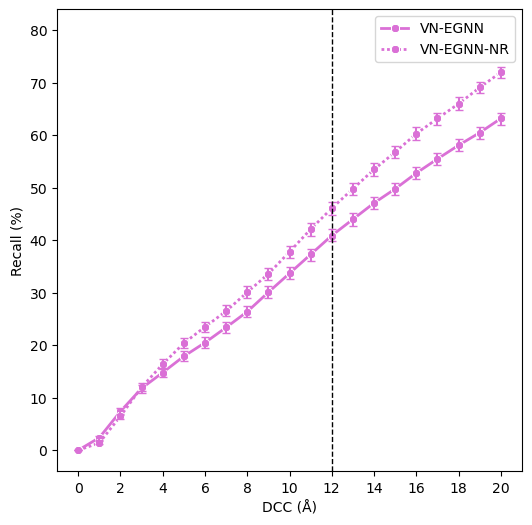

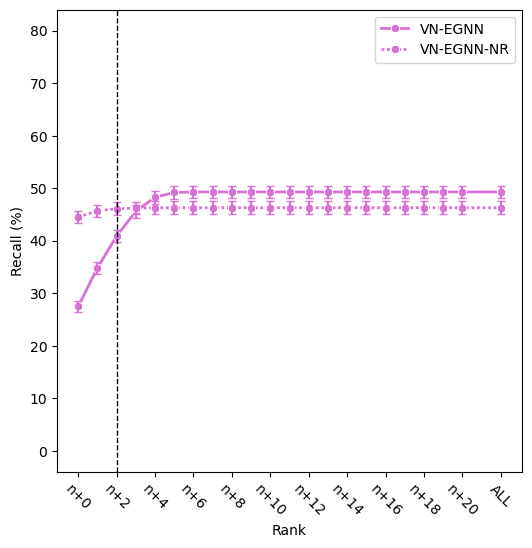

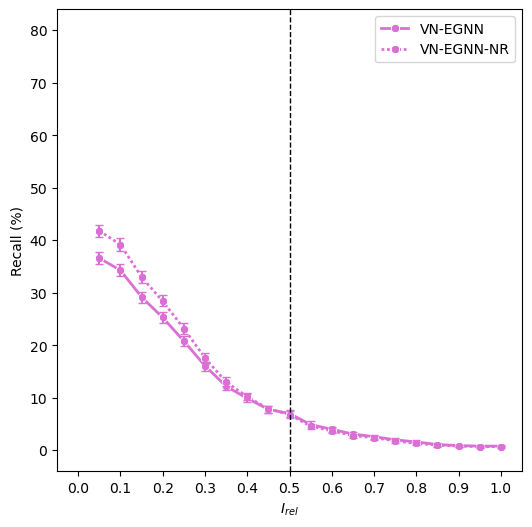

In [32]:
met_subset = ["VN-EGNN", "VN-EGNN-NR"]

dts = [0.25, 0.5, 0.75]
plot_results_def_NEW_2cols(
    df = results_best_dist_FULL_COMB.query('dist_t not in @dts'), methods = met_subset,
    fix_col1 = "irel_t", fix_col2 = "rank_t", fix_val1 = 1.05, fix_val2 = 2,
    var_col = "dist_t",var_col_label = "DCC (Å)",
    legend_order = met_subset, ylabel="Recall (%)", xline=12, xticks=np.arange(0, 21, 2), xlim=None,
    FSIZE=(6, 6), DPI=100, MS = 6.5, LW = 2, error = True,
    yticks = np.arange(0, 90, 10), ylim = (-4, 84),
    #out = "./figs/VNEGNN_variants_recall_V_dist_FULL.png"
)

plot_results_def_NEW_2cols(
    df = results_best_dist_FULL_COMB.query('rank_t <2000'), methods = met_subset,
    fix_col1 = "irel_t", fix_col2 = "dist_t", fix_val1 = 1.05, fix_val2 = 12,
    var_col = "rank_t",var_col_label = "Rank",
    legend_order = met_subset, ylabel="Recall (%)", xline=2, xticks=np.arange(0, 21, 2), xlim=None,
    FSIZE=(6, 6), DPI=100, MS = 6.5, LW = 2, error = True,
    yticks = np.arange(0, 90, 10), ylim = (-4, 84),
    #out = "./figs/VNEGNN_variants_recall_V_rank_FULL.png"
)

plot_results_def_NEW_2cols(
    df = results_best_dist_FULL_COMB.query('irel_t > 0.01 & irel_t < 1.05'), methods = met_subset,
    fix_col1 = "dist_t", fix_col2 = "rank_t", fix_val1 = 0, fix_val2 = 2,
    var_col = "irel_t",var_col_label = r'$I_{rel}$',
    legend_order = met_subset, ylabel="Recall (%)", xline=0.5, xticks=np.arange(0, 1.1, 0.1), xlim=(-0.05, 1.05),
    FSIZE=(6, 6), DPI=100, MS = 6.5, LW = 2, error = True,
    yticks = np.arange(0, 90, 10), ylim = (-4, 84),
    #out = "./figs/VNEGNN_variants_recall_V_irel_FULL.png"
)

## IF-SitePred variants

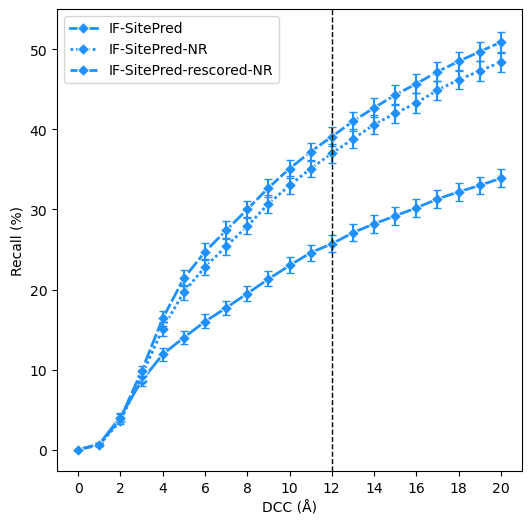

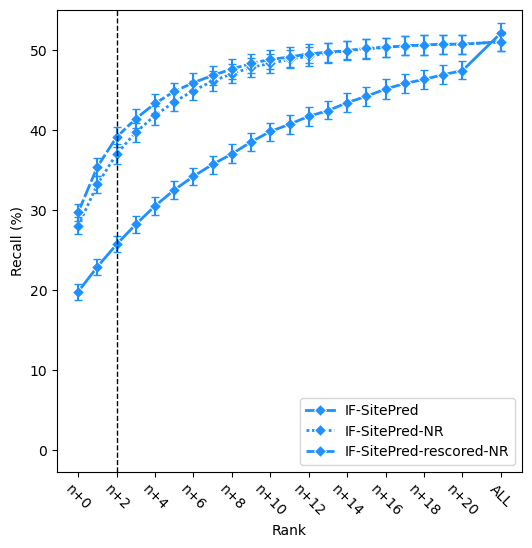

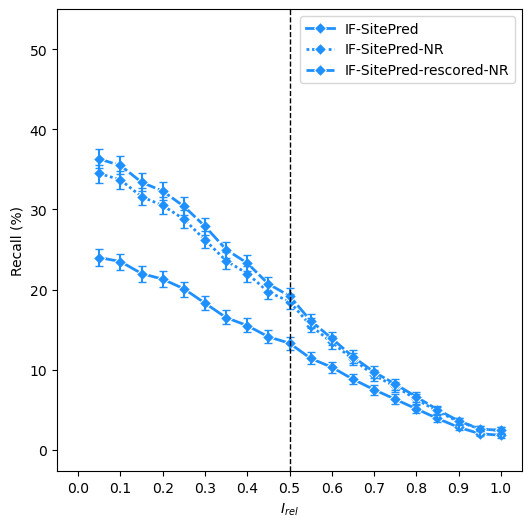

In [33]:
met_subset = ["IF-SitePred", "IF-SitePred-NR", "IF-SitePred-rescored-NR"]

plot_results_def_NEW_2cols(
    df = results_best_dist_FULL_COMB.query('dist_t not in @dts'), methods = met_subset,
    fix_col1 = "irel_t", fix_col2 = "rank_t", fix_val1 = 1.05, fix_val2 = 2,
    var_col = "dist_t",var_col_label = "DCC (Å)",
    legend_order = met_subset, ylabel="Recall (%)", xline=12, xticks=np.arange(0, 21, 2), xlim=None,
    FSIZE=(6, 6), DPI=100, MS = 6.5, LW = 2, error = True,
    yticks = np.arange(0, 60, 10), ylim = (-2.7, 55),
    #out = "./figs/IFSP_variants_recall_V_dist_FULL.png"
)

plot_results_def_NEW_2cols(
    df = results_best_dist_FULL_COMB.query('rank_t <2000'), methods = met_subset,
    fix_col1 = "irel_t", fix_col2 = "dist_t", fix_val1 = 1.05, fix_val2 = 12,
    var_col = "rank_t",var_col_label = "Rank",
    legend_order = met_subset, ylabel="Recall (%)", xline=2, xticks=np.arange(0, 21, 2), xlim=None,
    FSIZE=(6, 6), DPI=100, MS = 6.5, LW = 2, error = True,
    yticks = np.arange(0, 60, 10), ylim = (-2.7, 55),
    #out = "./figs/IFSP_variants_recall_V_rank_FULL.png"
)

plot_results_def_NEW_2cols(
    df = results_best_dist_FULL_COMB.query('irel_t > 0.01 & irel_t < 1.05'), methods = met_subset,
    fix_col1 = "dist_t", fix_col2 = "rank_t", fix_val1 = 0, fix_val2 = 2,
    var_col = "irel_t",var_col_label = r'$I_{rel}$',
    legend_order = met_subset, ylabel="Recall (%)", xline=0.5, xticks=np.arange(0, 1.1, 0.1), xlim=(-0.05, 1.05),
    FSIZE=(6, 6), DPI=100, MS = 6.5, LW = 2, error = True,
    yticks = np.arange(0, 60, 10), ylim = (-2.7, 55),
    #out = "./figs/IFSP_variants_recall_V_irel_FULL.png"
)

## PUResNet variants

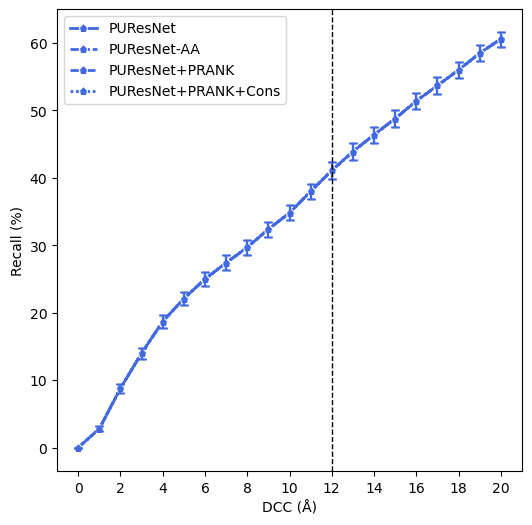

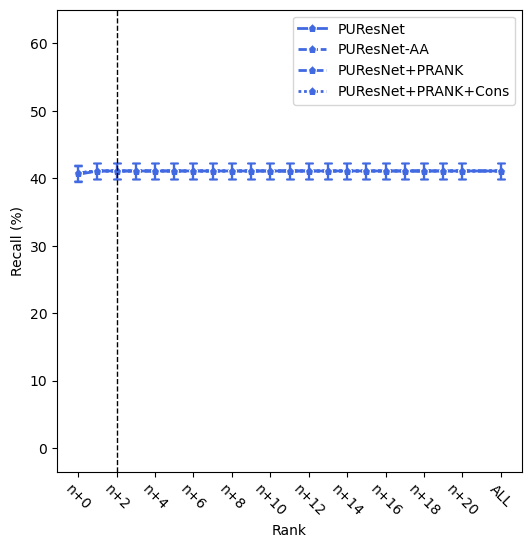

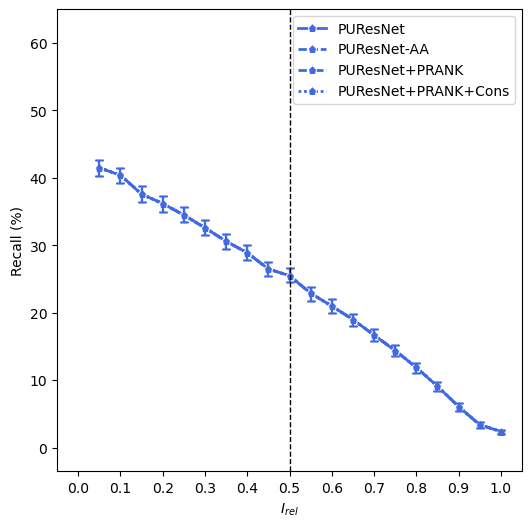

In [34]:
met_subset = ["PUResNet", "PUResNet-AA", "PUResNet+PRANK", "PUResNet+PRANK+Cons"]

plot_results_def_NEW_2cols(
    df = results_best_dist_FULL_COMB.query('dist_t not in @dts'), methods = met_subset,
    fix_col1 = "irel_t", fix_col2 = "rank_t", fix_val1 = 1.05, fix_val2 = 2,
    var_col = "dist_t",var_col_label = "DCC (Å)",
    legend_order = met_subset, ylabel="Recall (%)", xline=12, xticks=np.arange(0, 21, 2), xlim=None,
    FSIZE=(6, 6), DPI=100, MS = 6.5, LW = 2, error = True,
    yticks = np.arange(0, 70, 10), ylim = (-3.5, 65),
    #out = "./figs/PURESNET_variants_recall_V_dist_FULL.png"
)

plot_results_def_NEW_2cols(
    df = results_best_dist_FULL_COMB.query('rank_t <2000'), methods = met_subset,
    fix_col1 = "irel_t", fix_col2 = "dist_t", fix_val1 = 1.05, fix_val2 = 12,
    var_col = "rank_t",var_col_label = "Rank",
    legend_order = met_subset, ylabel="Recall (%)", xline=2, xticks=np.arange(0, 21, 2), xlim=None,
    FSIZE=(6, 6), DPI=100, MS = 6.5, LW = 2, error = True,
    yticks = np.arange(0, 70, 10), ylim = (-3.5, 65),
    #out = "./figs/PURESNET_variants_recall_V_rank_FULL.png"
)

plot_results_def_NEW_2cols(
    df = results_best_dist_FULL_COMB.query('irel_t > 0.01 & irel_t < 1.05'), methods = met_subset,
    fix_col1 = "dist_t", fix_col2 = "rank_t", fix_val1 = 0, fix_val2 = 2,
    var_col = "irel_t",var_col_label = r'$I_{rel}$',
    legend_order = met_subset, ylabel="Recall (%)", xline=0.5, xticks=np.arange(0, 1.1, 0.1), xlim=(-0.05, 1.05),
    FSIZE=(6, 6), DPI=100, MS = 6.5, LW = 2, error = True,
    yticks = np.arange(0, 70, 10), ylim = (-3.5, 65),
    #out = "./figs/PURESNET_variants_recall_V_irel_FULL.png"
)

## DeepPocket-SEG variants

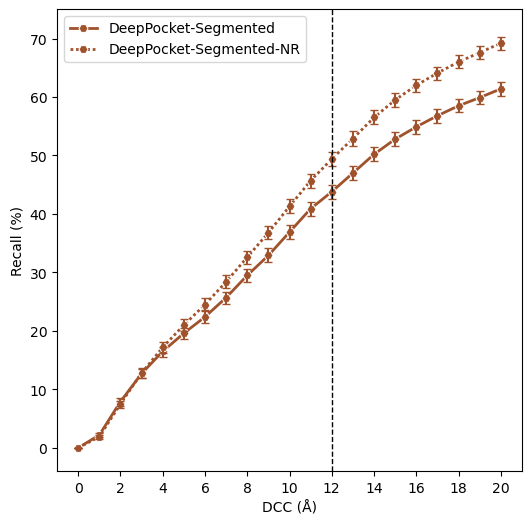

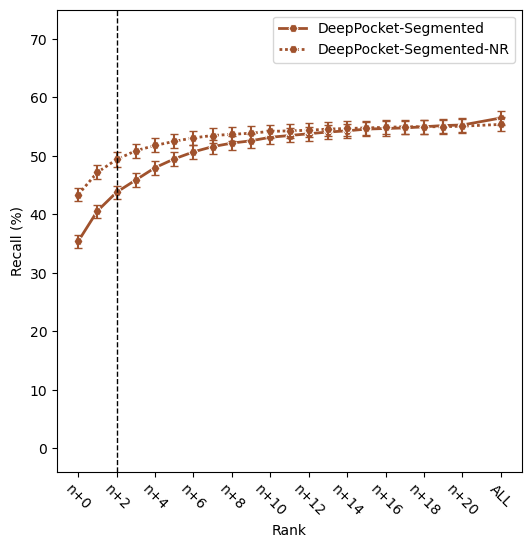

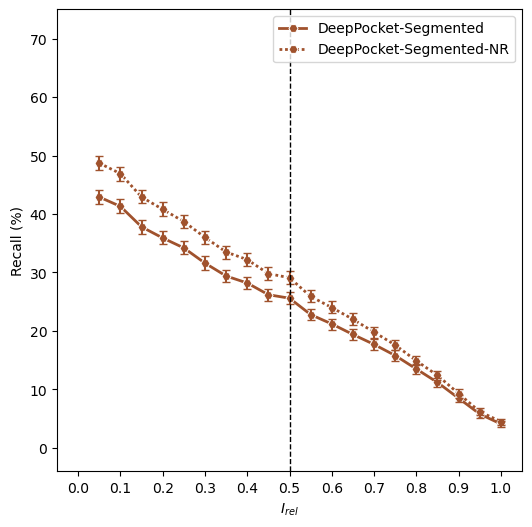

In [35]:
met_subset = ["DeepPocket-Segmented", "DeepPocket-Segmented-NR",]

plot_results_def_NEW_2cols(
    df = results_best_dist_FULL_COMB.query('dist_t not in @dts'), methods = met_subset,
    fix_col1 = "irel_t", fix_col2 = "rank_t", fix_val1 = 1.05, fix_val2 = 2,
    var_col = "dist_t",var_col_label = "DCC (Å)",
    legend_order = met_subset, ylabel="Recall (%)", xline=12, xticks=np.arange(0, 21, 2), xlim=None,
    FSIZE=(6, 6), DPI=100, MS = 6.5, LW = 2, error = True,
    yticks = np.arange(0, 80, 10), ylim = (-4, 75),
    #out = "./figs/DEEPPOCKET_SEG_variants_recall_V_dist_FULL.png"
)

plot_results_def_NEW_2cols(
    df = results_best_dist_FULL_COMB.query('rank_t <2000'), methods = met_subset,
    fix_col1 = "irel_t", fix_col2 = "dist_t", fix_val1 = 1.05, fix_val2 = 12,
    var_col = "rank_t",var_col_label = "Rank",
    legend_order = met_subset, ylabel="Recall (%)", xline=2, xticks=np.arange(0, 21, 2), xlim=None,
    FSIZE=(6, 6), DPI=100, MS = 6.5, LW = 2, error = True,
    yticks = np.arange(0, 80, 10), ylim = (-4, 75),
    #out = "./figs/DEEPPOCKET_SEG_variants_recall_V_rank_FULL.png"
)

plot_results_def_NEW_2cols(
    df = results_best_dist_FULL_COMB.query('irel_t > 0.01 & irel_t < 1.05'), methods = met_subset,
    fix_col1 = "dist_t", fix_col2 = "rank_t", fix_val1 = 0, fix_val2 = 2,
    var_col = "irel_t",var_col_label = r'$I_{rel}$',
    legend_order = met_subset, ylabel="Recall (%)", xline=0.5, xticks=np.arange(0, 1.1, 0.1), xlim=(-0.05, 1.05),
    FSIZE=(6, 6), DPI=100, MS = 6.5, LW = 2, error = True,
    yticks = np.arange(0, 80, 10), ylim = (-4, 75),
    #out = "./figs/DEEPPOCKET_SEG_variants_recall_V_irel_FULL.png"
)

## fpocket variants

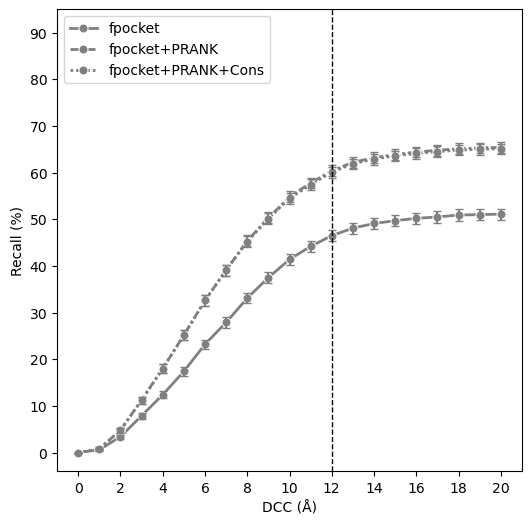

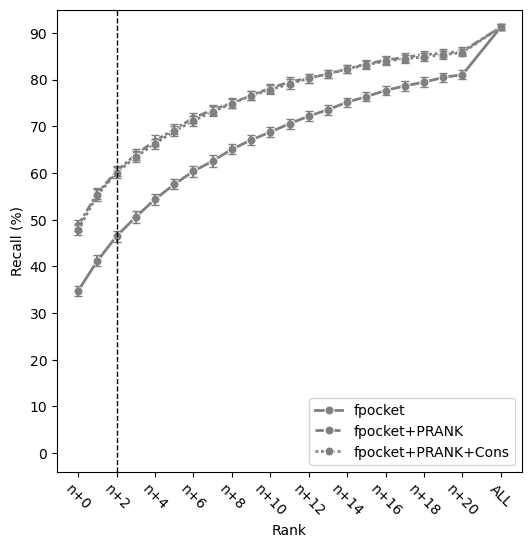

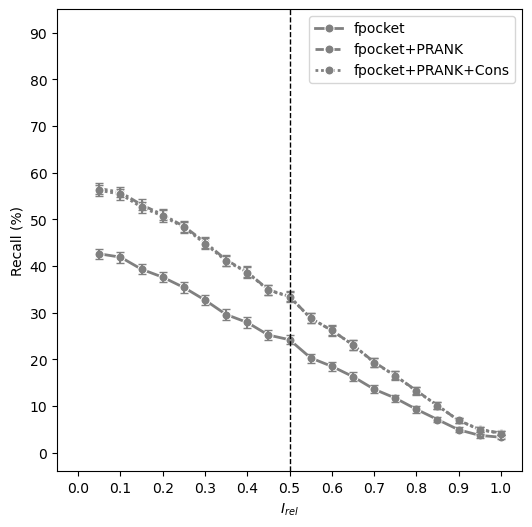

In [36]:
met_subset = ["fpocket", "fpocket+PRANK", "fpocket+PRANK+Cons"]
dts = [0.25, 0.5, 0.75]

plot_results_def_NEW_2cols(
    df = results_best_dist_FULL_COMB.query('dist_t not in @dts'), methods = met_subset,
    fix_col1 = "irel_t", fix_col2 = "rank_t", fix_val1 = 1.05, fix_val2 = 2,
    var_col = "dist_t",var_col_label = "DCC (Å)",
    legend_order = met_subset, ylabel="Recall (%)", xline=12, xticks=np.arange(0, 21, 2), xlim=None,
    FSIZE=(6, 6), DPI=100, MS = 6.5, LW = 2, error = True,
    yticks = np.arange(0, 100, 10), ylim = (-4, 95),
    #out = "./figs/FPOCKET_variants_recall_V_dist_FULL_LEG.png"
)

plot_results_def_NEW_2cols(
    df = results_best_dist_FULL_COMB.query('rank_t <2000'), methods = met_subset,
    fix_col1 = "irel_t", fix_col2 = "dist_t", fix_val1 = 1.05, fix_val2 = 12,
    var_col = "rank_t",var_col_label = "Rank",
    legend_order = met_subset, ylabel="Recall (%)", xline=2, xticks=np.arange(0, 21, 2), xlim=None,
    FSIZE=(6, 6), DPI=100, MS = 6.5, LW = 2, error = True,
    yticks = np.arange(0, 100, 10), ylim = (-4, 95),
    #out = "./figs/FPOCKET_variants_recall_V_rank_FULL.png"
)

plot_results_def_NEW_2cols(
    df = results_best_dist_FULL_COMB.query('irel_t > 0.01 & irel_t < 1.05'), methods = met_subset,
    fix_col1 = "dist_t", fix_col2 = "rank_t", fix_val1 = 0, fix_val2 = 2,
    var_col = "irel_t",var_col_label = r'$I_{rel}$',
    legend_order = met_subset, ylabel="Recall (%)", xline=0.5, xticks=np.arange(0, 1.1, 0.1), xlim=(-0.05, 1.05),
    FSIZE=(6, 6), DPI=100, MS = 6.5, LW = 2, error = True,
    yticks = np.arange(0, 100, 10), ylim = (-4, 95),
    #out = "./figs/FPOCKET_variants_recall_V_irel_FULL.png"
)

## PocketFinder variants

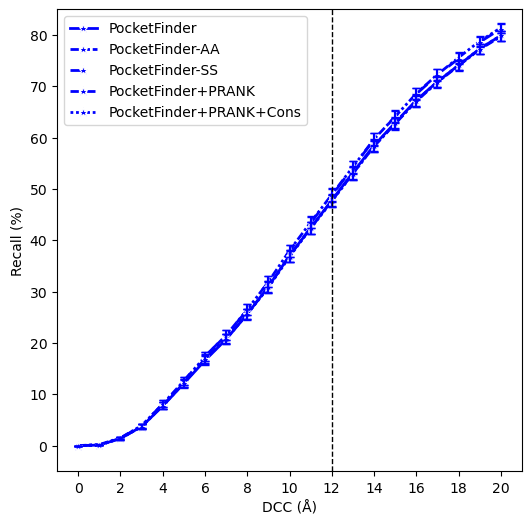

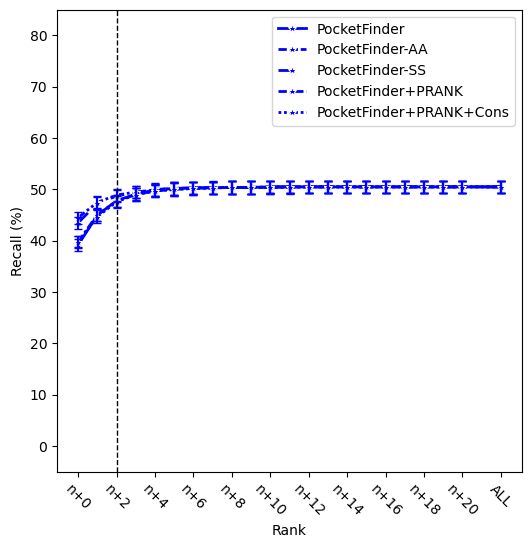

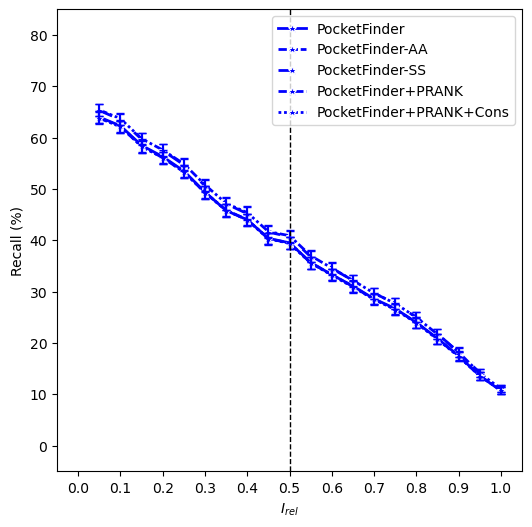

In [37]:
met_subset = ["PocketFinder", "PocketFinder-AA", "PocketFinder-SS", "PocketFinder+PRANK", "PocketFinder+PRANK+Cons"]

plot_results_def_NEW_2cols(
    df = results_best_dist_FULL_COMB.query('dist_t not in @dts'), methods = met_subset,
    fix_col1 = "irel_t", fix_col2 = "rank_t", fix_val1 = 1.05, fix_val2 = 2,
    var_col = "dist_t",var_col_label = "DCC (Å)",
    legend_order = met_subset, ylabel="Recall (%)", xline=12, xticks=np.arange(0, 21, 2), xlim=None,
    FSIZE=(6, 6), DPI=100, MS = 6.5, LW = 2, error = True,
    yticks = np.arange(0, 90, 10), ylim = (-5, 85),
    #out = "./figs/POCKETFINDER_variants_recall_V_dist_FULL.png"
)

plot_results_def_NEW_2cols(
    df = results_best_dist_FULL_COMB.query('rank_t <2000'), methods = met_subset,
    fix_col1 = "irel_t", fix_col2 = "dist_t", fix_val1 = 1.05, fix_val2 = 12,
    var_col = "rank_t",var_col_label = "Rank",
    legend_order = met_subset, ylabel="Recall (%)", xline=2, xticks=np.arange(0, 21, 2), xlim=None,
    FSIZE=(6, 6), DPI=100, MS = 6.5, LW = 2, error = True,
    yticks = np.arange(0, 90, 10), ylim = (-5, 85),
    #out = "./figs/POCKETFINDER_variants_recall_V_rank_FULL.png"
)

plot_results_def_NEW_2cols(
    df = results_best_dist_FULL_COMB.query('irel_t > 0.01 & irel_t < 1.05'), methods = met_subset,
    fix_col1 = "dist_t", fix_col2 = "rank_t", fix_val1 = 0, fix_val2 = 2,
    var_col = "irel_t",var_col_label = r'$I_{rel}$',
    legend_order = met_subset, ylabel="Recall (%)", xline=0.5, xticks=np.arange(0, 1.1, 0.1), xlim=(-0.05, 1.05),
    FSIZE=(6, 6), DPI=100, MS = 6.5, LW = 2, error = True,
    yticks = np.arange(0, 90, 10), ylim = (-5, 85),
    #out = "./figs/POCKETFINDER_variants_recall_V_irel_FULL.png"
)

## Ligsite variants

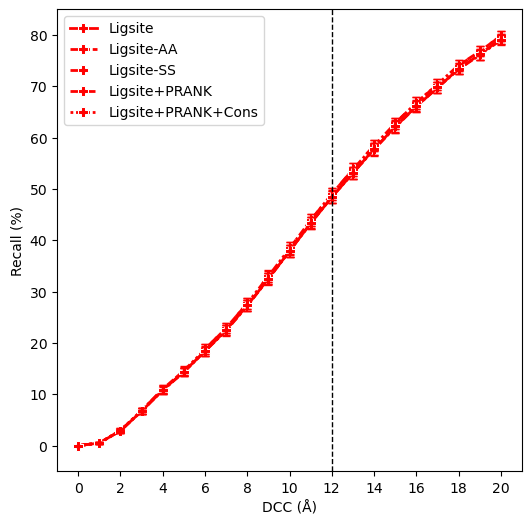

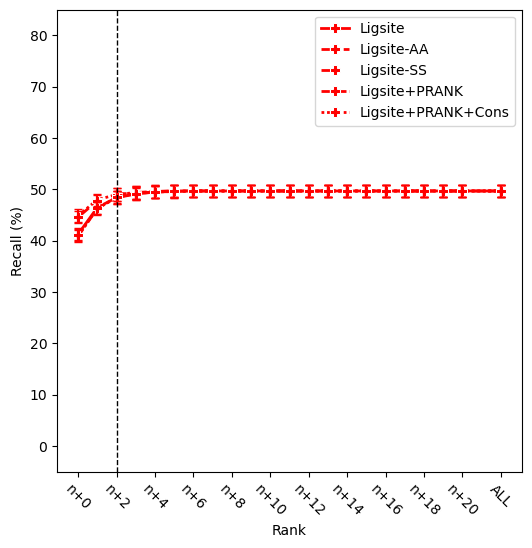

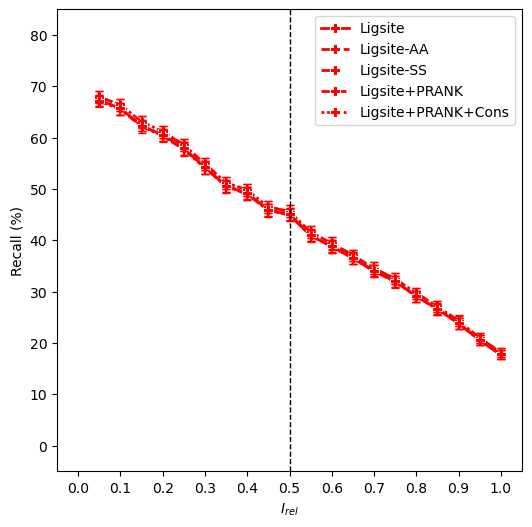

In [38]:
met_subset = ["Ligsite", "Ligsite-AA", "Ligsite-SS", "Ligsite+PRANK", "Ligsite+PRANK+Cons"]

plot_results_def_NEW_2cols(
    df = results_best_dist_FULL_COMB.query('dist_t not in @dts'), methods = met_subset,
    fix_col1 = "irel_t", fix_col2 = "rank_t", fix_val1 = 1.05, fix_val2 = 2,
    var_col = "dist_t",var_col_label = "DCC (Å)",
    legend_order = met_subset, ylabel="Recall (%)", xline=12, xticks=np.arange(0, 21, 2), xlim=None,
    FSIZE=(6, 6), DPI=100, MS = 6.5, LW = 2, error = True,
    yticks = np.arange(0, 90, 10), ylim = (-5, 85),
    #out = "./figs/LIGSITE_variants_recall_V_dist_FULL.png"
)

plot_results_def_NEW_2cols(
    df = results_best_dist_FULL_COMB.query('rank_t <2000'), methods = met_subset,
    fix_col1 = "irel_t", fix_col2 = "dist_t", fix_val1 = 1.05, fix_val2 = 12,
    var_col = "rank_t",var_col_label = "Rank",
    legend_order = met_subset, ylabel="Recall (%)", xline=2, xticks=np.arange(0, 21, 2), xlim=None,
    FSIZE=(6, 6), DPI=100, MS = 6.5, LW = 2, error = True,
    yticks = np.arange(0, 90, 10), ylim = (-5, 85),
    #out = "./figs/LIGSITE_variants_recall_V_rank_FULL.png"
)

plot_results_def_NEW_2cols(
    df = results_best_dist_FULL_COMB.query('irel_t > 0.01 & irel_t < 1.05'), methods = met_subset,
    fix_col1 = "dist_t", fix_col2 = "rank_t", fix_val1 = 0, fix_val2 = 2,
    var_col = "irel_t",var_col_label = r'$I_{rel}$',
    legend_order = met_subset, ylabel="Recall (%)", xline=0.5, xticks=np.arange(0, 1.1, 0.1), xlim=(-0.05, 1.05),
    FSIZE=(6, 6), DPI=100, MS = 6.5, LW = 2, error = True,
    yticks = np.arange(0, 90, 10), ylim = (-5, 85),
    #out = "./figs/LIGSITE_variants_recall_V_irel_FULL.png"
)

## Surfnet variants

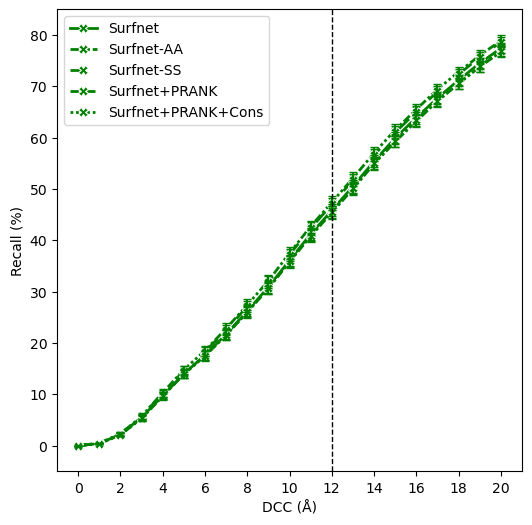

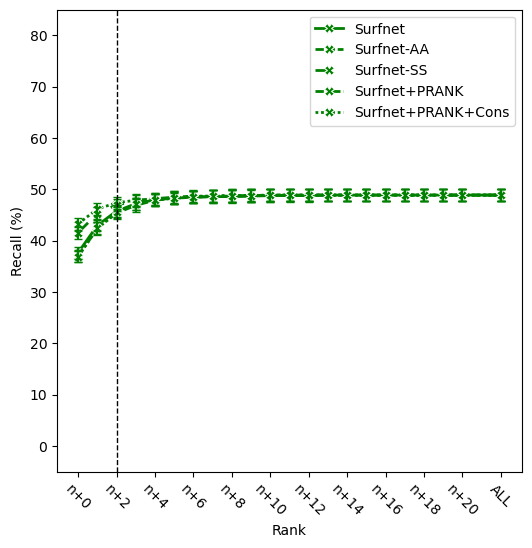

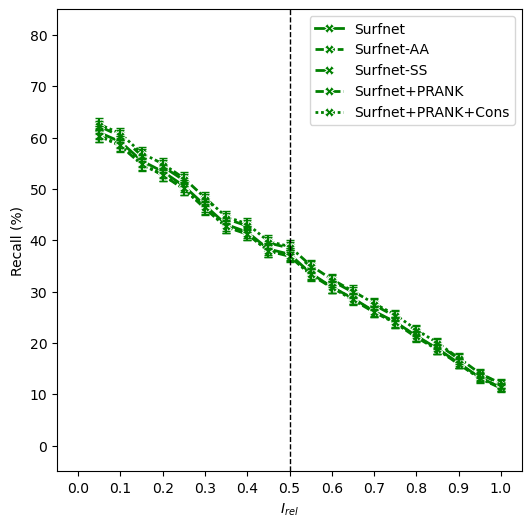

In [39]:
met_subset = ["Surfnet", "Surfnet-AA", "Surfnet-SS", "Surfnet+PRANK", "Surfnet+PRANK+Cons"]

plot_results_def_NEW_2cols(
    df = results_best_dist_FULL_COMB.query('dist_t not in @dts'), methods = met_subset,
    fix_col1 = "irel_t", fix_col2 = "rank_t", fix_val1 = 1.05, fix_val2 = 2,
    var_col = "dist_t",var_col_label = "DCC (Å)",
    legend_order = met_subset, ylabel="Recall (%)", xline=12, xticks=np.arange(0, 21, 2), xlim=None,
    FSIZE=(6, 6), DPI=100, MS = 6.5, LW = 2, error = True,
    yticks = np.arange(0, 90, 10), ylim = (-5, 85),
    #out = "./figs/SURFNET_variants_recall_V_dist_FULL.png"
)

plot_results_def_NEW_2cols(
    df = results_best_dist_FULL_COMB.query('rank_t <2000'), methods = met_subset,
    fix_col1 = "irel_t", fix_col2 = "dist_t", fix_val1 = 1.05, fix_val2 = 12,
    var_col = "rank_t",var_col_label = "Rank",
    legend_order = met_subset, ylabel="Recall (%)", xline=2, xticks=np.arange(0, 21, 2), xlim=None,
    FSIZE=(6, 6), DPI=100, MS = 6.5, LW = 2, error = True,
    yticks = np.arange(0, 90, 10), ylim = (-5, 85),
    #out = "./figs/SURFNET_variants_recall_V_rank_FULL.png"
)

plot_results_def_NEW_2cols(
    df = results_best_dist_FULL_COMB.query('irel_t > 0.01 & irel_t < 1.05'), methods = met_subset,
    fix_col1 = "dist_t", fix_col2 = "rank_t", fix_val1 = 0, fix_val2 = 2,
    var_col = "irel_t",var_col_label = r'$I_{rel}$',
    legend_order = met_subset, ylabel="Recall (%)", xline=0.5, xticks=np.arange(0, 1.1, 0.1), xlim=(-0.05, 1.05),
    FSIZE=(6, 6), DPI=100, MS = 6.5, LW = 2, error = True,
    yticks = np.arange(0, 90, 10), ylim = (-5, 85),
    #out = "./figs/SURFNET_variants_recall_V_irel_FULL.png"
)

## All methods

In [51]:
SELECTED_METHODS = [
    "VN-EGNN-NR", "IF-SitePred-rescored-NR", "GrASP", "PUResNet+PRANK", 
    "DeepPocket-Segmented-NR", "DeepPocket-Rescored", "P2Rank+Cons",
    "P2Rank", "fpocket+PRANK", "fpocket",
    "PocketFinder-AA", "Ligsite-AA", "Surfnet-AA"
]

In [108]:
import importlib
import benchmark_lib
importlib.reload(benchmark_lib)
from benchmark_lib import *

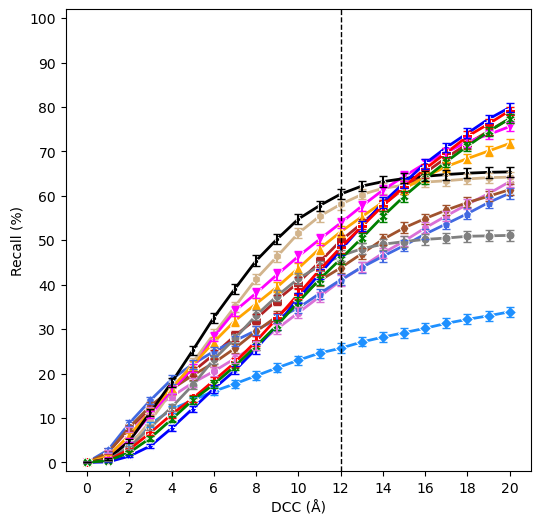

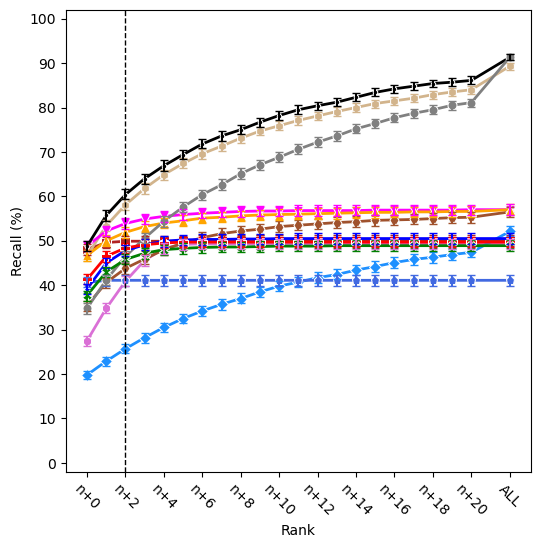

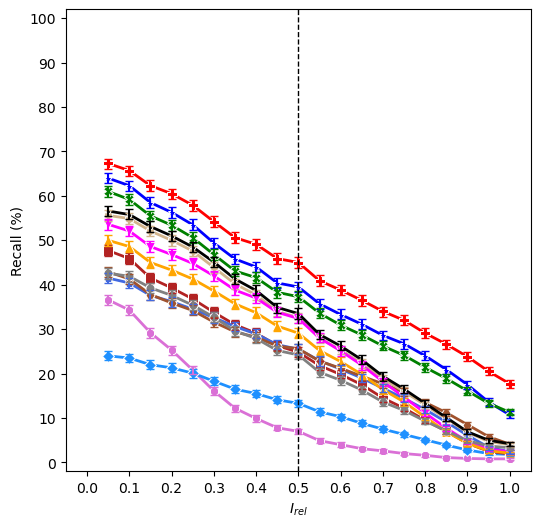

In [110]:
plot_results_def_NEW_2cols(
    df = results_best_dist_FULL_COMB.query('dist_t not in @dts'), methods = new_OG_mets,
    fix_col1 = "irel_t", fix_col2 = "rank_t", fix_val1 = 1.05, fix_val2 = 2,
    var_col = "dist_t",var_col_label = "DCC (Å)",
    legend_order = new_OG_mets, ylabel="Recall (%)", xline=12, xticks=np.arange(0, 21, 2), xlim=None,
    FSIZE=(6, 6), DPI=100, MS = 6.5, LW = 2, error = True,
    yticks = np.arange(0, 110, 10), ylim = (-2, 102),
    #out = "./figs/LIGYSIS_full_recall_vs_dist_OG_METHODS.png"
)

plot_results_def_NEW_2cols(
    df = results_best_dist_FULL_COMB.query('rank_t <2000'), methods = new_OG_mets,
    fix_col1 = "irel_t", fix_col2 = "dist_t", fix_val1 = 1.05, fix_val2 = 12,
    var_col = "rank_t",var_col_label = "Rank",
    legend_order = new_OG_mets, ylabel="Recall (%)", xline=2, xticks=np.arange(0, 21, 2), xlim=None,
    FSIZE=(6, 6), DPI=100, MS = 6.5, LW = 2, error = True,
    yticks = np.arange(0, 110, 10), ylim = (-2, 102),
    #out = "./figs/LIGYSIS_full_recall_vs_rank_OG_METHODS.png"
)

plot_results_def_NEW_2cols(
    df = results_best_dist_FULL_COMB.query('irel_t > 0.01 & irel_t < 1.05'), methods = new_OG_mets,
    fix_col1 = "dist_t", fix_col2 = "rank_t", fix_val1 = 0, fix_val2 = 2,
    var_col = "irel_t",var_col_label = r'$I_{rel}$',
    legend_order = new_OG_mets, ylabel="Recall (%)", xline=0.5, xticks=np.arange(0, 1.1, 0.1), xlim=(-0.05, 1.05),
    FSIZE=(6, 6), DPI=100, MS = 6.5, LW = 2, error = True,
    yticks = np.arange(0, 110, 10), ylim = (-2, 102),
    #out = "./figs/LIGYSIS_full_recall_vs_irel_OG_METHODS.png"
)

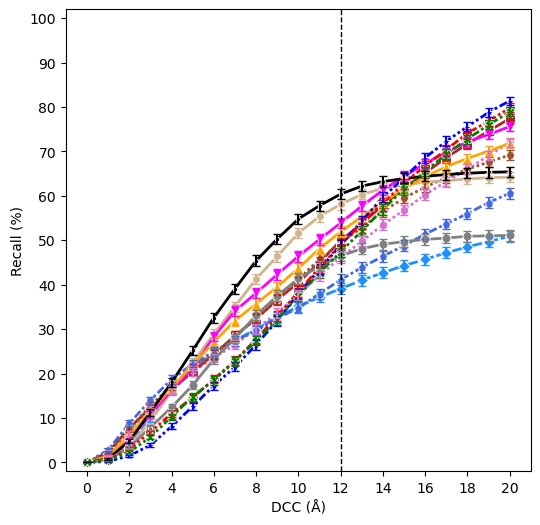

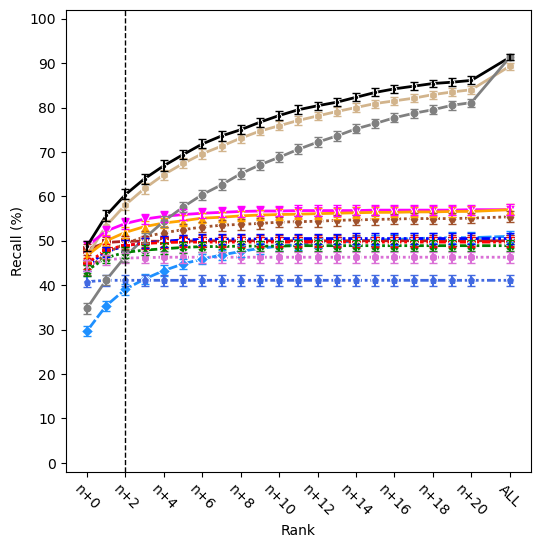

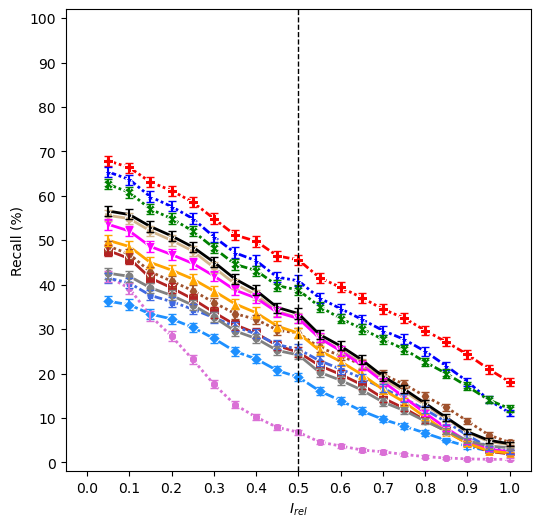

In [98]:
plot_results_def_NEW_2cols(
    df = results_best_dist_FULL_COMB.query('dist_t not in @dts'), methods = SELECTED_METHODS,
    fix_col1 = "irel_t", fix_col2 = "rank_t", fix_val1 = 1.05, fix_val2 = 2,
    var_col = "dist_t",var_col_label = "DCC (Å)",
    legend_order = SELECTED_METHODS, ylabel="Recall (%)", xline=12, xticks=np.arange(0, 21, 2), xlim=None,
    FSIZE=(6, 6), DPI=100, MS = 6.5, LW = 2, error = True,
    yticks = np.arange(0, 110, 10), ylim = (-2, 102),
    #out = "./figs/LIGYSIS_full_recall_vs_dist.png"
)

plot_results_def_NEW_2cols(
    df = results_best_dist_FULL_COMB.query('rank_t <2000'), methods = SELECTED_METHODS,
    fix_col1 = "irel_t", fix_col2 = "dist_t", fix_val1 = 1.05, fix_val2 = 12,
    var_col = "rank_t",var_col_label = "Rank",
    legend_order = SELECTED_METHODS, ylabel="Recall (%)", xline=2, xticks=np.arange(0, 21, 2), xlim=None,
    FSIZE=(6, 6), DPI=100, MS = 6.5, LW = 2, error = True,
    yticks = np.arange(0, 110, 10), ylim = (-2, 102),
    #out = "./figs/LIGYSIS_full_recall_vs_rank.png"
)

plot_results_def_NEW_2cols(
    df = results_best_dist_FULL_COMB.query('irel_t > 0.01 & irel_t < 1.05'), methods = SELECTED_METHODS,
    fix_col1 = "dist_t", fix_col2 = "rank_t", fix_val1 = 0, fix_val2 = 2,
    var_col = "irel_t",var_col_label = r'$I_{rel}$',
    legend_order = SELECTED_METHODS, ylabel="Recall (%)", xline=0.5, xticks=np.arange(0, 1.1, 0.1), xlim=(-0.05, 1.05),
    FSIZE=(6, 6), DPI=100, MS = 6.5, LW = 2, error = True,
    yticks = np.arange(0, 110, 10), ylim = (-2, 102),
    #out = "./figs/LIGYSIS_full_recall_vs_irel.png"
)

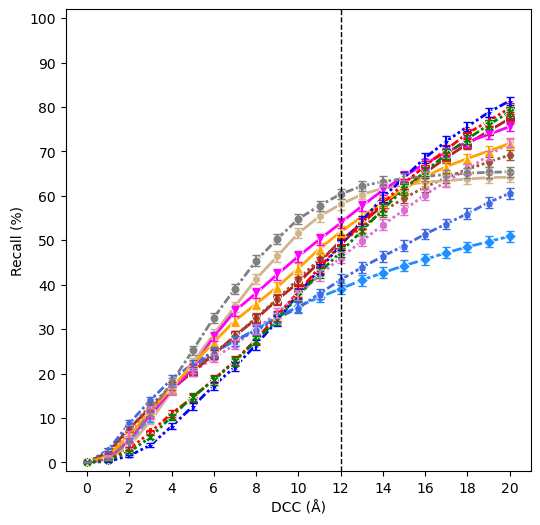

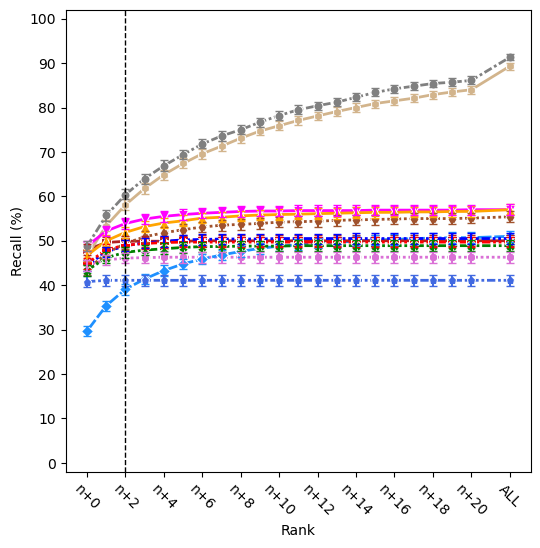

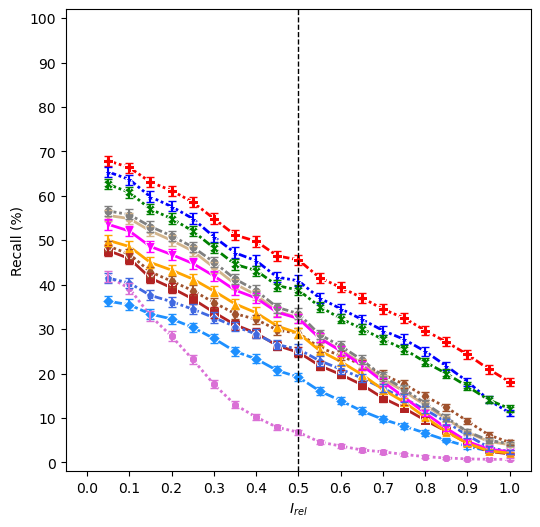

In [66]:
plot_results_def_NEW_2cols(
    df = results_best_dist_FULL_COMB.query('dist_t not in @dts'), methods = SELECTED_METHODS,
    fix_col1 = "irel_t", fix_col2 = "rank_t", fix_val1 = 1.05, fix_val2 = 2,
    var_col = "dist_t",var_col_label = "DCC (Å)",
    legend_order = SELECTED_METHODS, ylabel="Recall (%)", xline=12, xticks=np.arange(0, 21, 2), xlim=None,
    FSIZE=(6, 6), DPI=100, MS = 6.5, LW = 2, error = True,
    yticks = np.arange(0, 110, 10), ylim = (-2, 102),
    #out = "./figs/LIGYSIS_full_recall_vs_dist.png"
)

plot_results_def_NEW_2cols(
    df = results_best_dist_FULL_COMB.query('rank_t <2000'), methods = SELECTED_METHODS,
    fix_col1 = "irel_t", fix_col2 = "dist_t", fix_val1 = 1.05, fix_val2 = 12,
    var_col = "rank_t",var_col_label = "Rank",
    legend_order = SELECTED_METHODS, ylabel="Recall (%)", xline=2, xticks=np.arange(0, 21, 2), xlim=None,
    FSIZE=(6, 6), DPI=100, MS = 6.5, LW = 2, error = True,
    yticks = np.arange(0, 110, 10), ylim = (-2, 102),
    #out = "./figs/LIGYSIS_full_recall_vs_rank.png"
)

plot_results_def_NEW_2cols(
    df = results_best_dist_FULL_COMB.query('irel_t > 0.01 & irel_t < 1.05'), methods = SELECTED_METHODS,
    fix_col1 = "dist_t", fix_col2 = "rank_t", fix_val1 = 0, fix_val2 = 2,
    var_col = "irel_t",var_col_label = r'$I_{rel}$',
    legend_order = SELECTED_METHODS, ylabel="Recall (%)", xline=0.5, xticks=np.arange(0, 1.1, 0.1), xlim=(-0.05, 1.05),
    FSIZE=(6, 6), DPI=100, MS = 6.5, LW = 2, error = True,
    yticks = np.arange(0, 110, 10), ylim = (-2, 102),
    #out = "./figs/LIGYSIS_full_recall_vs_irel.png"
)

In [52]:
results_best_dist_FULL_COMB.query('rank_t == 0 & dist_t == 12 & irel_t == 1.05  & origin_pred in @SELECTED_METHODS').sort_values("success_rate", ascending = False)

origin_pred  rank_t  dist_t  irel_t  success_rate  \
158268              P2Rank+Cons       0    12.0    1.05         0.488   
367356            fpocket+PRANK       0    12.0    1.05         0.488   
42108                     GrASP       0    12.0    1.05         0.480   
146652                   P2Rank       0    12.0    1.05         0.467   
7260        DeepPocket-Rescored       0    12.0    1.05         0.466   
123420               Ligsite-AA       0    12.0    1.05         0.449   
251196          PocketFinder-AA       0    12.0    1.05         0.445   
344124               VN-EGNN-NR       0    12.0    1.05         0.445   
30492   DeepPocket-Segmented-NR       0    12.0    1.05         0.434   
309276               Surfnet-AA       0    12.0    1.05         0.433   
181500           PUResNet+PRANK       0    12.0    1.05         0.408   
355740                  fpocket       0    12.0    1.05         0.348   
76956   IF-SitePred-rescored-NR       0    12.0    1.05         0.297   

        correct_predictions  total  lower_se  upper_se  
158268                 3278   6721     0.476     0.500  
367356                 3283   6721     0.477     0.500  
42108                  3224   6721     0.468     0.492  
146652                 3141   6721     0.455     0.479  
7260                   3131   6721     0.454     0.478  
123420                 3017   6721     0.437     0.461  
251196                 2993   6721     0.433     0.457  
344124                 2990   6721     0.433     0.457  
30492                  2920   6721     0.423     0.446  
309276                 2912   6721     0.421     0.445  
181500                 2742   6721     0.396     0.420  
355740                 2338   6721     0.336     0.359  
76956                  1998   6721     0.286     0.308

In [53]:
results_best_dist_FULL_COMB.query('rank_t == 2 & dist_t == 12 & irel_t == 1.05  & origin_pred in @SELECTED_METHODS').sort_values("success_rate", ascending = False)

origin_pred  rank_t  dist_t  irel_t  success_rate  \
367400            fpocket+PRANK       2    12.0    1.05         0.604   
7304        DeepPocket-Rescored       2    12.0    1.05         0.581   
158312              P2Rank+Cons       2    12.0    1.05         0.539   
146696                   P2Rank       2    12.0    1.05         0.519   
42152                     GrASP       2    12.0    1.05         0.499   
30536   DeepPocket-Segmented-NR       2    12.0    1.05         0.494   
123464               Ligsite-AA       2    12.0    1.05         0.490   
251240          PocketFinder-AA       2    12.0    1.05         0.489   
309320               Surfnet-AA       2    12.0    1.05         0.474   
355784                  fpocket       2    12.0    1.05         0.465   
344168               VN-EGNN-NR       2    12.0    1.05         0.461   
181544           PUResNet+PRANK       2    12.0    1.05         0.411   
77000   IF-SitePred-rescored-NR       2    12.0    1.05         0.391   

        correct_predictions  total  lower_se  upper_se  
367400                 4061   6721     0.593     0.616  
7304                   3905   6721     0.569     0.593  
158312                 3622   6721     0.527     0.551  
146696                 3491   6721     0.507     0.531  
42152                  3352   6721     0.487     0.511  
30536                  3318   6721     0.482     0.506  
123464                 3295   6721     0.478     0.502  
251240                 3285   6721     0.477     0.501  
309320                 3183   6721     0.462     0.486  
355784                 3127   6721     0.453     0.477  
344168                 3098   6721     0.449     0.473  
181544                 2762   6721     0.399     0.423  
77000                  2629   6721     0.379     0.403

In [54]:
results_best_dist_FULL_COMB.query('rank_t == 1000 & dist_t == 12 & irel_t == 1.05  & origin_pred in @SELECTED_METHODS').sort_values("success_rate", ascending = False)

origin_pred  rank_t  dist_t  irel_t  success_rate  \
356202                  fpocket    1000    12.0    1.05         0.913   
367818            fpocket+PRANK    1000    12.0    1.05         0.913   
7722        DeepPocket-Rescored    1000    12.0    1.05         0.893   
147114                   P2Rank    1000    12.0    1.05         0.570   
158730              P2Rank+Cons    1000    12.0    1.05         0.570   
30954   DeepPocket-Segmented-NR    1000    12.0    1.05         0.554   
77418   IF-SitePred-rescored-NR    1000    12.0    1.05         0.510   
251658          PocketFinder-AA    1000    12.0    1.05         0.505   
42570                     GrASP    1000    12.0    1.05         0.500   
123882               Ligsite-AA    1000    12.0    1.05         0.497   
309738               Surfnet-AA    1000    12.0    1.05         0.489   
344586               VN-EGNN-NR    1000    12.0    1.05         0.463   
181962           PUResNet+PRANK    1000    12.0    1.05         0.411   

        correct_predictions  total  lower_se  upper_se  
356202                 6136   6721     0.906     0.920  
367818                 6136   6721     0.906     0.920  
7722                   6001   6721     0.885     0.900  
147114                 3831   6721     0.558     0.582  
158730                 3834   6721     0.559     0.582  
30954                  3726   6721     0.542     0.566  
77418                  3425   6721     0.498     0.522  
251658                 3394   6721     0.493     0.517  
42570                  3358   6721     0.488     0.512  
123882                 3342   6721     0.485     0.509  
309738                 3288   6721     0.477     0.501  
344586                 3113   6721     0.451     0.475  
181962                 2762   6721     0.399     0.423

## Other metrics

In [55]:
#ALL_comparisons_df["TRUE"] = ((ALL_comparisons_df['distance'] <= 12) | (ALL_comparisons_df['relative_intersection'] >= 0.5)).astype(int)
ALL_comparisons_df["TRUE"] = ((ALL_comparisons_df['distance'] <= 12)).astype(int)

TP_dict = ALL_comparisons_df.query('TRUE == 1').set_index(['origin_pred', 'rep_chain_ref', 'ID_pred'])["TRUE"].to_dict()

combined_rescored_DEF["TRUE"] = combined_rescored_DEF.apply(lambda row: TP_dict.get((row['origin'], row['rep_chain'], row['ID']), None), axis=1)
combined_rescored_DEF.TRUE.fillna(0, inplace = True)
combined_rescored_DEF.TRUE = combined_rescored_DEF.TRUE.astype(int)

In [79]:
combined_rescored_DEF_sorted.query('origin == "Surfnet"')

origin rep_chain  ID                     centre  n_aas    RoG  \
493284  Surfnet    1a52_A   1     (-2.263, 8.398, -9.67)     16   7.54   
493288  Surfnet    1a9w_E   1     (-4.491, 5.816, 2.607)     34  10.01   
493289  Surfnet    1aii_A   1   (-5.252, 10.943, -6.635)     26   8.76   
493293  Surfnet    1au1_A   1    (9.046, -18.964, 0.243)     20   7.95   
493296  Surfnet    1aue_B   1    (7.624, -12.939, 2.761)     17   7.33   
...         ...       ...  ..                        ...    ...    ...   
501030  Surfnet    7sud_A  36  (-13.554, 59.974, -1.863)     26   8.72   
501031  Surfnet    7sud_A  37  (-10.199, 67.192, 20.871)     23   8.77   
501032  Surfnet    7sud_A  38    (-4.115, 65.135, -5.79)     21   8.81   
501033  Surfnet    7sud_A  39    (3.989, 70.568, 18.988)     27   8.90   
501034  Surfnet    7sud_A  40  (-1.663, 69.872, -22.657)     18   8.03   

           SASA     VOL                                             up_aas  \
493284   675.43   531.0  [385, 451, 452, 455, 456, 459, 479, 507, 508, ...   
493288  1429.12  1081.0  [29, 32, 33, 39, 40, 41, 42, 43, 46, 64, 65, 6...   
493289   827.33  1677.0  [69, 73, 78, 79, 81, 82, 83, 84, 85, 86, 87, 8...   
493293  1225.97   491.0  [68, 70, 71, 72, 74, 75, 76, 78, 79, 127, 130,...   
493296  1187.98   385.0  [2022, 2023, 2024, 2025, 2026, 2028, 2029, 206...   
...         ...     ...                                                ...   
501030   864.65  2130.0  [3466, 3467, 3468, 3469, 3470, 3471, 3473, 347...   
501031  1479.82  1549.0  [3590, 3591, 3592, 3593, 3594, 3595, 3596, 359...   
501032  1161.07  2269.0  [3424, 3425, 3426, 3427, 3428, 3429, 3467, 347...   
501033  1515.47  1437.0  [3856, 3951, 3952, 3953, 3954, 3955, 4027, 402...   
501034   812.80  1446.0  [3342, 3371, 3374, 3375, 3376, 3377, 3378, 337...   

                                                      aas RANK     SCORE  \
493284  [89, 155, 156, 159, 160, 163, 183, 211, 212, 2...    1  1.000000   
493288  [28, 31, 32, 38, 39, 40, 41, 42, 45, 63, 64, 6...    1  1.000000   
493289  [69, 73, 78, 79, 81, 82, 83, 84, 85, 86, 87, 8...    1  1.000000   
493293  [47, 49, 50, 51, 53, 54, 55, 57, 58, 106, 109,...    1  1.000000   
493296  [8, 9, 10, 11, 12, 14, 15, 52, 55, 56, 60, 94,...    1  1.000000   
...                                                   ...  ...       ...   
501030  [3466, 3467, 3468, 3469, 3470, 3471, 3473, 347...   36  0.027778   
501031  [3590, 3591, 3592, 3593, 3594, 3595, 3596, 359...   37  0.027027   
501032  [3424, 3425, 3426, 3427, 3428, 3429, 3467, 347...   38  0.026316   
501033  [3856, 3951, 3952, 3953, 3954, 3955, 4027, 402...   39  0.025641   
501034  [3342, 3371, 3374, 3375, 3376, 3377, 3378, 337...   40  0.025000   

        n_points  TRUE  
493284       NaN     0  
493288       NaN     1  
493289       NaN     0  
493293       NaN     0  
493296       NaN     1  
...          ...   ...  
501030       NaN     0  
501031       NaN     0  
501032       NaN     0  
501033       NaN     0  
501034       NaN     0  

[9043 rows x 14 columns]

In [56]:
combined_rescored_DEF.TRUE.value_counts()

0    352844
1    185655
Name: TRUE, dtype: int64

In [57]:
# Apply shuffling only to specified origin

combined_rescored_DEF_sorted = combined_rescored_DEF.sort_values(by=['origin', 'SCORE'], ascending=[True, False])

origins_to_shuffle = ['PUResNet', 'PocketFinder', 'Ligsite', 'Surfnet']

# Filter the DataFrame to get the subset where 'origin' is one of the specified values
subset_to_shuffle = combined_rescored_DEF_sorted[combined_rescored_DEF_sorted['origin'].isin(origins_to_shuffle)]

# Set a seed for reproducibility
seed = 12345

# Shuffle within each 'origin' and 'SCORE' group with a set seed
shuffled_subset = subset_to_shuffle.groupby(['origin', 'SCORE']).apply(lambda x: x.sample(frac=1, random_state=seed)).reset_index(drop=True)

# Get the rest of the DataFrame that does not need shuffling
rest_of_df = combined_rescored_DEF_sorted[~combined_rescored_DEF_sorted['origin'].isin(origins_to_shuffle)]

# Concatenate the shuffled subset back with the rest of the DataFrame
final_df = pd.concat([shuffled_subset, rest_of_df]).sort_values(by=['origin', 'SCORE'], ascending=[True, False]).reset_index(drop = True)

In [58]:
# Calculate cumulative sums of TP and FP for each method
final_df['cumsum_TP'] = final_df.groupby('origin')['TRUE'].cumsum()
final_df['cumsum_FP'] = final_df.groupby('origin')['TRUE'].apply(lambda x: (x == 0).cumsum())
final_df['total'] = final_df['cumsum_TP'] + final_df['cumsum_FP']
final_df['precision'] = round(100*final_df['cumsum_TP'] / final_df['total'], 2)

In [59]:
final_df = add_precision_ci(final_df)

## VN-EGNN variants

In [62]:
submets = ["VN-EGNN", "VN-EGNN-NR"]
final_df.query('origin in @submets & cumsum_FP == 100').sort_values('cumsum_TP', ascending = False).drop_duplicates("origin", keep = "first")

origin rep_chain  ID                   centre  n_aas   RoG  \
348224     VN-EGNN    7zrr_A   3   (4.798, -5.883, 5.278)     11  5.76   
361533  VN-EGNN-NR    6v6f_A   3  (-3.528, 10.864, 0.992)      9  4.77   

          SASA    VOL                                             up_aas  \
348224  277.83  386.0  [371, 372, 373, 375, 376, 394, 395, 396, 397, ...   
361533  168.85    0.0           [19, 20, 21, 22, 33, 100, 101, 102, 103]   

                                                      aas  ... n_points  TRUE  \
348224  [224, 225, 226, 228, 229, 247, 248, 249, 250, ...  ...      NaN     1   
361533                  [7, 8, 9, 10, 21, 88, 89, 90, 91]  ...      NaN     0   

        cumsum_TP  cumsum_FP  total  precision  lower_ci  upper_ci  \
348224       1301        100   1401      92.86  0.913937  0.940964   
361533       1028        100   1128      91.13  0.893333  0.926569   

        lower_precision  upper_precision  
348224        91.393666        94.096408  
361533        89.333333        92.656949  

[2 rows x 22 columns]

In [747]:
1028-1301

-273

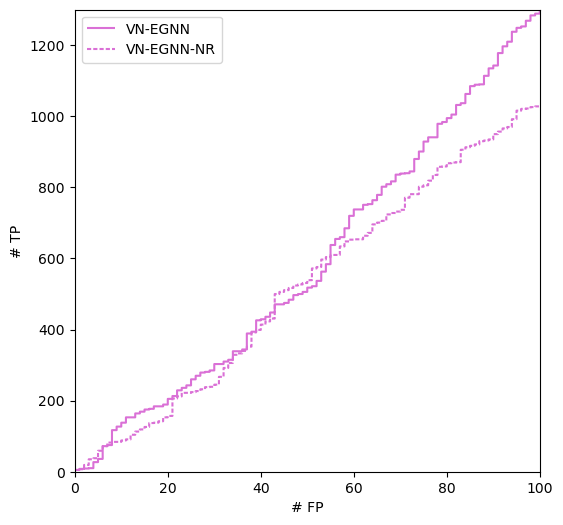

In [67]:
plot_cumulative_data(
    final_df, figsize=(6, 6), dpi=100, xlim=(0, 100), ylim=(0, 1300),
    methods = ["VN-EGNN", "VN-EGNN-NR"],
    #out = "./figs/VNEGNN_cumulative_data_FULL_LEG.png"
)

## IF-SitePred variants

In [107]:
submets = ["IF-SitePred", "IF-SitePred-NR", "IF-SitePred-rescored-NR"]
final_df.query('origin in @submets & cumsum_FP == 100').sort_values('cumsum_TP', ascending = False).drop_duplicates("origin", keep = "first")

origin rep_chain  ID                    centre  \
168210  IF-SitePred-rescored-NR    4j14_A   2  (-1.704, -11.143, 6.535)   
100261              IF-SitePred    3uh4_B   1    (5.648, -0.264, 1.908)   
145207           IF-SitePred-NR    3uh4_B   1    (5.648, -0.264, 1.908)   

        n_aas   RoG    SASA     VOL  \
168210     17  8.39  715.90  1302.0   
100261     18  7.19  346.99   408.0   
145207     18  7.19  346.99   408.0   

                                                   up_aas  \
168210  [105, 108, 109, 110, 111, 112, 222, 223, 225, ...   
100261  [1183, 1184, 1185, 1186, 1203, 1211, 1212, 121...   
145207  [1183, 1184, 1185, 1186, 1203, 1211, 1212, 121...   

                                                      aas RANK    SCORE  \
168210  [174, 175, 177, 178, 179, 320, 323, 424, 425, ...    4  11.9565   
100261  [100, 108, 109, 110, 111, 112, 117, 118, 119, ...    1  44.0000   
145207  [100, 108, 109, 110, 111, 112, 117, 118, 119, ...    1  44.0000   

        n_points  TRUE  cumsum_TP  cumsum_FP  total  precision  
168210      55.0     1       1246        100   1346      92.57  
100261      44.0     1        961        100   1061      90.57  
145207      44.0     1        959        100   1059      90.56

In [745]:
1246 - 961

285

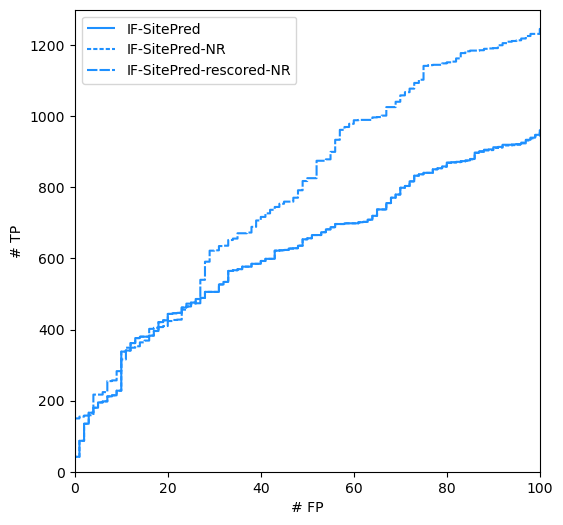

In [68]:
plot_cumulative_data(
    final_df, figsize=(6, 6), dpi=100, xlim=(0, 100), ylim=(0, 1300),
    methods = ["IF-SitePred", "IF-SitePred-NR", "IF-SitePred-rescored-NR"],
    #out = "./figs/IFSP_cumulative_data_FULL_LEG.png"
)

## DeepPocket-SEG variants

In [109]:
submets = ["DeepPocket-Segmented", "DeepPocket-Segmented-NR"]
final_df.query('origin in @submets & cumsum_FP == 100').sort_values('cumsum_TP', ascending = False).drop_duplicates("origin", keep = "first")

origin rep_chain  ID                    centre  n_aas  \
58584     DeepPocket-Segmented    2v40_A   1   (-0.566, 2.363, -4.339)     25   
80275  DeepPocket-Segmented-NR    5c41_B   9  (-7.687, -1.275, -1.163)     50   

         RoG     SASA     VOL  \
58584   9.22  1004.93  1823.0   
80275  11.03  1809.51  3700.0   

                                                  up_aas  \
58584  [38, 39, 40, 41, 42, 43, 44, 45, 59, 63, 65, 6...   
80275  [25, 27, 52, 53, 54, 57, 58, 109, 111, 118, 11...   

                                                     aas RANK     SCORE  \
58584  [41, 42, 43, 44, 45, 46, 47, 48, 62, 66, 68, 6...    1  0.972147   
80275  [25, 27, 52, 53, 54, 57, 58, 109, 111, 118, 11...    1  0.971728   

       n_points  TRUE  cumsum_TP  cumsum_FP  total  precision  
58584       NaN     1        670        100    770      87.01  
80275       NaN     1        643        100    743      86.54

In [101]:
643-670

-27

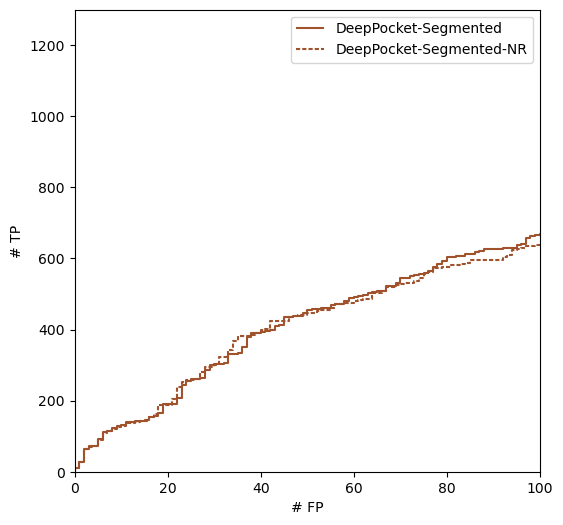

In [70]:
plot_cumulative_data(
    final_df, figsize=(6, 6), dpi=100, xlim=(0, 100), ylim=(0, 1300),
    methods = ["DeepPocket-Segmented", "DeepPocket-Segmented-NR"],
    #out = "./figs/DEEPPOCKET_cumulative_data_FULL_LEG.png"
)

## PUResNet variants

In [70]:
submets = ["PUResNet", "PUResNet-AA", "PUResNet+PRANK", "PUResNet+PRANK+Cons"]
final_df.query('origin in @submets & cumsum_FP == 100').sort_values('cumsum_TP', ascending = False).drop_duplicates("origin", keep = "first")

origin rep_chain  ID                    centre  n_aas  \
255619          PUResNet-AA    5c8w_C   1     (5.433, -6.723, 2.28)     17   
250374       PUResNet+PRANK    8jbn_B   1  (-6.039, -2.832, -7.737)     16   
252847  PUResNet+PRANK+Cons    5xwm_A   2   (2.142, -14.467, 7.224)     14   
247193             PUResNet    2pru_B   1    (-5.824, 7.211, -2.65)      4   

         RoG    SASA     VOL  \
255619  7.74  580.85   462.0   
250374  6.99  519.74   240.0   
252847  8.28  636.94  1108.0   
247193  3.98  307.45   148.0   

                                                   up_aas  \
255619  [196, 215, 217, 222, 223, 225, 230, 231, 232, ...   
250374  [1733, 1735, 1736, 1811, 1870, 1871, 1904, 190...   
252847  [248, 249, 253, 254, 257, 263, 265, 267, 304, ...   
247193                                   [11, 12, 15, 71]   

                                                      aas RANK    SCORE  \
255619  [62, 81, 83, 88, 89, 91, 96, 97, 98, 99, 100, ...    1  17.0000   
250374  [57, 59, 60, 135, 194, 195, 228, 229, 230, 231...    1  13.5616   
252847  [225, 226, 230, 231, 234, 240, 242, 244, 281, ...    1  22.0042   
247193                                   [10, 11, 14, 70]    1   1.0000   

        n_points  TRUE  cumsum_TP  cumsum_FP  total  precision  
255619       NaN     1       1097        100   1197      91.65  
250374       NaN     1       1094        100   1194      91.62  
252847       NaN     1        946        100   1046      90.44  
247193       NaN     1        534        100    634      84.23

In [100]:
1097-534

563

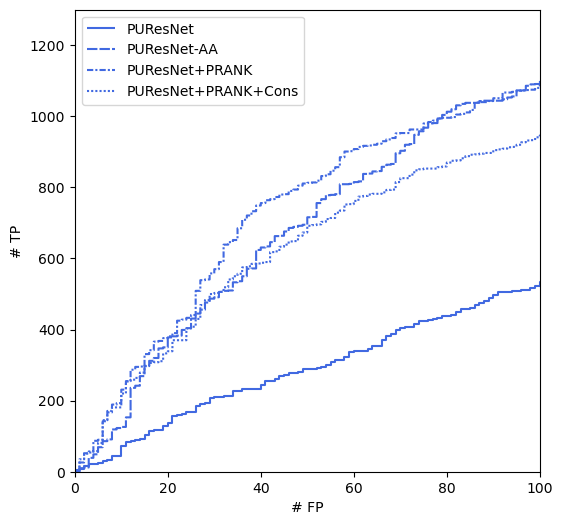

In [72]:
plot_cumulative_data(
    final_df, figsize=(6, 6), dpi=100, xlim=(0, 100), ylim=(0, 1300),
    methods = ["PUResNet", "PUResNet-AA", "PUResNet+PRANK", "PUResNet+PRANK+Cons"],
    #out = "./figs/PURESNET_cumulative_data_FULL_LEG.png"
)

## fpocket variants

In [72]:
submets = ["fpocket", "fpocket+PRANK", "fpocket+PRANK+Cons"]
final_df.query('origin in @submets & cumsum_FP == 100').sort_values('cumsum_TP', ascending = False).drop_duplicates("origin", keep = "first")

origin rep_chain  ID                   centre  n_aas  \
423406       fpocket+PRANK    5g55_A   1   (0.267, 11.851, 6.387)     36   
481172  fpocket+PRANK+Cons    4q4d_A   4  (3.445, -11.646, 1.471)     22   
365115             fpocket    3cfw_A   1    (4.611, 19.632, 2.44)     12   

          RoG     SASA     VOL  \
423406  11.83  1137.98  2519.0   
481172   8.93   771.07   697.0   
365115   7.63   846.04   455.0   

                                                   up_aas  \
423406  [201, 203, 205, 208, 210, 211, 291, 294, 295, ...   
481172  [134, 185, 187, 194, 196, 198, 211, 212, 213, ...   
365115  [118, 120, 122, 123, 125, 126, 132, 143, 145, ...   

                                                      aas RANK    SCORE  \
423406  [59, 61, 63, 66, 68, 69, 149, 152, 153, 156, 1...    1  30.1560   
481172  [98, 149, 151, 158, 160, 162, 175, 176, 177, 2...    1  55.2018   
365115  [80, 82, 84, 85, 87, 88, 94, 105, 107, 108, 11...    1   0.4560   

        n_points  TRUE  cumsum_TP  cumsum_FP  total  precision  
423406       NaN     0        526        100    626      84.03  
481172       NaN     1        433        100    533      81.24  
365115       NaN     1         94        100    194      48.45

In [99]:
526-94

432

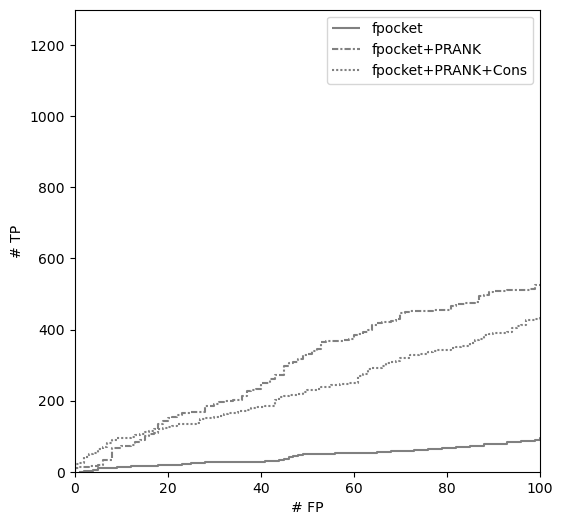

In [73]:
plot_cumulative_data(final_df, figsize=(6, 6), dpi=100, xlim=(0, 100), ylim=(0, 1300),
                     methods = ["fpocket", "fpocket+PRANK", "fpocket+PRANK+Cons"],
                     #out = "./figs/fpocket_cumulative_data_FULL_LEG.png"
                    )

## PocketFinder variants

In [74]:
submets = ["PocketFinder", "PocketFinder-AA", "PocketFinder-SS", "PocketFinder+PRANK", "PocketFinder+PRANK+Cons"]
final_df.query('origin in @submets & cumsum_FP == 100').sort_values('cumsum_TP', ascending = False).drop_duplicates("origin", keep = "first")

origin rep_chain  ID                    centre  \
284060          PocketFinder-AA    6d6q_K   1    (-2.045, 4.013, 0.191)   
292958          PocketFinder-SS    6eja_A   3   (-3.748, 3.428, -0.246)   
275097  PocketFinder+PRANK+Cons    4re1_A   2  (-1.495, -4.912, -8.655)   
266176       PocketFinder+PRANK    6ob7_A   1   (0.842, 10.322, -1.583)   
257207             PocketFinder    7lel_C   1    (0.893, 12.131, 6.127)   

        n_aas    RoG     SASA      VOL  \
284060     61  13.62  3146.24  10364.0   
292958     62  13.07  2110.32   9901.0   
275097     46  10.36  1358.24    462.0   
266176     72  12.94  2541.47   4962.0   
257207     24   8.87  1154.24    710.0   

                                                   up_aas  \
284060  [252, 255, 288, 289, 352, 353, 354, 356, 376, ...   
292958  [333, 334, 335, 336, 337, 338, 341, 359, 361, ...   
275097  [221, 222, 223, 224, 239, 240, 290, 292, 293, ...   
266176  [25, 26, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...   
257207  [289, 293, 294, 295, 296, 297, 298, 299, 300, ...   

                                                      aas RANK     SCORE  \
284060  [254, 257, 290, 291, 354, 355, 356, 358, 378, ...    1   61.0000   
292958  [125, 126, 127, 128, 129, 130, 133, 151, 153, ...    1  503.2056   
275097  [15, 16, 17, 18, 33, 34, 84, 86, 87, 88, 100, ...    1  109.3960   
266176  [26, 27, 30, 31, 32, 33, 34, 35, 36, 37, 38, 3...    1   64.1547   
257207  [28, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 4...    1    1.0000   

        n_points  TRUE  cumsum_TP  cumsum_FP  total  precision  
284060       NaN     0        178        100    278      64.03  
292958       NaN     1        163        100    263      61.98  
275097       NaN     1        128        100    228      56.14  
266176       NaN     1        120        100    220      54.55  
257207       NaN     1         64        100    164      39.02

In [98]:
178 - 64

114

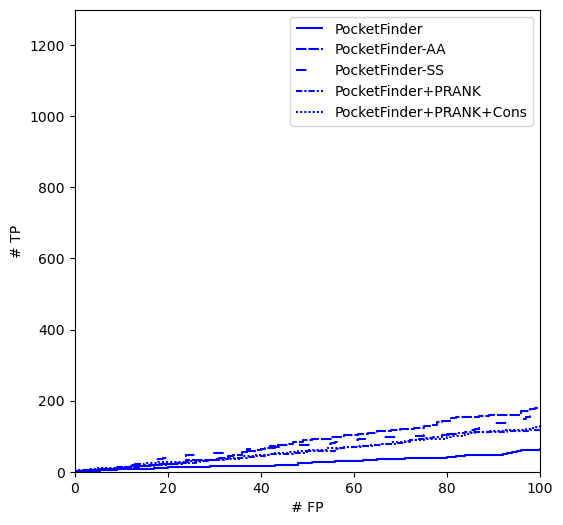

In [74]:
plot_cumulative_data(
    final_df, figsize=(6, 6), dpi=100, xlim=(0, 100), ylim=(0, 1300),
    methods = ["PocketFinder", "PocketFinder-AA", "PocketFinder-SS", "PocketFinder+PRANK", "PocketFinder+PRANK+Cons"],
    #out = "./figs/POCKETFINDER_cumulative_data_FULL_LEG.png"
)

## Ligsite variants

In [76]:
submets = ["Ligsite", "Ligsite-AA", "Ligsite-SS", "Ligsite+PRANK", "Ligsite+PRANK+Cons"]
final_df.query('origin in @submets & cumsum_FP == 100').sort_values('cumsum_TP', ascending = False).drop_duplicates("origin", keep = "first")

origin rep_chain  ID                    centre  n_aas  \
203529  Ligsite+PRANK+Cons    8eg3_A   2  (4.797, -11.165, 14.322)     23   
196619       Ligsite+PRANK    4fqf_A   1  (-8.145, -23.656, 4.691)     34   
210420          Ligsite-AA    1cb6_A   1     (8.605, 6.251, 1.745)     81   
189667             Ligsite    1tvx_D   1   (5.146, -3.884, -4.596)     20   
217236          Ligsite-SS    4bur_B   1   (1.797, -0.766, -2.781)    100   

          RoG     SASA      VOL  \
203529   7.89   993.47    425.0   
196619   8.91  1640.38   1407.0   
210420  12.21  2652.39   4749.0   
189667   7.27  1086.72    196.0   
217236  14.09  3292.10  10401.0   

                                                   up_aas  \
203529  [167, 168, 169, 171, 173, 174, 175, 176, 290, ...   
196619  [87, 89, 92, 93, 94, 95, 96, 97, 98, 99, 101, ...   
210420  [110, 112, 124, 125, 126, 127, 146, 147, 149, ...   
189667  [63, 64, 65, 66, 67, 68, 69, 89, 90, 91, 92, 9...   
217236  [137, 138, 139, 140, 141, 142, 143, 162, 163, ...   

                                                      aas RANK       SCORE  \
203529  [167, 168, 169, 171, 173, 174, 175, 176, 290, ...    1    116.0458   
196619  [70, 72, 75, 76, 77, 78, 79, 80, 81, 82, 84, 1...    1     67.5287   
210420  [91, 93, 105, 106, 107, 108, 127, 128, 130, 13...    1     81.0000   
189667  [10, 11, 12, 13, 14, 15, 16, 36, 37, 38, 39, 4...    1      1.0000   
217236  [35, 36, 37, 38, 39, 40, 41, 60, 61, 62, 63, 6...    1  35752.7622   

        n_points  TRUE  cumsum_TP  cumsum_FP  total  precision  
203529       NaN     0        171        100    271      63.10  
196619       NaN     0        164        100    264      62.12  
210420       NaN     0        159        100    259      61.39  
189667       NaN     0        115        100    215      53.49  
217236       NaN     1         72        100    172      41.86

In [97]:
159 - 115

44

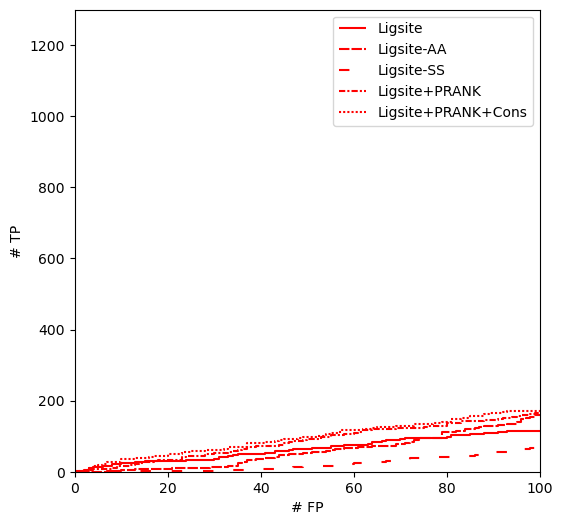

In [75]:
plot_cumulative_data(
    final_df, figsize=(6, 6), dpi=100, xlim=(0, 100), ylim=(0, 1300),
    methods = ["Ligsite", "Ligsite-AA", "Ligsite-SS", "Ligsite+PRANK", "Ligsite+PRANK+Cons"],
    #out = "./figs/LIGSITE_cumulative_data_FULL_LEG.png"
)

## Surfnet variants

In [78]:
submets = ["Surfnet", "Surfnet-AA", "Surfnet-SS", "Surfnet+PRANK", "Surfnet+PRANK+Cons"]
final_df.query('origin in @submets & cumsum_FP == 100').sort_values('cumsum_TP', ascending = False).drop_duplicates("origin", keep = "first")

origin rep_chain  ID                    centre  n_aas  \
329145          Surfnet-AA    6unp_A   1    (3.878, -5.582, 7.824)     52   
338013          Surfnet-SS    1k6m_B   2  (0.068, -22.149, -5.687)     56   
310872       Surfnet+PRANK    3bfx_A   1   (-2.622, -0.874, 9.385)     54   
319901  Surfnet+PRANK+Cons    1k6m_B   1     (9.723, 3.02, -0.673)     24   
301769             Surfnet    3o4r_B   1    (1.076, -7.905, 3.943)     61   

          RoG     SASA     VOL  \
329145  11.71  1973.24  2405.0   
338013  11.31  2264.91  2416.0   
310872  13.11  2590.78  3411.0   
319901   8.00  1050.28  1110.0   
301769  11.90  2125.57  3688.0   

                                                   up_aas  \
329145  [208, 209, 210, 211, 212, 213, 214, 215, 216, ...   
338013  [47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 60, 7...   
310872  [12, 22, 23, 24, 25, 27, 46, 47, 48, 49, 50, 5...   
319901  [63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 3...   
301769  [38, 39, 40, 41, 42, 43, 44, 45, 46, 62, 63, 6...   

                                                      aas RANK         SCORE  \
329145  [42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 5...    1  5.200000e+01   
338013  [8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 37...    1  1.808926e+07   
310872  [12, 22, 23, 24, 25, 27, 46, 47, 48, 49, 50, 5...    1  5.801450e+01   
319901  [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 3...    1  9.939730e+01   
301769  [21, 22, 23, 24, 25, 26, 27, 28, 29, 45, 46, 4...    1  1.000000e+00   

        n_points  TRUE  cumsum_TP  cumsum_FP  total  precision  
329145       NaN     1        308        100    408      75.49  
338013       NaN     1        133        100    233      57.08  
310872       NaN     1        121        100    221      54.75  
319901       NaN     0        107        100    207      51.69  
301769       NaN     1         61        100    161      37.89

In [102]:
308 - 61

247

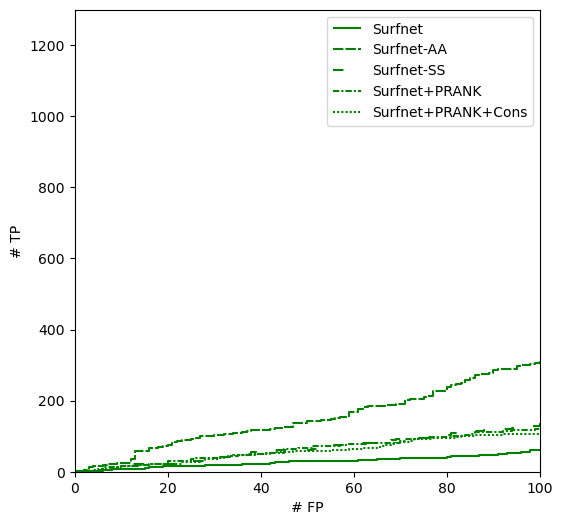

In [76]:
plot_cumulative_data(
    final_df, figsize=(6, 6), dpi=100, xlim=(0, 100), ylim=(0, 1300),
    methods = ["Surfnet", "Surfnet-AA", "Surfnet-SS", "Surfnet+PRANK", "Surfnet+PRANK+Cons"],
    #out = "./figs/SURFNET_cumulative_data_FULL_LEG.png"
)

## Best methods

In [157]:
932-586

346

In [76]:
final_df.query('origin in @OG_mets & cumsum_FP == 100').sort_values(by = "cumsum_TP", ascending = False).drop_duplicates("origin", keep = "first")[["origin", "cumsum_TP", "cumsum_FP", "total"]]

origin  cumsum_TP  cumsum_FP  total
348224               VN-EGNN       1301        100   1401
95623                  GrASP       1017        100   1117
100261           IF-SitePred        961        100   1061
237411           P2Rank+Cons        932        100   1032
58584   DeepPocket-Segmented        670        100    770
736      DeepPocket-Rescored        637        100    737
224653                P2Rank        586        100    686
247193              PUResNet        534        100    634
189667               Ligsite        115        100    215
365115               fpocket         94        100    194
257207          PocketFinder         64        100    164
301769               Surfnet         61        100    161

In [38]:
final_df.query('origin in @OG_mets & total == 1000').sort_values(by = "cumsum_TP", ascending = False).drop_duplicates("origin", keep = "last")[["origin", "precision", "cumsum_TP", "cumsum_FP", "total"]]

origin  precision  cumsum_TP  cumsum_FP  total
95506                  GrASP       92.5        925         75   1000
347823               VN-EGNN       92.5        925         75   1000
100200           IF-SitePred       91.0        910         90   1000
237379           P2Rank+Cons       90.7        907         93   1000
58814   DeepPocket-Segmented       82.6        826        174   1000
999      DeepPocket-Rescored       81.7        817        183   1000
247559              PUResNet       81.6        816        184   1000
224967                P2Rank       79.2        792        208   1000
190452               Ligsite       52.3        523        477   1000
365921               fpocket       47.3        473        527   1000
258043          PocketFinder       42.0        420        580   1000
302608               Surfnet       39.5        395        605   1000

## Original methods

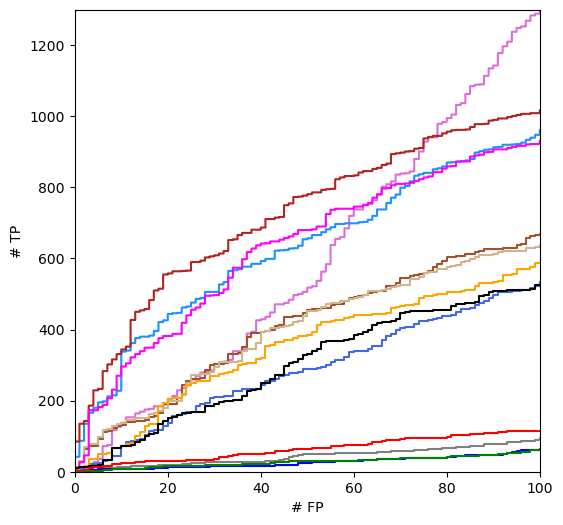

In [93]:
plot_cumulative_data(
    final_df, figsize=(6, 6), dpi=100, xlim=(0, 100), ylim=(0, 1300),
    methods = new_OG_mets, 
    #out = "./figs/FULL_TP_vs_FP_OG_METHODS.png"
)

## Better variants

In [75]:
import importlib
import benchmark_lib
importlib.reload(benchmark_lib)
from benchmark_lib import *

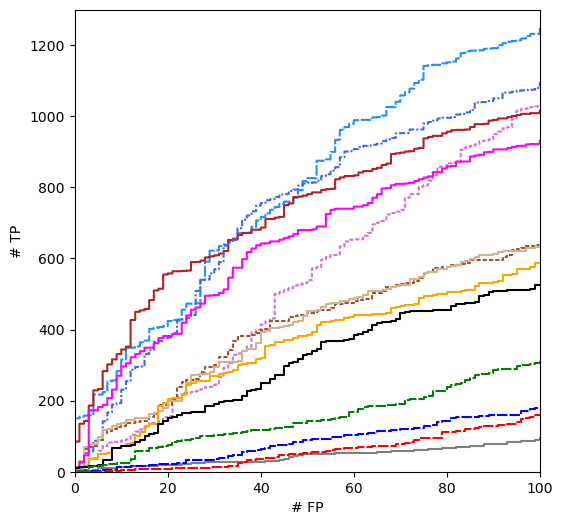

In [78]:
plot_cumulative_data(
    final_df, figsize=(6, 6), dpi=100, xlim=(0, 100), ylim=(0, 1300),
    methods = [
        "VN-EGNN-NR", "IF-SitePred-rescored-NR", "GrASP", "PUResNet+PRANK", 
        "DeepPocket-Segmented-NR", "DeepPocket-Rescored", "P2Rank+Cons",
        "P2Rank", "fpocket+PRANK", "fpocket",
        "PocketFinder-AA", "Ligsite-AA", "Surfnet-AA"
    ], #out = "./figs/FULL_TP_vs_FP.png"
)

# Precision Analysis

In [94]:
final_df.query(
    'origin in @OG_mets & cumsum_FP == 100'
)[["origin", "total", "cumsum_TP", "precision", "lower_precision", "upper_precision"]].sort_values(
    "cumsum_TP", ascending = False
).drop_duplicates(["origin"])


origin  total  cumsum_TP  precision  lower_precision  \
348224               VN-EGNN   1401       1301      92.86        91.393666   
95623                  GrASP   1117       1017      91.05        89.229445   
100261           IF-SitePred   1061        961      90.57        88.667561   
237411           P2Rank+Cons   1032        932      90.31        88.352913   
58584   DeepPocket-Segmented    770        670      87.01        84.453658   
736      DeepPocket-Rescored    737        637      86.43        83.769378   
224653                P2Rank    686        586      85.42        82.584821   
247193              PUResNet    634        534      84.23        81.184882   
189667               Ligsite    215        115      53.49        46.818494   
365115               fpocket    194         94      48.45        41.519684   
257207          PocketFinder    164         64      39.02        31.891519   
301769               Surfnet    161         61      37.89        30.759583   

        upper_precision  
348224        94.096408  
95623         92.584088  
100261        92.189546  
237411        91.968259  
58584         89.204840  
736           88.715767  
224653        87.866149  
247193        86.857105  
189667        60.035783  
365115        55.447585  
257207        46.659668  
301769        45.581320

In [60]:
final_df.query(
    'origin in @SELECTED_METHODS & cumsum_FP == 100'
)[["origin", "total", "cumsum_TP", "precision", "lower_precision", "upper_precision"]].sort_values(
    "cumsum_TP", ascending = False
).drop_duplicates(["origin"])


origin  total  cumsum_TP  precision  lower_precision  \
168210  IF-SitePred-rescored-NR   1346       1246      92.57        91.045184   
250374           PUResNet+PRANK   1194       1094      91.62        89.916885   
361533               VN-EGNN-NR   1128       1028      91.13        89.333333   
95623                     GrASP   1117       1017      91.05        89.229445   
237411              P2Rank+Cons   1032        932      90.31        88.352913   
80275   DeepPocket-Segmented-NR    743        643      86.54        83.898234   
736         DeepPocket-Rescored    737        637      86.43        83.769378   
224653                   P2Rank    686        586      85.42        82.584821   
423406            fpocket+PRANK    626        526      84.03        80.949300   
329145               Surfnet-AA    408        308      75.49        71.091334   
284060          PocketFinder-AA    278        178      64.03        58.231431   
210420               Ligsite-AA    259        159      61.39        55.335417   
365115                  fpocket    194         94      48.45        41.519684   

        upper_precision  
168210        93.853675  
250374        93.065716  
361533        92.656949  
95623         92.584088  
237411        91.968259  
80275         88.807960  
736           88.715767  
224653        87.866149  
423406        86.686769  
329145        79.413538  
284060        69.443703  
210420        67.111574  
365115        55.447585

In [61]:
final_df.query(
    'origin in @SELECTED_METHODS & total == 1000'
)[["origin", "total", "cumsum_TP", "precision", "lower_precision", "upper_precision"]].sort_values(
    "precision", ascending = False
)

origin  total  cumsum_TP  precision  lower_precision  \
167864  IF-SitePred-rescored-NR   1000        943       94.3        92.686293   
250180           PUResNet+PRANK   1000        933       93.3        91.578795   
95506                     GrASP   1000        925       92.5        90.699906   
361405               VN-EGNN-NR   1000        915       91.5        89.608711   
237379              P2Rank+Cons   1000        907       90.7        88.740874   
999         DeepPocket-Rescored   1000        817       81.7        79.183668   
423780            fpocket+PRANK   1000        817       81.7        79.183668   
80532   DeepPocket-Segmented-NR   1000        816       81.6        79.079018   
224967                   P2Rank   1000        792       79.2        76.574987   
211161               Ligsite-AA   1000        688       68.8        65.861082   
329737               Surfnet-AA   1000        686       68.6        65.656879   
284782          PocketFinder-AA   1000        653       65.3        62.296197   
365921                  fpocket   1000        473       47.3        44.221788   

        upper_precision  
167864        95.574656  
250180        94.689808  
95506         93.974820  
361405        93.073668  
237379        92.347627  
999           83.973716  
423780        83.973716  
80532         83.879131  
224967        81.601530  
211161        71.595031  
329737        71.400765  
284782        68.186704  
365921        50.398877

## VN-EGNN variants

In [206]:
submets = ["VN-EGNN", "VN-EGNN-NR"]
final_df.query('origin in @submets & total == 1000')

origin rep_chain  ID                 centre  n_aas   RoG    SASA  \
320343     VN-EGNN    2g6b_A   4  (7.311, 6.04, -4.813)      9  5.28  217.86   
333925  VN-EGNN-NR    2m68_A   1  (1.814, 9.82, -0.476)     12  6.34  190.97   

          VOL                                             up_aas  \
320343  130.0             [73, 74, 75, 76, 77, 78, 79, 177, 178]   
333925    0.0  [1548, 1565, 1566, 1567, 1572, 1573, 1574, 160...   

                                                      aas RANK     SCORE  \
320343             [20, 21, 22, 23, 24, 25, 26, 124, 125]    1  0.907743   
333925  [41, 58, 59, 60, 65, 66, 67, 99, 101, 122, 129...    1  0.883229   

        n_points  TRUE  cumsum_TP  cumsum_FP  total  precision  
320343       NaN     1        925         75   1000       92.5  
333925       NaN     1        915         85   1000       91.5

In [207]:
final_df.query('origin in @submets & cumsum_FP == 100').sort_values("cumsum_TP", ascending = False).drop_duplicates("origin")

origin rep_chain  ID                   centre  n_aas   RoG  \
320744     VN-EGNN    7zrr_A   3   (4.798, -5.883, 5.278)     11  5.76   
334053  VN-EGNN-NR    6v6f_A   3  (-3.528, 10.864, 0.992)      9  4.77   

          SASA    VOL                                             up_aas  \
320744  277.83  386.0  [371, 372, 373, 375, 376, 394, 395, 396, 397, ...   
334053  168.85    0.0           [19, 20, 21, 22, 33, 100, 101, 102, 103]   

                                                      aas RANK     SCORE  \
320744  [224, 225, 226, 228, 229, 247, 248, 249, 250, ...    2  0.901724   
334053                  [7, 8, 9, 10, 21, 88, 89, 90, 91]    1  0.876148   

        n_points  TRUE  cumsum_TP  cumsum_FP  total  precision  
320744       NaN     1       1301        100   1401      92.86  
334053       NaN     0       1028        100   1128      91.13

In [208]:
round(91.5 - 92.5, 2)

-1.0

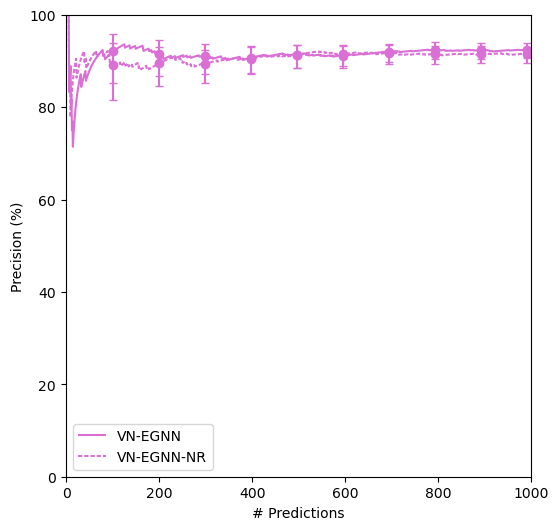

In [82]:
plot_precision_data_TUNED(
    final_df,
    figsize=(6, 6), dpi=100, xlim=(-1, 1000), ylim=(0, 100),
    methods = ["VN-EGNN", "VN-EGNN-NR"], error_bar_params = (100, 99, 1000),
    #out= "./figs/vnegnn_variants_precision_FULL.png"
)

## IF-SitePred variants

In [209]:
submets = ["IF-SitePred", "IF-SitePred-NR", "IF-SitePred-rescored-NR"]
final_df.query('origin in @submets & total == 1000')

origin rep_chain  ID                    centre  \
100200              IF-SitePred    1cm8_A   1  (-2.583, -7.877, -2.845)   
145148           IF-SitePred-NR    1d5g_A   2   (4.138, -9.814, -6.303)   
167864  IF-SitePred-rescored-NR    5bx1_A   1     (9.226, -1.701, 2.84)   

        n_aas   RoG    SASA    VOL  \
100200     17  7.84  295.78  430.0   
145148     13  6.51  924.55  483.0   
167864     15  6.25  377.40   23.0   

                                                   up_aas  \
100200  [41, 54, 56, 74, 78, 87, 89, 107, 109, 115, 15...   
145148  [1375, 1376, 1377, 1378, 1379, 1380, 1381, 140...   
167864  [21, 22, 49, 103, 104, 105, 106, 107, 108, 109...   

                                                      aas RANK    SCORE  \
100200  [107, 109, 115, 157, 158, 159, 169, 170, 171, ...    1  45.0000   
145148  [15, 16, 17, 18, 19, 20, 21, 41, 42, 43, 44, 4...    2  45.0000   
167864  [100, 101, 102, 103, 104, 105, 106, 107, 108, ...    1  13.1247   

        n_points  TRUE  cumsum_TP  cumsum_FP  total  precision  
100200      45.0     1        910         90   1000       91.0  
145148      45.0     1        910         90   1000       91.0  
167864      17.0     1        943         57   1000       94.3

In [210]:
round(94.3 - 91.0, 2)

3.3

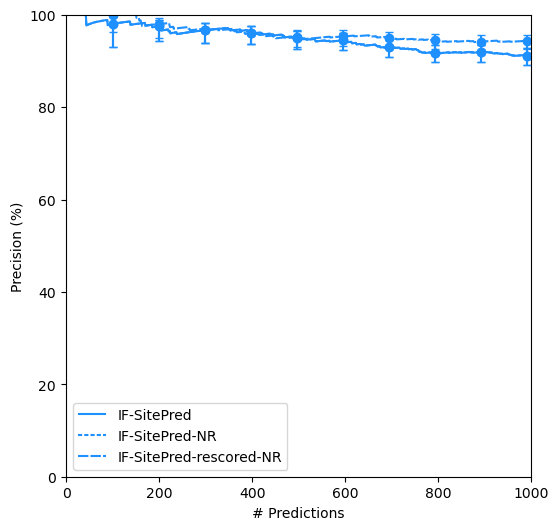

In [83]:
plot_precision_data_TUNED(
    final_df,
    figsize=(6, 6), dpi=100, xlim=(-1, 1000), ylim=(0, 100),
    methods = ["IF-SitePred", "IF-SitePred-NR", "IF-SitePred-rescored-NR"], error_bar_params = (100, 99, 1000),
    #out= "./figs/ifsp_variants_precision_FULL.png"
)

## DeepPocket-SEG variants

In [212]:
submets = ["DeepPocket-Segmented", "DeepPocket-Segmented-NR"]
final_df.query('origin in @submets & total == 1000')

origin rep_chain  ID                    centre  n_aas  \
58814     DeepPocket-Segmented    8e4y_A  44     (5.069, 4.458, 6.288)     22   
80532  DeepPocket-Segmented-NR    7qie_D  29  (5.225, 13.867, -13.131)     22   

        RoG     SASA     VOL  \
58814  8.35   974.49  1782.0   
80532  8.18  1459.08  1257.0   

                                                  up_aas  \
58814  [317, 318, 319, 320, 321, 323, 324, 325, 326, ...   
80532  [208, 210, 211, 258, 288, 290, 343, 344, 346, ...   

                                                     aas RANK     SCORE  \
58814  [256, 257, 258, 259, 260, 262, 263, 264, 265, ...    2  0.960106   
80532  [192, 194, 195, 242, 272, 274, 285, 286, 288, ...    2  0.954872   

       n_points  TRUE  cumsum_TP  cumsum_FP  total  precision  
58814       NaN     0        826        174   1000       82.6  
80532       NaN     0        816        184   1000       81.6

In [213]:
round(82.6 - 81.6, 2)

1.0

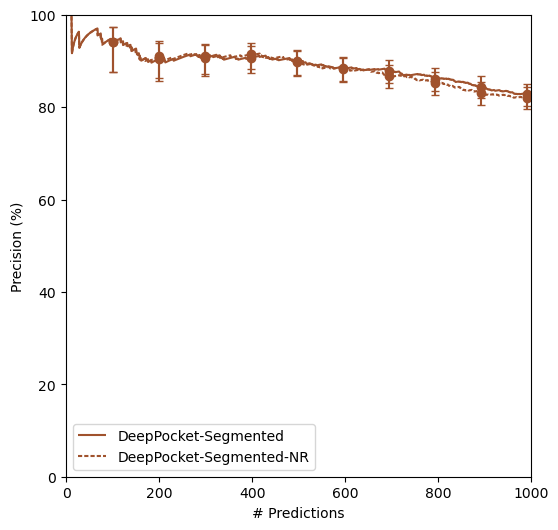

In [84]:
plot_precision_data_TUNED(
    final_df,
    figsize=(6, 6), dpi=100, xlim=(-1, 1000), ylim=(0, 100),
    methods = ["DeepPocket-Segmented", "DeepPocket-Segmented-NR"], error_bar_params = (100, 99, 1000),
    #out= "./figs/deeppocket_seg_variants_precision_FULL.png"
)

## PUResNet variants

In [91]:
submets = ["PUResNet", "PUResNet-AA", "PUResNet+PRANK", "PUResNet+PRANK+Cons"]
final_df.query('origin in @submets & total == 1000')

origin rep_chain  ID                    centre  n_aas  \
247559             PUResNet    5e4l_B   1  (19.201, -10.348, 1.507)      7   
250180       PUResNet+PRANK    7dtd_A   1    (3.596, -4.435, 9.886)      4   
252801  PUResNet+PRANK+Cons    6nr8_L   1     (2.104, 16.947, 3.15)     18   
255422          PUResNet-AA    2wce_A   1  (-0.391, -1.485, -0.965)     19   

         RoG    SASA    VOL  \
247559  6.35  347.07   87.0   
250180  7.64  235.07  855.0   
252801  7.80  499.65  986.0   
255422  8.15  835.23  584.0   

                                                   up_aas  \
247559                [193, 204, 205, 206, 212, 219, 225]   
250180                            [987, 1475, 1479, 1774]   
252801  [51, 52, 104, 105, 106, 107, 108, 111, 112, 42...   
255422  [11, 14, 33, 36, 37, 40, 41, 57, 61, 73, 74, 7...   

                                                      aas  ... n_points  TRUE  \
247559                [165, 176, 177, 178, 184, 191, 197]  ...      NaN     0   
250180                           [1030, 1518, 1522, 1817]  ...      NaN     1   
252801  [26, 27, 79, 80, 81, 82, 83, 86, 87, 400, 401,...  ...      NaN     1   
255422  [14, 17, 36, 39, 40, 43, 44, 60, 64, 76, 77, 7...  ...      NaN     1   

        cumsum_TP  cumsum_FP  total  precision  lower_ci  upper_ci  \
247559        816        184   1000       81.6  0.790790  0.838791   
250180        933         67   1000       93.3  0.915788  0.946898   
252801        908         92   1000       90.8  0.888491  0.924386   
255422        927         73   1000       92.7  0.909191  0.941541   

        lower_precision  upper_precision  
247559        79.079018        83.879131  
250180        91.578795        94.689808  
252801        88.849126        92.438610  
255422        90.919097        94.154097  

[4 rows x 22 columns]

In [215]:
final_df.query('origin in @submets & cumsum_FP == 100').sort_values("cumsum_TP", ascending = False).drop_duplicates("origin")

origin rep_chain  ID                    centre  n_aas   RoG  \
246095     PUResNet-AA    5c8w_C   1     (5.433, -6.723, 2.28)     17  7.74   
243471  PUResNet+PRANK    8jbn_B   1  (-6.039, -2.832, -7.737)     16  6.99   
240290        PUResNet    2pru_B   1    (-5.824, 7.211, -2.65)      4  3.98   

          SASA    VOL                                             up_aas  \
246095  580.85  462.0  [196, 215, 217, 222, 223, 225, 230, 231, 232, ...   
243471  519.74  240.0  [1733, 1735, 1736, 1811, 1870, 1871, 1904, 190...   
240290  307.45  148.0                                   [11, 12, 15, 71]   

                                                      aas RANK    SCORE  \
246095  [62, 81, 83, 88, 89, 91, 96, 97, 98, 99, 100, ...    1  17.0000   
243471  [57, 59, 60, 135, 194, 195, 228, 229, 230, 231...    1  13.5616   
240290                                   [10, 11, 14, 70]    1   1.0000   

        n_points  TRUE  cumsum_TP  cumsum_FP  total  precision  
246095       NaN     1       1097        100   1197      91.65  
243471       NaN     1       1094        100   1194      91.62  
240290       NaN     1        534        100    634      84.23

In [216]:
round(93.3 - 81.6, 2)

11.7

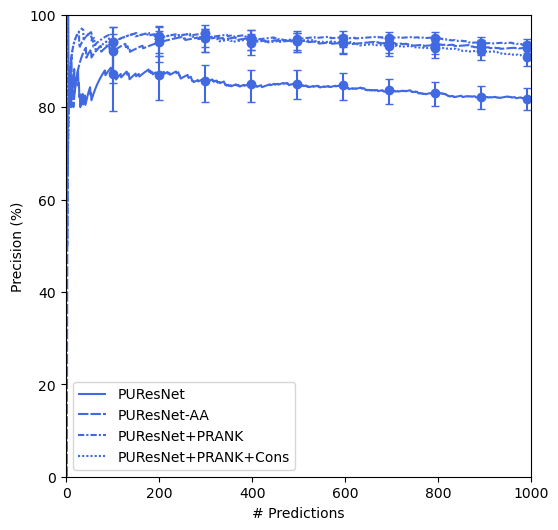

In [85]:
plot_precision_data_TUNED(
    final_df,
    figsize=(6, 6), dpi=100, xlim=(-1, 1000), ylim=(0, 100),
    methods = ["PUResNet", "PUResNet-AA", "PUResNet+PRANK", "PUResNet+PRANK+Cons"], error_bar_params = (100, 99, 1000),
    #out= "./figs/puresnet_variants_precision_FULL.png"
)

## fpocket variants

In [89]:
submets = ["fpocket", "fpocket+PRANK", "fpocket+PRANK+Cons"]
final_df.query('origin in @submets & total == 1000')

origin rep_chain  ID                   centre  n_aas  \
365921             fpocket    7l6w_A   1   (-1.026, -5.97, 8.535)     13   
423780       fpocket+PRANK    4ccz_A   2   (-2.011, 27.105, 3.08)     26   
481639  fpocket+PRANK+Cons    1y4j_B   5  (-5.718, -5.422, 6.474)     19   

         RoG    SASA     VOL  \
365921  7.53  716.41   283.0   
423780  9.51  562.57  1068.0   
481639  9.15  736.44   527.0   

                                                   up_aas  \
365921  [246, 247, 250, 252, 253, 270, 271, 272, 273, ...   
423780  [34, 35, 36, 37, 38, 65, 66, 67, 68, 78, 81, 8...   
481639  [48, 94, 115, 116, 117, 118, 235, 252, 258, 25...   

                                                      aas  ... n_points  TRUE  \
365921  [88, 89, 92, 94, 95, 112, 113, 114, 115, 116, ...  ...      NaN     0   
423780  [21, 22, 23, 24, 25, 52, 53, 54, 55, 65, 68, 6...  ...      NaN     0   
481639  [22, 68, 89, 90, 91, 92, 209, 226, 232, 233, 2...  ...      NaN     0   

        cumsum_TP  cumsum_FP  total  precision  lower_ci  upper_ci  \
365921        473        527   1000       47.3  0.442218  0.503989   
423780        817        183   1000       81.7  0.791837  0.839737   
481639        758        242   1000       75.8  0.730500  0.783526   

        lower_precision  upper_precision  
365921        44.221788        50.398877  
423780        79.183668        83.973716  
481639        73.049968        78.352571  

[3 rows x 22 columns]

In [278]:
round(81.7	 - 47.3, 2)

34.4

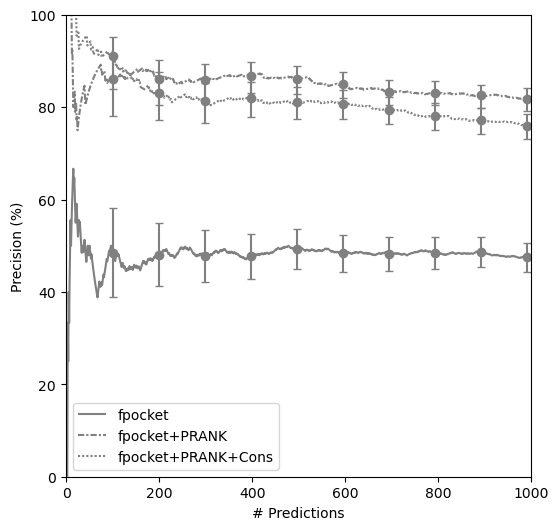

In [90]:
plot_precision_data_TUNED(
    final_df,
    figsize=(6, 6), dpi=100, xlim=(-1, 1000), ylim=(0, 100),
    methods = ["fpocket", "fpocket+PRANK", "fpocket+PRANK+Cons"], error_bar_params = (100, 99, 1000),
    #out= "./figs/fpocket_variants_precision_FULL.png"
)

## PocketFinder variants

In [93]:
submets = ["PocketFinder", "PocketFinder-AA", "PocketFinder-SS", "PocketFinder+PRANK", "PocketFinder+PRANK+Cons"]
final_df.query('origin in @submets & total == 1000')

origin rep_chain  ID                    centre  \
258043             PocketFinder    6k2z_A   1   (-7.232, -6.904, 7.618)   
266956       PocketFinder+PRANK    1a52_A   3  (14.979, -19.541, 4.818)   
275869  PocketFinder+PRANK+Cons    1hdo_A   1   (2.544, -3.619, -8.582)   
284782          PocketFinder-AA    6en6_D   2     (0.353, 4.728, 4.957)   
293695          PocketFinder-SS    2gp5_A   2     (2.129, 2.723, 8.031)   

        n_aas    RoG     SASA     VOL  \
258043     21   8.99  1399.31  1026.0   
266956     12   7.74   763.94   268.0   
275869     44  11.38  1923.14  1722.0   
284782     42  11.41   995.00  1506.0   
293695     43  10.91  1199.88  2440.0   

                                                   up_aas  \
258043  [26, 28, 56, 57, 58, 59, 60, 80, 81, 82, 83, 8...   
266956  [331, 333, 335, 336, 337, 407, 408, 409, 410, ...   
275869  [9, 10, 11, 12, 13, 14, 15, 16, 33, 34, 35, 36...   
284782  [151, 152, 168, 169, 173, 174, 192, 283, 284, ...   
293695  [71, 73, 84, 86, 132, 134, 135, 168, 169, 170,...   

                                                      aas  ... n_points  TRUE  \
258043  [29, 31, 59, 60, 61, 62, 63, 83, 84, 85, 86, 8...  ...      NaN     0   
266956  [35, 37, 39, 40, 41, 111, 112, 113, 114, 115, ...  ...      NaN     1   
275869  [9, 10, 11, 12, 13, 14, 15, 16, 33, 34, 35, 36...  ...      NaN     1   
284782  [122, 123, 139, 140, 144, 145, 163, 254, 255, ...  ...      NaN     1   
293695  [70, 72, 83, 85, 131, 133, 134, 167, 168, 169,...  ...      NaN     1   

        cumsum_TP  cumsum_FP  total  precision  lower_ci  upper_ci  \
258043        420        580   1000       42.0  0.389773  0.450840   
266956        515        485   1000       51.5  0.484026  0.545859   
275869        513        487   1000       51.3  0.482030  0.543870   
284782        653        347   1000       65.3  0.622962  0.681867   
293695        619        381   1000       61.9  0.588500  0.648590   

        lower_precision  upper_precision  
258043        38.977268        45.083960  
266956        48.402607        54.585913  
275869        48.203027        54.387024  
284782        62.296197        68.186704  
293695        58.849955        64.858969  

[5 rows x 22 columns]

In [218]:
round(65.3 - 42.0, 2)

23.3

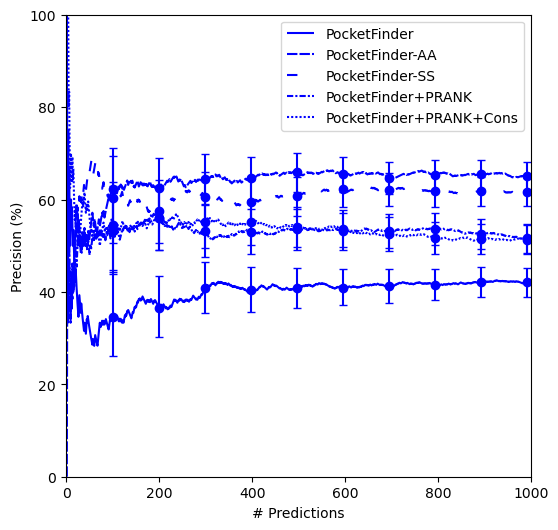

In [86]:
plot_precision_data_TUNED(
    final_df,
    figsize=(6, 6), dpi=100, xlim=(-1, 1000), ylim=(0, 100),
    methods = ["PocketFinder", "PocketFinder-AA", "PocketFinder-SS", "PocketFinder+PRANK", "PocketFinder+PRANK+Cons"], error_bar_params = (100, 99, 1000),
    #out= "./figs/pocketfinder_variants_precision_FULL.png"
)

## Ligsite variants

In [95]:
submets = ["Ligsite", "Ligsite-AA", "Ligsite-SS", "Ligsite+PRANK", "Ligsite+PRANK+Cons"]
final_df.query('origin in @submets & total == 1000')

origin rep_chain  ID                   centre  n_aas  \
190452             Ligsite    6k2z_A   1  (-6.973, -6.477, 7.217)     32   
197355       Ligsite+PRANK    7d73_K   1    (0.802, 6.937, 8.896)     63   
204258  Ligsite+PRANK+Cons    5bwl_A   1    (5.523, 2.374, 3.336)     71   
211161          Ligsite-AA    5vdk_A   1   (3.419, -8.135, 2.951)     56   
218064          Ligsite-SS    6op9_A   2   (0.456, -6.416, 5.259)     60   

          RoG     SASA     VOL  \
190452   9.76  1845.85  1293.0   
197355  12.16  1803.32  2203.0   
204258  12.98  2300.91  2959.0   
211161  10.33  1706.80  2087.0   
218064  11.25  2074.39  2899.0   

                                                   up_aas  \
190452  [24, 25, 26, 27, 28, 34, 36, 54, 56, 57, 58, 5...   
197355  [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 22, 23, 24...   
204258  [58, 59, 60, 61, 62, 63, 64, 66, 67, 68, 69, 7...   
211161  [216, 218, 219, 220, 221, 222, 223, 224, 225, ...   
218064  [714, 715, 716, 717, 718, 719, 720, 721, 722, ...   

                                                      aas  ... n_points  TRUE  \
190452  [27, 28, 29, 30, 31, 37, 39, 57, 59, 60, 61, 6...  ...      NaN     0   
197355  [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 22, 23, 24...  ...      NaN     1   
204258  [46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 5...  ...      NaN     1   
211161  [21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 3...  ...      NaN     1   
218064  [41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 5...  ...      NaN     1   

        cumsum_TP  cumsum_FP  total  precision  lower_ci  upper_ci  \
190452        523        477   1000       52.3  0.492014  0.553810   
197355        567        433   1000       56.7  0.536091  0.597396   
204258        557        443   1000       55.7  0.526052  0.587511   
211161        688        312   1000       68.8  0.658611  0.715950   
218064        612        388   1000       61.2  0.581424  0.641719   

        lower_precision  upper_precision  
190452        49.201420        55.380977  
197355        53.609109        59.739613  
204258        52.605234        58.751141  
211161        65.861082        71.595031  
218064        58.142392        64.171888  

[5 rows x 22 columns]

In [106]:
submets = ["Ligsite", "Ligsite-AA", "Ligsite-SS", "Ligsite+PRANK", "Ligsite+PRANK+Cons"]
final_df.query('origin in @submets & cumsum_FP == 100').sort_values(["cumsum_TP"], ascending = True).drop_duplicates("origin")

origin rep_chain  ID                    centre  n_aas  \
217234          Ligsite-SS    7o7l_B   2   (-20.994, 9.465, 2.432)     48   
189667             Ligsite    1tvx_D   1   (5.146, -3.884, -4.596)     20   
210420          Ligsite-AA    1cb6_A   1     (8.605, 6.251, 1.745)     81   
196619       Ligsite+PRANK    4fqf_A   1  (-8.145, -23.656, 4.691)     34   
203529  Ligsite+PRANK+Cons    8eg3_A   2  (4.797, -11.165, 14.322)     23   

          RoG     SASA      VOL  \
217234  13.73  3371.82  11251.0   
189667   7.27  1086.72    196.0   
210420  12.21  2652.39   4749.0   
196619   8.91  1640.38   1407.0   
203529   7.89   993.47    425.0   

                                                   up_aas  \
217234  [139, 142, 222, 223, 224, 225, 226, 227, 228, ...   
189667  [63, 64, 65, 66, 67, 68, 69, 89, 90, 91, 92, 9...   
210420  [110, 112, 124, 125, 126, 127, 146, 147, 149, ...   
196619  [87, 89, 92, 93, 94, 95, 96, 97, 98, 99, 101, ...   
203529  [167, 168, 169, 171, 173, 174, 175, 176, 290, ...   

                                                      aas  ... n_points  TRUE  \
217234  [139, 142, 222, 223, 224, 225, 226, 227, 228, ...  ...      NaN     0   
189667  [10, 11, 12, 13, 14, 15, 16, 36, 37, 38, 39, 4...  ...      NaN     0   
210420  [91, 93, 105, 106, 107, 108, 127, 128, 130, 13...  ...      NaN     0   
196619  [70, 72, 75, 76, 77, 78, 79, 80, 81, 82, 84, 1...  ...      NaN     0   
203529  [167, 168, 169, 171, 173, 174, 175, 176, 290, ...  ...      NaN     0   

        cumsum_TP  cumsum_FP  total  precision  lower_ci  upper_ci  \
217234         70        100    170      41.18  0.340529  0.486900   
189667        115        100    215      53.49  0.468185  0.600358   
210420        159        100    259      61.39  0.553354  0.671116   
196619        164        100    264      62.12  0.561354  0.677593   
203529        171        100    271      63.10  0.572089  0.686242   

        lower_precision  upper_precision  
217234        34.052887        48.690009  
189667        46.818494        60.035783  
210420        55.335417        67.111574  
196619        56.135420        67.759312  
203529        57.208862        68.624213  

[5 rows x 22 columns]

In [220]:
round(68.8 - 52.3, 2)

16.5

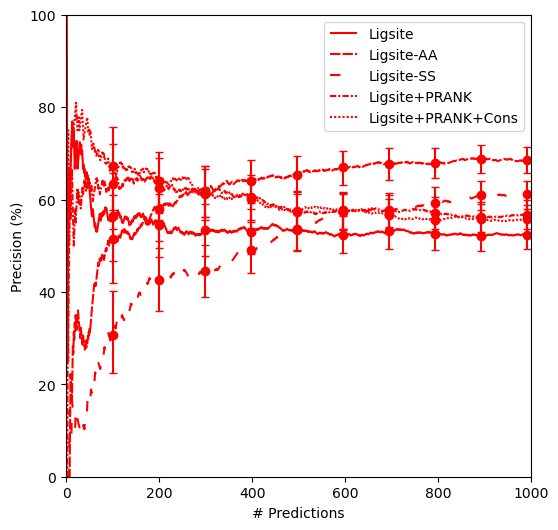

In [87]:
plot_precision_data_TUNED(
    final_df,
    figsize=(6, 6), dpi=100, xlim=(-1, 1000), ylim=(0, 100),
    methods = ["Ligsite", "Ligsite-AA", "Ligsite-SS", "Ligsite+PRANK", "Ligsite+PRANK+Cons"], error_bar_params = (100, 99, 1000),
    #out= "./figs/ligsite_variants_precision_FULL.png"
)

## Surfnet variants

In [98]:
submets = ["Surfnet", "Surfnet-AA", "Surfnet-SS", "Surfnet+PRANK", "Surfnet+PRANK+Cons"]
final_df.query('origin in @submets & total == 1000')

origin rep_chain  ID                    centre  n_aas  \
302608             Surfnet    6k2z_A   1   (-7.293, -7.503, 7.381)     22   
311651       Surfnet+PRANK    8blp_C   2     (7.13, 16.233, -1.56)     49   
320694  Surfnet+PRANK+Cons    7mii_E   2    (1.534, 6.932, -9.133)     34   
329737          Surfnet-AA    4px2_A   3  (-0.198, -5.802, -2.004)     40   
338780          Surfnet-SS    7mix_A   9   (23.57, -19.814, -5.69)     24   

          RoG     SASA     VOL  \
302608   8.96  1399.31  1026.0   
311651  11.06  1946.83  2916.0   
320694  10.27  1397.32  2221.0   
329737  10.05   660.87  1068.0   
338780   9.00  1383.40  1874.0   

                                                   up_aas  \
302608  [26, 28, 34, 56, 57, 58, 59, 60, 80, 81, 82, 8...   
311651  [92, 132, 135, 136, 180, 201, 202, 203, 204, 2...   
320694  [11, 12, 13, 14, 15, 16, 17, 18, 38, 39, 40, 4...   
329737  [32, 106, 107, 108, 109, 110, 111, 112, 150, 1...   
338780  [240, 241, 243, 244, 245, 248, 323, 327, 328, ...   

                                                      aas  ... n_points  TRUE  \
302608  [29, 31, 37, 59, 60, 61, 62, 63, 83, 84, 85, 8...  ...      NaN     0   
311651  [63, 103, 106, 107, 151, 172, 173, 174, 175, 1...  ...      NaN     0   
320694  [11, 12, 13, 14, 15, 16, 17, 18, 38, 39, 40, 4...  ...      NaN     1   
329737  [44, 118, 119, 120, 121, 122, 123, 124, 162, 1...  ...      NaN     1   
338780  [240, 241, 243, 244, 245, 248, 323, 327, 328, ...  ...      NaN     0   

        cumsum_TP  cumsum_FP  total  precision  lower_ci  upper_ci  \
302608        395        605   1000       39.5  0.365158  0.425645   
311651        476        524   1000       47.6  0.445197  0.506987   
320694        467        533   1000       46.7  0.436263  0.497990   
329737        686        314   1000       68.6  0.656569  0.714008   
338780        566        434   1000       56.6  0.535087  0.596408   

        lower_precision  upper_precision  
302608        36.515845        42.564517  
311651        44.519696        50.698673  
320694        43.626306        49.798950  
329737        65.656879        71.400765  
338780        53.508664        59.640822  

[5 rows x 22 columns]

In [222]:
round(68.6 - 39.5, 2)

29.1

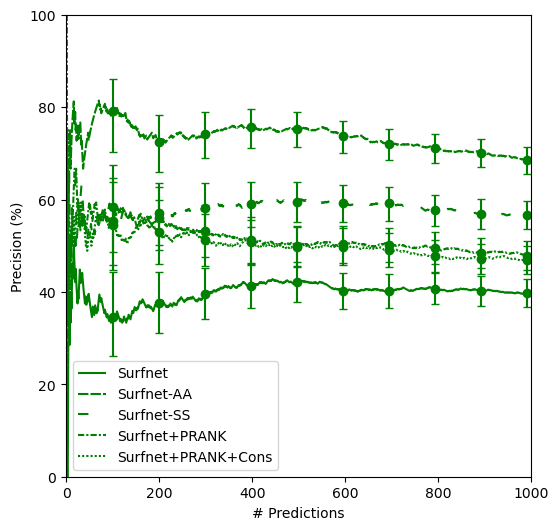

In [88]:
plot_precision_data_TUNED(
    final_df,
    figsize=(6, 6), dpi=100, xlim=(-1, 1000), ylim=(0, 100),
    methods = ["Surfnet", "Surfnet-AA", "Surfnet-SS", "Surfnet+PRANK", "Surfnet+PRANK+Cons"], error_bar_params = (100, 99, 1000),
    #out= "./figs/surfnet_variants_precision_FULL.png"
)

## Original methods

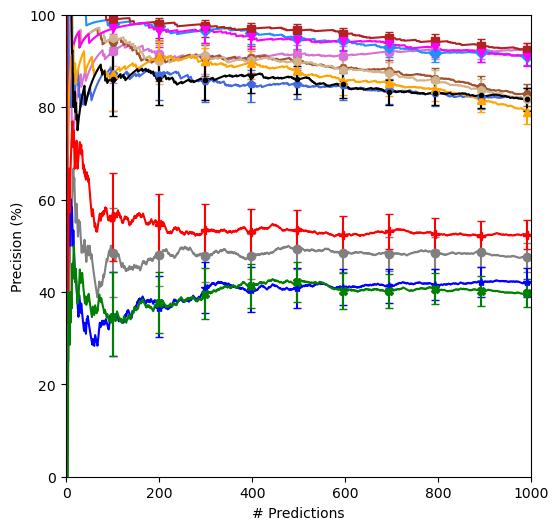

In [90]:
plot_precision_data_TUNED(
    final_df,
    figsize=(6, 6), dpi=100, xlim=(-1, 1000), ylim=(0, 100),
    methods = new_OG_mets, error_bar_params = (100, 99, 1000),
    #out= "./figs/FULL_PRECISION_curve_OG_METHODS.png"
)

## Best variants

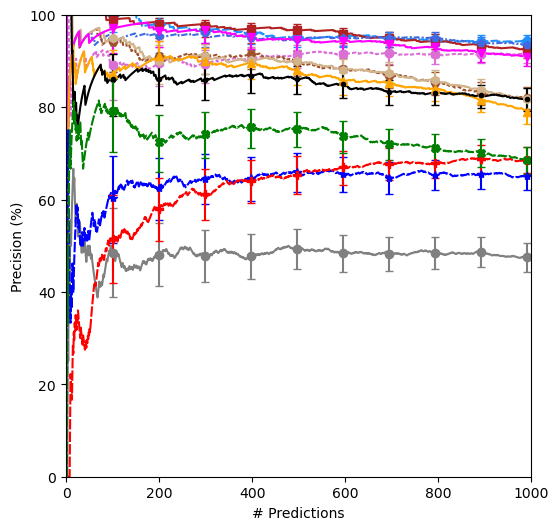

In [102]:
plot_precision_data_TUNED(
    final_df,
    figsize=(6, 6), dpi=100, xlim=(-1, 1000), ylim=(0, 100),
    methods = [
        "VN-EGNN-NR", "IF-SitePred-rescored-NR", "GrASP", "PUResNet+PRANK", 
        "DeepPocket-Segmented-NR", "DeepPocket-Rescored", "P2Rank+Cons",
        "P2Rank", "fpocket+PRANK", "fpocket",
        "PocketFinder-AA", "Ligsite-AA", "Surfnet-AA"
    ], error_bar_params = (100, 99, 1000),
    #out= "./figs/FULL_PRECISION_curve.png"
)

## Change in number of pockets

In [253]:
VN_EGNN_NR_pockets_per_site = VN_EGNN_NR.rep_chain.value_counts().tolist()
VN_EGNN_pockets_per_site = VN_EGNN.rep_chain.value_counts().tolist()

IFSP_NR_pockets_per_site = IFSP_NR.rep_chain.value_counts().tolist()
IFSP_pockets_per_site = IFSP.rep_chain.value_counts().tolist()

DeepPocket_segmented_NR_pockets_per_site = DeepPocket_segmented_NR.rep_chain.value_counts().tolist()
DeepPocket_segmented_pockets_per_site = DeepPocket_segmented.rep_chain.value_counts().tolist()

In [246]:
round(100*(len(VN_EGNN)-len(VN_EGNN_NR))/len(VN_EGNN),2)

66.75

In [247]:
round(100*(len(IFSP)-len(IFSP_NR))/len(IFSP),2)

49.46

In [248]:
round(100*(len(DeepPocket_segmented)-len(DeepPocket_segmented_NR))/len(DeepPocket_segmented),2)

31.05

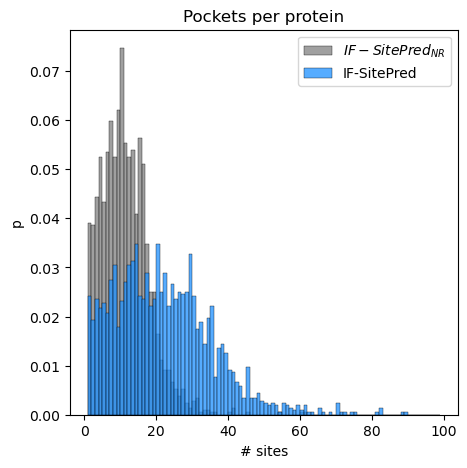

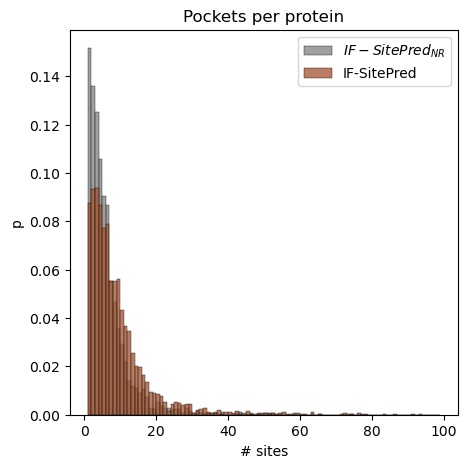

In [252]:
def plot_pocket_histograms(IFSP_NR_pockets_per_site, IFSP_pockets_per_site, color, bint = 2, DPI = 100, out = None):
    # Define the number of bins
    IFSP_NR_pockets_per_site = np.clip(IFSP_NR_pockets_per_site, None, 100)
    IFSP_pockets_per_site = np.clip(IFSP_pockets_per_site, None, 100)
    #bins = np.arange(0.5, max(max(IFSP_NR_pockets_per_site), max(IFSP_pockets_per_site)) + 1.5, bint)
    bins = np.arange(1, 100, bint)

    # Plot the histograms using seaborn
    plt.figure(figsize=(5, 5), dpi=DPI)
    sns.histplot(IFSP_NR_pockets_per_site, bins=bins, stat='proportion', label=r'$IF-SitePred_{NR}$', color='gray', edgecolor='black', kde=False)
    sns.histplot(IFSP_pockets_per_site, bins=bins, stat='proportion', label='IF-SitePred', color=color, edgecolor='black', kde=False)

    # Add some text for labels, title, and custom x-axis tick labels, etc.
    plt.xlabel('# sites')
    plt.ylabel('p')
    plt.title('Pockets per protein')
    plt.legend()

    if out != None:
        plt.savefig(out)

    plt.show()
    
plot_pocket_histograms(IFSP_NR_pockets_per_site, IFSP_pockets_per_site, "dodgerblue",  bint = 1,
                       DPI = 100#, out = "./figs/pockets_after_redund_IFSP.png"
                      )

plot_pocket_histograms(DeepPocket_segmented_NR_pockets_per_site, DeepPocket_segmented_pockets_per_site, "sienna", bint = 1,
                       DPI = 100#, out = "./figs/pockets_after_redund_DEEPPOCKET.png"
)

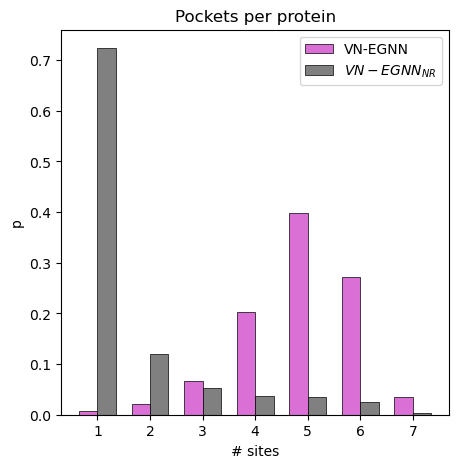

In [249]:
# Calculate proportions
values, counts1 = np.unique(VN_EGNN_pockets_per_site, return_counts=True)
_, counts2 = np.unique(VN_EGNN_NR_pockets_per_site, return_counts=True)
proportions1 = counts1 / counts1.sum()
proportions2 = counts2 / counts2.sum()

# Define the width of the bars
width = 0.35

# Define the x-axis labels (1-7)
x_labels = np.arange(1, 8)

# Plot the bars
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
bars1 = ax.bar(x_labels - width/2, proportions1, width, label = 'VN-EGNN', color='orchid', edgecolor = "k", linewidth = 0.5)
bars2 = ax.bar(x_labels + width/2, proportions2, width, label = r'$VN-EGNN_{NR}$', color='gray', edgecolor = "k", linewidth = 0.5)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('# sites')
ax.set_ylabel('p')
ax.set_title('Pockets per protein')
ax.set_xticks(x_labels)
ax.set_xticklabels(x_labels)
ax.legend()
#plt.savefig("./figs/pockets_after_redund_VNEGNN.png")

plt.show()